In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [ ]:
class Generator(nn.Module):
  def __init__(self,noise_dim, hidden_dim, image):
    super(Generator,self).__init__()
    self.fc1 = nn.Linear(noise_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
    self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 2)
    self.fc4 = nn.Linear(hidden_dim * 2, image)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    return x


In [ ]:
class Discriminator(nn.Module):
  def __init__(self, image):
    super(Discriminator,self).__init__()
    self.fc1 = nn.Linear(image,image)
    self.fc2 = nn.Linear(image,image//2)
    self.fc3 = nn.Linear(image//2,1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.sigmoid(x)

    return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Prepare the dataset

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load the training data
trainset = datasets.MNIST(root='./', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17699918.92it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483396.16it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4429592.27it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2947173.39it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
trainloader = DataLoader(trainset, 32, shuffle=True)
testloader = DataLoader(testset,32)

In [ ]:
images , labels = next(iter(trainloader))
images.reshape(32,-1).shape

torch.Size([32, 784])

In [ ]:
gen = Generator(40,200,784).to(device)
disc = Discriminator(784).to(device)

In [ ]:
optimizer_gen = Adam(gen.parameters(),lr=3e-5)
optimizer_disc = Adam(disc.parameters(),lr=3e-4)

In [ ]:
loss_fn_gen = nn.BCELoss()
loss_fn_disc = nn.BCELoss()

In [ ]:
noise = torch.randn(1,784)
print(noise.shape)
disc(noise)

torch.Size([1, 784])


tensor([[-0.0777]], grad_fn=<AddmmBackward0>)

In [ ]:
writer = SummaryWriter("train")

In [ ]:
from tqdm import tqdm

In [ ]:
epochs = 50
for epoch in range(epochs):
  for batch_idx , (real, _) in tqdm(enumerate(trainloader)):
    real = real.to(device)
    # Train the discriminator
    noise = torch.randn(32,40).to(device)
    fake = gen(noise)
    fake_score = disc(fake)
    real_score = disc(real.view(32,-1))
    loss_disc = (loss_fn_disc(fake_score, torch.zeros_like(fake_score)) + loss_fn_disc(real_score, torch.ones_like(real_score)))/2
    disc.zero_grad()
    loss_disc.backward(retain_graph=True)
    optimizer_disc.step()

    # Train the generator
    output = disc(fake)
    loss_gen = loss_fn_gen(output,torch.ones_like(output))
    gen.zero_grad()
    loss_gen.backward()
    optimizer_gen.step()
    if batch_idx % 50 == 0:
      print(f"Epoch {epoch}/{epochs}  gen loss : {loss_gen.item():.6f}   disc loss {loss_disc.item():.8f}")







16it [00:00, 73.69it/s]

Epoch 0/50  gen loss : 0.682585   disc loss 0.69058686


61it [00:00, 77.59it/s]

Epoch 0/50  gen loss : 1.409153   disc loss 0.21582350


121it [00:01, 99.81it/s]

Epoch 0/50  gen loss : 2.923072   disc loss 0.17201671


171it [00:01, 115.51it/s]

Epoch 0/50  gen loss : 1.359539   disc loss 0.35654241


220it [00:02, 117.39it/s]

Epoch 0/50  gen loss : 2.032059   disc loss 0.65725529


272it [00:02, 121.31it/s]

Epoch 0/50  gen loss : 3.501041   disc loss 0.17295629


324it [00:03, 121.70it/s]

Epoch 0/50  gen loss : 1.904270   disc loss 0.30930960


363it [00:03, 120.40it/s]

Epoch 0/50  gen loss : 2.180848   disc loss 0.52833331


415it [00:03, 122.65it/s]

Epoch 0/50  gen loss : 2.821615   disc loss 0.46666574


467it [00:04, 119.67it/s]

Epoch 0/50  gen loss : 4.213982   disc loss 0.04098428


519it [00:04, 120.54it/s]

Epoch 0/50  gen loss : 2.837676   disc loss 0.16555507


571it [00:05, 122.06it/s]

Epoch 0/50  gen loss : 3.262512   disc loss 0.03469294


623it [00:05, 121.28it/s]

Epoch 0/50  gen loss : 3.056892   disc loss 0.10374882


675it [00:06, 122.86it/s]

Epoch 0/50  gen loss : 5.125274   disc loss 0.06563893


714it [00:06, 120.01it/s]

Epoch 0/50  gen loss : 2.675531   disc loss 1.44349623


766it [00:06, 121.29it/s]

Epoch 0/50  gen loss : 3.411611   disc loss 0.11472631


818it [00:07, 123.18it/s]

Epoch 0/50  gen loss : 3.163581   disc loss 0.14725609


869it [00:07, 120.66it/s]

Epoch 0/50  gen loss : 2.777831   disc loss 0.38244894


920it [00:08, 121.31it/s]

Epoch 0/50  gen loss : 2.196913   disc loss 0.19624829


972it [00:08, 120.84it/s]

Epoch 0/50  gen loss : 1.988271   disc loss 0.14366207


1024it [00:08, 120.52it/s]

Epoch 0/50  gen loss : 4.181152   disc loss 0.01850388


1063it [00:09, 121.88it/s]

Epoch 0/50  gen loss : 5.904776   disc loss 0.38801596


1115it [00:09, 122.58it/s]

Epoch 0/50  gen loss : 4.594794   disc loss 0.61027336


1167it [00:10, 123.90it/s]

Epoch 0/50  gen loss : 4.510200   disc loss 0.10090894


1219it [00:10, 120.82it/s]

Epoch 0/50  gen loss : 2.554431   disc loss 0.24353598


1271it [00:10, 122.20it/s]

Epoch 0/50  gen loss : 3.069126   disc loss 0.12740782


1309it [00:11, 101.98it/s]

Epoch 0/50  gen loss : 2.488231   disc loss 0.18750349


1370it [00:12, 94.88it/s]

Epoch 0/50  gen loss : 2.957510   disc loss 0.27382004


1410it [00:12, 86.16it/s]

Epoch 0/50  gen loss : 2.006824   disc loss 0.24665563


1464it [00:13, 84.08it/s]

Epoch 0/50  gen loss : 3.005150   disc loss 0.21329145


1522it [00:13, 92.04it/s]

Epoch 0/50  gen loss : 2.531635   disc loss 0.37074840


1574it [00:14, 116.67it/s]

Epoch 0/50  gen loss : 3.628952   disc loss 0.09741163


1624it [00:14, 118.78it/s]

Epoch 0/50  gen loss : 4.430043   disc loss 0.24694562


1676it [00:15, 122.72it/s]

Epoch 0/50  gen loss : 3.667734   disc loss 0.45445138


1715it [00:15, 122.68it/s]

Epoch 0/50  gen loss : 4.967165   disc loss 0.25358731


1766it [00:15, 118.81it/s]

Epoch 0/50  gen loss : 3.641328   disc loss 0.35666755


1818it [00:16, 123.22it/s]

Epoch 0/50  gen loss : 2.748685   disc loss 1.37976587


1870it [00:16, 120.95it/s]

Epoch 0/50  gen loss : 2.972991   disc loss 0.15611398


1875it [00:16, 112.06it/s]
25it [00:00, 119.96it/s]

Epoch 1/50  gen loss : 2.503457   disc loss 0.33319926


76it [00:00, 122.10it/s]

Epoch 1/50  gen loss : 2.973999   disc loss 0.09261318


115it [00:00, 120.36it/s]

Epoch 1/50  gen loss : 2.133252   disc loss 0.10081832


167it [00:01, 120.98it/s]

Epoch 1/50  gen loss : 3.823671   disc loss 0.03238648


219it [00:01, 123.59it/s]

Epoch 1/50  gen loss : 3.789749   disc loss 0.55698502


271it [00:02, 122.47it/s]

Epoch 1/50  gen loss : 4.856169   disc loss 0.05196405


323it [00:02, 122.82it/s]

Epoch 1/50  gen loss : 3.290991   disc loss 0.37050959


375it [00:03, 120.48it/s]

Epoch 1/50  gen loss : 2.419777   disc loss 0.24852915


414it [00:03, 122.58it/s]

Epoch 1/50  gen loss : 3.947077   disc loss 0.22944827


466it [00:03, 124.11it/s]

Epoch 1/50  gen loss : 3.739768   disc loss 0.02947317


518it [00:04, 123.45it/s]

Epoch 1/50  gen loss : 4.634746   disc loss 0.30218995


570it [00:04, 123.07it/s]

Epoch 1/50  gen loss : 6.510833   disc loss 1.09285545


621it [00:05, 116.93it/s]

Epoch 1/50  gen loss : 1.925940   disc loss 0.22624466


672it [00:05, 119.58it/s]

Epoch 1/50  gen loss : 2.276667   disc loss 0.08940537


724it [00:05, 118.69it/s]

Epoch 1/50  gen loss : 2.550309   disc loss 0.07728358


763it [00:06, 121.15it/s]

Epoch 1/50  gen loss : 2.179107   disc loss 0.09277450


815it [00:06, 123.21it/s]

Epoch 1/50  gen loss : 3.370822   disc loss 0.04346756


864it [00:07, 98.78it/s] 

Epoch 1/50  gen loss : 3.008308   disc loss 0.21629903


915it [00:07, 96.09it/s]

Epoch 1/50  gen loss : 5.993580   disc loss 0.06388141


964it [00:08, 88.02it/s]

Epoch 1/50  gen loss : 7.731980   disc loss 0.09040581


1018it [00:08, 82.90it/s]

Epoch 1/50  gen loss : 9.800318   disc loss 1.18592918


1067it [00:09, 92.50it/s]

Epoch 1/50  gen loss : 5.440686   disc loss 0.42211604


1117it [00:09, 114.68it/s]

Epoch 1/50  gen loss : 6.367697   disc loss 0.01650622


1168it [00:10, 119.94it/s]

Epoch 1/50  gen loss : 6.676455   disc loss 0.63360536


1220it [00:10, 122.61it/s]

Epoch 1/50  gen loss : 5.546943   disc loss 1.04409659


1272it [00:11, 121.22it/s]

Epoch 1/50  gen loss : 3.123201   disc loss 0.10173630


1309it [00:11, 65.53it/s]

Epoch 1/50  gen loss : 3.229847   disc loss 0.18288814


1368it [00:12, 101.82it/s]

Epoch 1/50  gen loss : 3.234588   disc loss 0.27543885


1423it [00:13, 86.37it/s]

Epoch 1/50  gen loss : 2.707361   disc loss 0.53287292


1460it [00:13, 72.56it/s] 

Epoch 1/50  gen loss : 3.410515   disc loss 0.08897382


1517it [00:14, 93.95it/s]

Epoch 1/50  gen loss : 3.410314   disc loss 0.13133705


1564it [00:14, 109.79it/s]

Epoch 1/50  gen loss : 4.100650   disc loss 0.24341697


1624it [00:15, 114.66it/s]

Epoch 1/50  gen loss : 6.996264   disc loss 0.16925287


1673it [00:15, 116.51it/s]

Epoch 1/50  gen loss : 3.934368   disc loss 0.39007971


1723it [00:16, 120.67it/s]

Epoch 1/50  gen loss : 2.281385   disc loss 0.37355539


1774it [00:16, 120.68it/s]

Epoch 1/50  gen loss : 3.272130   disc loss 0.21062613


1813it [00:16, 116.77it/s]

Epoch 1/50  gen loss : 3.185470   disc loss 0.40338320


1875it [00:17, 107.56it/s]

Epoch 1/50  gen loss : 4.690311   disc loss 0.24864227



26it [00:00, 122.86it/s]

Epoch 2/50  gen loss : 3.237842   disc loss 0.56580788


64it [00:00, 111.94it/s]

Epoch 2/50  gen loss : 3.492699   disc loss 0.08017311


125it [00:01, 118.19it/s]

Epoch 2/50  gen loss : 1.807180   disc loss 0.18671122


176it [00:01, 121.67it/s]

Epoch 2/50  gen loss : 1.911387   disc loss 0.11269152


215it [00:01, 122.49it/s]

Epoch 2/50  gen loss : 2.304856   disc loss 0.08721562


263it [00:02, 97.14it/s] 

Epoch 2/50  gen loss : 3.322335   disc loss 0.19933176


313it [00:02, 95.89it/s]

Epoch 2/50  gen loss : 3.136746   disc loss 0.48780841


364it [00:03, 89.44it/s]

Epoch 2/50  gen loss : 2.848528   disc loss 0.15852395


410it [00:03, 81.79it/s]

Epoch 2/50  gen loss : 4.010318   disc loss 0.15668017


460it [00:04, 70.24it/s]

Epoch 2/50  gen loss : 3.111345   disc loss 0.09809756


521it [00:05, 108.89it/s]

Epoch 2/50  gen loss : 6.144763   disc loss 0.15387067


572it [00:05, 118.87it/s]

Epoch 2/50  gen loss : 2.360919   disc loss 0.70027101


624it [00:06, 119.25it/s]

Epoch 2/50  gen loss : 4.368226   disc loss 0.48728153


663it [00:06, 121.26it/s]

Epoch 2/50  gen loss : 2.252438   disc loss 0.26598448


715it [00:06, 123.06it/s]

Epoch 2/50  gen loss : 2.608687   disc loss 0.23237275


767it [00:07, 120.75it/s]

Epoch 2/50  gen loss : 2.816980   disc loss 0.11264317


819it [00:07, 121.55it/s]

Epoch 2/50  gen loss : 3.882419   disc loss 0.06739442


871it [00:08, 118.83it/s]

Epoch 2/50  gen loss : 3.385331   disc loss 0.04051419


922it [00:08, 120.83it/s]

Epoch 2/50  gen loss : 3.432267   disc loss 0.12748733


974it [00:08, 122.48it/s]

Epoch 2/50  gen loss : 4.144997   disc loss 0.27013081


1025it [00:09, 120.25it/s]

Epoch 2/50  gen loss : 5.235228   disc loss 0.11480242


1076it [00:09, 120.56it/s]

Epoch 2/50  gen loss : 3.596705   disc loss 0.23084611


1115it [00:10, 118.34it/s]

Epoch 2/50  gen loss : 2.875252   disc loss 0.13342504


1166it [00:10, 119.55it/s]

Epoch 2/50  gen loss : 4.529307   disc loss 0.10148089


1218it [00:10, 122.83it/s]

Epoch 2/50  gen loss : 6.945312   disc loss 0.39224064


1267it [00:11, 114.18it/s]

Epoch 2/50  gen loss : 2.875119   disc loss 0.15596850


1315it [00:11, 114.12it/s]

Epoch 2/50  gen loss : 3.307300   disc loss 0.07377999


1363it [00:12, 112.67it/s]

Epoch 2/50  gen loss : 2.894389   disc loss 0.07142401


1426it [00:12, 120.52it/s]

Epoch 2/50  gen loss : 3.194808   disc loss 0.28237426


1465it [00:13, 121.95it/s]

Epoch 2/50  gen loss : 3.165040   disc loss 0.10494398


1514it [00:13, 110.60it/s]

Epoch 2/50  gen loss : 3.660334   disc loss 0.73795760


1566it [00:13, 121.49it/s]

Epoch 2/50  gen loss : 4.578279   disc loss 0.05670562


1616it [00:14, 110.02it/s]

Epoch 2/50  gen loss : 4.998065   disc loss 0.18888521


1663it [00:14, 97.56it/s] 

Epoch 2/50  gen loss : 3.984677   disc loss 0.75843763


1713it [00:15, 92.88it/s]

Epoch 2/50  gen loss : 2.624196   disc loss 0.06908119


1765it [00:16, 91.50it/s]

Epoch 2/50  gen loss : 2.655715   disc loss 0.17078410


1811it [00:16, 80.34it/s]

Epoch 2/50  gen loss : 3.443400   disc loss 0.25300625


1868it [00:17, 89.11it/s]

Epoch 2/50  gen loss : 3.041973   disc loss 0.38678163


1875it [00:17, 108.12it/s]
25it [00:00, 119.24it/s]

Epoch 3/50  gen loss : 2.857539   disc loss 0.24180527


64it [00:00, 114.28it/s]

Epoch 3/50  gen loss : 4.408092   disc loss 0.11257743


115it [00:00, 117.61it/s]

Epoch 3/50  gen loss : 7.935969   disc loss 1.43784320


166it [00:01, 121.04it/s]

Epoch 3/50  gen loss : 4.425865   disc loss 0.47166181


218it [00:01, 121.66it/s]

Epoch 3/50  gen loss : 3.559477   disc loss 0.13858736


269it [00:02, 118.79it/s]

Epoch 3/50  gen loss : 2.815829   disc loss 0.11624613


320it [00:02, 116.95it/s]

Epoch 3/50  gen loss : 3.695330   disc loss 0.22147232


368it [00:03, 115.32it/s]

Epoch 3/50  gen loss : 2.896788   disc loss 0.37881124


418it [00:03, 120.83it/s]

Epoch 3/50  gen loss : 3.139383   disc loss 0.32428047


470it [00:03, 120.83it/s]

Epoch 3/50  gen loss : 2.830124   disc loss 0.13434464


520it [00:04, 118.49it/s]

Epoch 3/50  gen loss : 3.572273   disc loss 0.05365402


571it [00:04, 122.08it/s]

Epoch 3/50  gen loss : 4.915195   disc loss 0.11920933


623it [00:05, 118.91it/s]

Epoch 3/50  gen loss : 4.293331   disc loss 0.45375913


675it [00:05, 123.18it/s]

Epoch 3/50  gen loss : 6.441772   disc loss 0.16241492


714it [00:05, 122.56it/s]

Epoch 3/50  gen loss : 6.516778   disc loss 0.91240227


764it [00:06, 116.61it/s]

Epoch 3/50  gen loss : 3.455704   disc loss 0.25233972


816it [00:06, 122.09it/s]

Epoch 3/50  gen loss : 3.051489   disc loss 0.05715243


867it [00:07, 113.35it/s]

Epoch 3/50  gen loss : 4.332515   disc loss 0.09247299


915it [00:07, 114.24it/s]

Epoch 3/50  gen loss : 3.300470   disc loss 0.37877363


964it [00:08, 115.20it/s]

Epoch 3/50  gen loss : 2.824026   disc loss 0.08300547


1024it [00:08, 114.84it/s]

Epoch 3/50  gen loss : 3.092358   disc loss 0.21338889


1070it [00:09, 105.77it/s]

Epoch 3/50  gen loss : 3.879011   disc loss 0.03349425


1115it [00:09, 107.97it/s]

Epoch 3/50  gen loss : 3.542110   disc loss 0.47160870


1161it [00:09, 98.05it/s] 

Epoch 3/50  gen loss : 4.137774   disc loss 0.36029780


1211it [00:10, 90.32it/s]

Epoch 3/50  gen loss : 3.627001   disc loss 0.16803695


1263it [00:11, 57.09it/s]

Epoch 3/50  gen loss : 3.030531   disc loss 0.10150321


1311it [00:12, 71.43it/s]

Epoch 3/50  gen loss : 2.997485   disc loss 0.06413631


1362it [00:12, 96.42it/s]

Epoch 3/50  gen loss : 5.039793   disc loss 0.20441121


1418it [00:13, 104.25it/s]

Epoch 3/50  gen loss : 5.500514   disc loss 0.40130037


1468it [00:13, 116.03it/s]

Epoch 3/50  gen loss : 3.698639   disc loss 0.19769877


1516it [00:14, 118.58it/s]

Epoch 3/50  gen loss : 3.232045   disc loss 0.17309277


1565it [00:14, 116.32it/s]

Epoch 3/50  gen loss : 3.776819   disc loss 0.14040016


1615it [00:15, 119.61it/s]

Epoch 3/50  gen loss : 3.465040   disc loss 0.06904800


1664it [00:15, 118.92it/s]

Epoch 3/50  gen loss : 5.380651   disc loss 0.09368814


1716it [00:15, 119.67it/s]

Epoch 3/50  gen loss : 3.118786   disc loss 0.12648314


1765it [00:16, 117.29it/s]

Epoch 3/50  gen loss : 3.268169   disc loss 0.07303107


1814it [00:16, 111.40it/s]

Epoch 3/50  gen loss : 2.675896   disc loss 0.09557553


1875it [00:17, 108.48it/s]

Epoch 3/50  gen loss : 4.015072   disc loss 0.11015926



24it [00:00, 116.54it/s]

Epoch 4/50  gen loss : 4.021161   disc loss 0.22680613


75it [00:00, 119.40it/s]

Epoch 4/50  gen loss : 3.324864   disc loss 0.25560385


123it [00:01, 118.69it/s]

Epoch 4/50  gen loss : 3.389205   disc loss 0.27284786


172it [00:01, 116.24it/s]

Epoch 4/50  gen loss : 4.781544   disc loss 0.07928793


220it [00:01, 116.76it/s]

Epoch 4/50  gen loss : 3.976966   disc loss 0.06709163


269it [00:02, 115.64it/s]

Epoch 4/50  gen loss : 5.097103   disc loss 0.13698560


317it [00:02, 117.33it/s]

Epoch 4/50  gen loss : 6.688911   disc loss 0.09470494


367it [00:03, 119.30it/s]

Epoch 4/50  gen loss : 5.255398   disc loss 0.03067481


416it [00:03, 115.69it/s]

Epoch 4/50  gen loss : 4.055915   disc loss 0.13012885


466it [00:03, 118.67it/s]

Epoch 4/50  gen loss : 3.335449   disc loss 0.16774720


515it [00:04, 117.66it/s]

Epoch 4/50  gen loss : 6.848998   disc loss 0.08568463


564it [00:04, 117.69it/s]

Epoch 4/50  gen loss : 7.184302   disc loss 0.28826335


612it [00:05, 107.49it/s]

Epoch 4/50  gen loss : 4.200672   disc loss 0.18658663


664it [00:05, 92.56it/s]

Epoch 4/50  gen loss : 6.836987   disc loss 0.52301168


715it [00:06, 92.72it/s]

Epoch 4/50  gen loss : 3.218451   disc loss 0.22971594


761it [00:06, 80.93it/s]

Epoch 4/50  gen loss : 3.736805   disc loss 0.14818403


814it [00:07, 77.86it/s]

Epoch 4/50  gen loss : 3.116026   disc loss 0.04570788


873it [00:08, 111.16it/s]

Epoch 4/50  gen loss : 3.981911   disc loss 0.27081898


923it [00:08, 117.92it/s]

Epoch 4/50  gen loss : 4.530972   disc loss 0.02568877


973it [00:09, 119.66it/s]

Epoch 4/50  gen loss : 3.105055   disc loss 0.29657304


1012it [00:09, 121.46it/s]

Epoch 4/50  gen loss : 3.212763   disc loss 0.12239902


1075it [00:09, 119.17it/s]

Epoch 4/50  gen loss : 3.746238   disc loss 0.07926296


1125it [00:10, 120.71it/s]

Epoch 4/50  gen loss : 3.468357   disc loss 0.09320630


1175it [00:10, 118.37it/s]

Epoch 4/50  gen loss : 4.711401   disc loss 0.07908291


1225it [00:11, 120.98it/s]

Epoch 4/50  gen loss : 3.983038   disc loss 0.09104003


1264it [00:11, 118.16it/s]

Epoch 4/50  gen loss : 4.437858   disc loss 0.18096045


1315it [00:11, 119.86it/s]

Epoch 4/50  gen loss : 5.541196   disc loss 0.07370348


1366it [00:12, 120.43it/s]

Epoch 4/50  gen loss : 4.512107   disc loss 0.13044494


1416it [00:12, 116.58it/s]

Epoch 4/50  gen loss : 5.570046   disc loss 0.12068524


1464it [00:13, 117.89it/s]

Epoch 4/50  gen loss : 4.037250   disc loss 0.08657768


1525it [00:13, 114.43it/s]

Epoch 4/50  gen loss : 3.747980   disc loss 0.31599879


1574it [00:14, 118.60it/s]

Epoch 4/50  gen loss : 3.845636   disc loss 0.29725376


1623it [00:14, 113.79it/s]

Epoch 4/50  gen loss : 3.599479   disc loss 0.20318761


1671it [00:14, 116.72it/s]

Epoch 4/50  gen loss : 3.210011   disc loss 0.08753619


1720it [00:15, 118.18it/s]

Epoch 4/50  gen loss : 8.309589   disc loss 0.13114150


1768it [00:15, 117.05it/s]

Epoch 4/50  gen loss : 4.348640   disc loss 0.12978518


1817it [00:16, 119.27it/s]

Epoch 4/50  gen loss : 4.527018   disc loss 0.09487815


1867it [00:16, 113.32it/s]

Epoch 4/50  gen loss : 4.577142   disc loss 0.31557837


1875it [00:16, 112.29it/s]
24it [00:00, 115.62it/s]

Epoch 5/50  gen loss : 4.087442   disc loss 0.38953748


62it [00:00, 120.37it/s]

Epoch 5/50  gen loss : 5.833763   disc loss 0.05659427


123it [00:01, 110.89it/s]

Epoch 5/50  gen loss : 6.537848   disc loss 0.16059276


166it [00:01, 93.30it/s]

Epoch 5/50  gen loss : 3.009537   disc loss 0.18835238


216it [00:02, 91.59it/s]

Epoch 5/50  gen loss : 3.757653   disc loss 0.04323649


263it [00:02, 82.28it/s]

Epoch 5/50  gen loss : 9.363792   disc loss 0.51521915


316it [00:03, 82.57it/s]

Epoch 5/50  gen loss : 3.778680   disc loss 0.14747304


365it [00:03, 93.15it/s]

Epoch 5/50  gen loss : 2.832097   disc loss 0.13805307


425it [00:04, 112.65it/s]

Epoch 5/50  gen loss : 2.639074   disc loss 0.38543546


473it [00:04, 116.65it/s]

Epoch 5/50  gen loss : 5.064936   disc loss 0.09971521


521it [00:05, 115.35it/s]

Epoch 5/50  gen loss : 3.590405   disc loss 0.12690613


571it [00:05, 118.25it/s]

Epoch 5/50  gen loss : 3.830306   disc loss 0.13890488


619it [00:06, 112.79it/s]

Epoch 5/50  gen loss : 3.986572   disc loss 0.08963920


667it [00:06, 109.87it/s]

Epoch 5/50  gen loss : 5.397175   disc loss 0.01728019


716it [00:06, 113.56it/s]

Epoch 5/50  gen loss : 5.140883   disc loss 0.12897365


764it [00:07, 113.92it/s]

Epoch 5/50  gen loss : 6.687500   disc loss 0.22600327


824it [00:07, 115.33it/s]

Epoch 5/50  gen loss : 5.555120   disc loss 0.29023921


873it [00:08, 116.22it/s]

Epoch 5/50  gen loss : 3.741660   disc loss 0.18286049


923it [00:08, 119.00it/s]

Epoch 5/50  gen loss : 3.788596   disc loss 0.03736463


971it [00:09, 112.69it/s]

Epoch 5/50  gen loss : 4.788728   disc loss 0.10065475


1020it [00:09, 117.08it/s]

Epoch 5/50  gen loss : 5.244569   disc loss 0.30248553


1069it [00:10, 116.90it/s]

Epoch 5/50  gen loss : 4.646492   disc loss 0.09675621


1118it [00:10, 115.82it/s]

Epoch 5/50  gen loss : 5.105015   disc loss 0.10030591


1167it [00:10, 117.61it/s]

Epoch 5/50  gen loss : 4.357346   disc loss 0.18269122


1216it [00:11, 112.42it/s]

Epoch 5/50  gen loss : 4.325269   disc loss 0.09042835


1265it [00:11, 115.28it/s]

Epoch 5/50  gen loss : 2.905950   disc loss 0.06962910


1313it [00:12, 112.36it/s]

Epoch 5/50  gen loss : 4.896361   disc loss 0.05143378


1364it [00:12, 115.98it/s]

Epoch 5/50  gen loss : 5.608455   disc loss 0.02184141


1424it [00:13, 116.64it/s]

Epoch 5/50  gen loss : 6.352446   disc loss 0.14329618


1473it [00:13, 118.46it/s]

Epoch 5/50  gen loss : 6.285853   disc loss 0.28790832


1509it [00:13, 99.79it/s] 

Epoch 5/50  gen loss : 4.659910   disc loss 0.62994003


1570it [00:14, 92.68it/s]

Epoch 5/50  gen loss : 4.653087   disc loss 0.02034598


1610it [00:15, 88.01it/s]

Epoch 5/50  gen loss : 3.665741   disc loss 0.06241963


1664it [00:15, 80.28it/s]

Epoch 5/50  gen loss : 4.506555   disc loss 0.03406348


1708it [00:16, 75.65it/s]

Epoch 5/50  gen loss : 6.765978   disc loss 0.05471122


1767it [00:16, 109.74it/s]

Epoch 5/50  gen loss : 4.024738   disc loss 0.17769612


1816it [00:17, 112.82it/s]

Epoch 5/50  gen loss : 3.296587   disc loss 0.17490683


1875it [00:17, 105.67it/s]

Epoch 5/50  gen loss : 4.999518   disc loss 0.04669815



24it [00:00, 114.94it/s]

Epoch 6/50  gen loss : 5.979346   disc loss 0.02362921


73it [00:00, 117.32it/s]

Epoch 6/50  gen loss : 4.794125   disc loss 0.03394340


123it [00:01, 117.74it/s]

Epoch 6/50  gen loss : 4.996960   disc loss 0.12912115


171it [00:01, 116.67it/s]

Epoch 6/50  gen loss : 5.282076   disc loss 0.13005236


220it [00:01, 116.88it/s]

Epoch 6/50  gen loss : 5.241750   disc loss 0.16727242


269it [00:02, 118.18it/s]

Epoch 6/50  gen loss : 3.747372   disc loss 0.02722178


318it [00:02, 116.94it/s]

Epoch 6/50  gen loss : 5.398949   disc loss 0.01678592


370it [00:03, 121.35it/s]

Epoch 6/50  gen loss : 5.217639   disc loss 0.01892145


421it [00:03, 119.90it/s]

Epoch 6/50  gen loss : 5.610262   disc loss 0.01723727


471it [00:04, 120.55it/s]

Epoch 6/50  gen loss : 5.588199   disc loss 0.12642327


521it [00:04, 117.58it/s]

Epoch 6/50  gen loss : 5.300537   disc loss 0.09987657


571it [00:04, 118.60it/s]

Epoch 6/50  gen loss : 5.057831   disc loss 0.14904281


622it [00:05, 120.78it/s]

Epoch 6/50  gen loss : 4.168120   disc loss 0.04287590


672it [00:05, 115.08it/s]

Epoch 6/50  gen loss : 5.557062   disc loss 0.23427911


721it [00:06, 116.14it/s]

Epoch 6/50  gen loss : 7.103704   disc loss 0.06044587


770it [00:06, 117.77it/s]

Epoch 6/50  gen loss : 9.718004   disc loss 0.27419049


819it [00:06, 113.15it/s]

Epoch 6/50  gen loss : 3.248078   disc loss 0.05965892


867it [00:07, 115.15it/s]

Epoch 6/50  gen loss : 5.027643   disc loss 0.05351127


918it [00:07, 118.67it/s]

Epoch 6/50  gen loss : 5.858818   disc loss 0.06769921


969it [00:08, 120.07it/s]

Epoch 6/50  gen loss : 7.534333   disc loss 0.18098855


1018it [00:08, 103.39it/s]

Epoch 6/50  gen loss : 4.626355   disc loss 0.16599286


1069it [00:09, 92.37it/s]

Epoch 6/50  gen loss : 4.590828   disc loss 0.23805758


1120it [00:09, 94.23it/s]

Epoch 6/50  gen loss : 5.713292   disc loss 0.39665335


1166it [00:10, 81.07it/s]

Epoch 6/50  gen loss : 4.725916   disc loss 0.01456867


1211it [00:10, 82.50it/s]

Epoch 6/50  gen loss : 5.354048   disc loss 0.03150348


1273it [00:11, 101.01it/s]

Epoch 6/50  gen loss : 5.609258   disc loss 0.27523363


1322it [00:12, 111.83it/s]

Epoch 6/50  gen loss : 3.461030   disc loss 0.07064793


1371it [00:12, 116.36it/s]

Epoch 6/50  gen loss : 3.489772   disc loss 0.06921264


1421it [00:12, 119.00it/s]

Epoch 6/50  gen loss : 4.125683   disc loss 0.14619130


1470it [00:13, 118.07it/s]

Epoch 6/50  gen loss : 6.989906   disc loss 0.05511099


1521it [00:13, 121.44it/s]

Epoch 6/50  gen loss : 6.130869   disc loss 0.14712159


1572it [00:14, 118.92it/s]

Epoch 6/50  gen loss : 4.509478   disc loss 0.05734497


1621it [00:14, 119.98it/s]

Epoch 6/50  gen loss : 3.876184   disc loss 0.04074188


1673it [00:15, 120.41it/s]

Epoch 6/50  gen loss : 4.175222   disc loss 0.13493189


1722it [00:15, 115.15it/s]

Epoch 6/50  gen loss : 6.649945   disc loss 0.07635572


1770it [00:15, 112.58it/s]

Epoch 6/50  gen loss : 9.151655   disc loss 0.03430497


1816it [00:16, 109.48it/s]

Epoch 6/50  gen loss : 5.598499   disc loss 0.09833467


1865it [00:16, 116.15it/s]

Epoch 6/50  gen loss : 3.663683   disc loss 0.18499522


1875it [00:16, 111.34it/s]
24it [00:00, 117.90it/s]

Epoch 7/50  gen loss : 4.068382   disc loss 0.07333354


72it [00:00, 117.07it/s]

Epoch 7/50  gen loss : 4.630054   disc loss 0.02213787


121it [00:01, 119.05it/s]

Epoch 7/50  gen loss : 3.822484   disc loss 0.16580717


170it [00:01, 114.58it/s]

Epoch 7/50  gen loss : 5.667662   disc loss 0.06241827


221it [00:01, 119.45it/s]

Epoch 7/50  gen loss : 4.904144   disc loss 0.04430572


269it [00:02, 110.04it/s]

Epoch 7/50  gen loss : 5.120196   disc loss 0.08340968


318it [00:02, 115.46it/s]

Epoch 7/50  gen loss : 6.274960   disc loss 0.16250809


369it [00:03, 119.99it/s]

Epoch 7/50  gen loss : 4.804163   disc loss 0.04372837


418it [00:03, 117.34it/s]

Epoch 7/50  gen loss : 6.823459   disc loss 0.03475256


468it [00:04, 119.62it/s]

Epoch 7/50  gen loss : 4.095460   disc loss 0.05106086


519it [00:04, 116.01it/s]

Epoch 7/50  gen loss : 3.836698   disc loss 0.09821378


564it [00:04, 94.64it/s]

Epoch 7/50  gen loss : 6.986983   disc loss 0.24969754


614it [00:05, 92.95it/s]

Epoch 7/50  gen loss : 6.381177   disc loss 0.01667890


664it [00:06, 89.97it/s]

Epoch 7/50  gen loss : 4.349797   disc loss 0.19180591


710it [00:06, 76.12it/s]

Epoch 7/50  gen loss : 5.218922   disc loss 0.13272189


775it [00:07, 107.94it/s]

Epoch 7/50  gen loss : 8.867775   disc loss 0.03565418


823it [00:07, 112.09it/s]

Epoch 7/50  gen loss : 4.527120   disc loss 0.05681535


873it [00:08, 118.40it/s]

Epoch 7/50  gen loss : 5.950592   disc loss 0.09701215


922it [00:08, 115.99it/s]

Epoch 7/50  gen loss : 6.433088   disc loss 0.26591802


973it [00:08, 120.13it/s]

Epoch 7/50  gen loss : 4.227973   disc loss 0.11087543


1023it [00:09, 118.72it/s]

Epoch 7/50  gen loss : 4.214415   disc loss 0.13772252


1072it [00:09, 116.47it/s]

Epoch 7/50  gen loss : 4.188416   disc loss 0.07790629


1123it [00:10, 120.39it/s]

Epoch 7/50  gen loss : 7.250656   disc loss 0.20916879


1172it [00:10, 116.44it/s]

Epoch 7/50  gen loss : 4.442344   disc loss 0.09266537


1223it [00:11, 120.74it/s]

Epoch 7/50  gen loss : 4.490802   disc loss 0.23621404


1275it [00:11, 119.96it/s]

Epoch 7/50  gen loss : 4.750616   disc loss 0.05652585


1313it [00:11, 118.83it/s]

Epoch 7/50  gen loss : 4.977407   disc loss 0.12424921


1364it [00:12, 119.79it/s]

Epoch 7/50  gen loss : 6.836784   disc loss 0.01960087


1413it [00:12, 116.16it/s]

Epoch 7/50  gen loss : 6.356014   disc loss 0.17595458


1476it [00:13, 121.10it/s]

Epoch 7/50  gen loss : 5.342913   disc loss 0.02093419


1514it [00:13, 118.54it/s]

Epoch 7/50  gen loss : 4.499041   disc loss 0.05370238


1564it [00:13, 118.81it/s]

Epoch 7/50  gen loss : 3.717533   disc loss 0.03940954


1615it [00:14, 120.19it/s]

Epoch 7/50  gen loss : 5.134739   disc loss 0.02097747


1665it [00:14, 119.01it/s]

Epoch 7/50  gen loss : 8.910084   disc loss 0.01687286


1714it [00:15, 119.09it/s]

Epoch 7/50  gen loss : 5.885818   disc loss 0.18816128


1764it [00:15, 119.33it/s]

Epoch 7/50  gen loss : 4.154141   disc loss 0.10019791


1814it [00:16, 119.03it/s]

Epoch 7/50  gen loss : 6.763705   disc loss 0.01896021


1865it [00:16, 120.94it/s]

Epoch 7/50  gen loss : 6.566886   disc loss 0.01893306


1875it [00:16, 113.04it/s]
24it [00:00, 115.08it/s]

Epoch 8/50  gen loss : 5.568778   disc loss 0.25033334


69it [00:00, 94.68it/s]

Epoch 8/50  gen loss : 5.982502   disc loss 0.00593206


119it [00:01, 91.36it/s]

Epoch 8/50  gen loss : 5.158031   disc loss 0.07141560


159it [00:01, 88.12it/s]

Epoch 8/50  gen loss : 4.915405   disc loss 0.24256213


214it [00:02, 82.97it/s]

Epoch 8/50  gen loss : 4.586242   disc loss 0.03928592


259it [00:02, 81.93it/s]

Epoch 8/50  gen loss : 6.277632   disc loss 0.15165135


312it [00:03, 100.08it/s]

Epoch 8/50  gen loss : 7.978580   disc loss 0.12241604


374it [00:03, 116.07it/s]

Epoch 8/50  gen loss : 10.741159   disc loss 0.21684587


424it [00:04, 116.95it/s]

Epoch 8/50  gen loss : 4.609762   disc loss 0.18771628


473it [00:04, 118.73it/s]

Epoch 8/50  gen loss : 6.460021   disc loss 0.05244804


522it [00:05, 117.92it/s]

Epoch 8/50  gen loss : 6.461936   disc loss 0.10160945


572it [00:05, 115.92it/s]

Epoch 8/50  gen loss : 4.265550   disc loss 0.10308270


620it [00:06, 114.07it/s]

Epoch 8/50  gen loss : 5.782805   disc loss 0.02037218


668it [00:06, 116.88it/s]

Epoch 8/50  gen loss : 4.408650   disc loss 0.08400168


717it [00:06, 119.10it/s]

Epoch 8/50  gen loss : 4.567141   disc loss 0.12469922


767it [00:07, 117.16it/s]

Epoch 8/50  gen loss : 6.726060   disc loss 0.07187332


817it [00:07, 119.67it/s]

Epoch 8/50  gen loss : 5.385728   disc loss 0.02576556


866it [00:08, 119.46it/s]

Epoch 8/50  gen loss : 4.655330   disc loss 0.03943289


915it [00:08, 116.97it/s]

Epoch 8/50  gen loss : 5.627851   disc loss 0.04811542


964it [00:09, 117.33it/s]

Epoch 8/50  gen loss : 5.909805   disc loss 0.13593490


1014it [00:09, 116.80it/s]

Epoch 8/50  gen loss : 5.742219   disc loss 0.10283757


1075it [00:09, 118.25it/s]

Epoch 8/50  gen loss : 5.763186   disc loss 0.01879987


1124it [00:10, 118.40it/s]

Epoch 8/50  gen loss : 8.040768   disc loss 0.00897541


1173it [00:10, 116.66it/s]

Epoch 8/50  gen loss : 4.356621   disc loss 0.03695901


1222it [00:11, 119.15it/s]

Epoch 8/50  gen loss : 7.568425   disc loss 0.01651346


1272it [00:11, 117.98it/s]

Epoch 8/50  gen loss : 6.050617   disc loss 0.23981193


1321it [00:12, 118.27it/s]

Epoch 8/50  gen loss : 6.458103   disc loss 0.01670888


1373it [00:12, 117.51it/s]

Epoch 8/50  gen loss : 8.100047   disc loss 0.07006869


1424it [00:12, 120.62it/s]

Epoch 8/50  gen loss : 4.826513   disc loss 0.13151807


1462it [00:13, 105.15it/s]

Epoch 8/50  gen loss : 5.869005   disc loss 0.14711948


1514it [00:13, 92.22it/s]

Epoch 8/50  gen loss : 4.912435   disc loss 0.08173022


1565it [00:14, 92.43it/s]

Epoch 8/50  gen loss : 5.751292   disc loss 0.11176784


1611it [00:15, 80.65it/s]

Epoch 8/50  gen loss : 4.713553   disc loss 0.06746773


1665it [00:15, 82.67it/s]

Epoch 8/50  gen loss : 9.464952   disc loss 0.00386781


1715it [00:16, 95.86it/s]

Epoch 8/50  gen loss : 3.925861   disc loss 0.07840928


1763it [00:16, 110.82it/s]

Epoch 8/50  gen loss : 6.705730   disc loss 0.16996856


1825it [00:17, 117.73it/s]

Epoch 8/50  gen loss : 4.376394   disc loss 0.02370370


1875it [00:17, 106.62it/s]

Epoch 8/50  gen loss : 5.290989   disc loss 0.15325162



23it [00:00, 112.40it/s]

Epoch 9/50  gen loss : 6.422593   disc loss 0.01789281


72it [00:00, 117.51it/s]

Epoch 9/50  gen loss : 6.507765   disc loss 0.34353462


121it [00:01, 117.85it/s]

Epoch 9/50  gen loss : 4.961808   disc loss 0.10031767


171it [00:01, 117.68it/s]

Epoch 9/50  gen loss : 5.372673   disc loss 0.02587512


222it [00:01, 120.38it/s]

Epoch 9/50  gen loss : 7.207268   disc loss 0.22340225


272it [00:02, 117.69it/s]

Epoch 9/50  gen loss : 4.354167   disc loss 0.08528519


322it [00:02, 119.30it/s]

Epoch 9/50  gen loss : 5.815642   disc loss 0.21683528


371it [00:03, 115.30it/s]

Epoch 9/50  gen loss : 7.171490   disc loss 0.12290893


420it [00:03, 116.71it/s]

Epoch 9/50  gen loss : 4.508602   disc loss 0.07929684


469it [00:03, 118.68it/s]

Epoch 9/50  gen loss : 5.544545   disc loss 0.14250487


517it [00:04, 116.69it/s]

Epoch 9/50  gen loss : 6.223506   disc loss 0.06401917


568it [00:04, 118.43it/s]

Epoch 9/50  gen loss : 6.696609   disc loss 0.25808001


616it [00:05, 115.15it/s]

Epoch 9/50  gen loss : 7.434226   disc loss 0.07764439


664it [00:05, 116.74it/s]

Epoch 9/50  gen loss : 5.972261   disc loss 0.11952394


713it [00:06, 117.79it/s]

Epoch 9/50  gen loss : 8.458912   disc loss 0.07103740


763it [00:06, 117.84it/s]

Epoch 9/50  gen loss : 8.238269   disc loss 0.09607601


814it [00:06, 120.43it/s]

Epoch 9/50  gen loss : 8.469783   disc loss 0.00492512


866it [00:07, 114.22it/s]

Epoch 9/50  gen loss : 8.575874   disc loss 0.02213203


917it [00:07, 117.97it/s]

Epoch 9/50  gen loss : 4.557117   disc loss 0.08413577


966it [00:08, 117.15it/s]

Epoch 9/50  gen loss : 5.328809   disc loss 0.05427188


1011it [00:08, 92.99it/s]

Epoch 9/50  gen loss : 4.882833   disc loss 0.12228714


1061it [00:09, 93.49it/s]

Epoch 9/50  gen loss : 5.107359   disc loss 0.20068350


1110it [00:09, 88.43it/s]

Epoch 9/50  gen loss : 4.420238   disc loss 0.12328848


1163it [00:10, 79.13it/s]

Epoch 9/50  gen loss : 6.400281   disc loss 0.00868212


1216it [00:11, 102.40it/s]

Epoch 9/50  gen loss : 8.377438   disc loss 0.08061741


1266it [00:11, 112.89it/s]

Epoch 9/50  gen loss : 4.802845   disc loss 0.03637280


1317it [00:11, 120.78it/s]

Epoch 9/50  gen loss : 4.298011   disc loss 0.13826340


1366it [00:12, 118.74it/s]

Epoch 9/50  gen loss : 6.290545   disc loss 0.05313357


1416it [00:12, 118.25it/s]

Epoch 9/50  gen loss : 5.931417   disc loss 0.15843882


1467it [00:13, 119.96it/s]

Epoch 9/50  gen loss : 10.122845   disc loss 0.01688625


1516it [00:13, 117.23it/s]

Epoch 9/50  gen loss : 4.465064   disc loss 0.02829981


1567it [00:14, 121.01it/s]

Epoch 9/50  gen loss : 4.854803   disc loss 0.18163829


1618it [00:14, 108.42it/s]

Epoch 9/50  gen loss : 4.124820   disc loss 0.02966482


1666it [00:14, 115.24it/s]

Epoch 9/50  gen loss : 4.927342   disc loss 0.12876135


1716it [00:15, 119.12it/s]

Epoch 9/50  gen loss : 4.277836   disc loss 0.12502354


1765it [00:15, 118.06it/s]

Epoch 9/50  gen loss : 9.306250   disc loss 0.03249718


1814it [00:16, 118.63it/s]

Epoch 9/50  gen loss : 6.954560   disc loss 0.06570470


1863it [00:16, 113.14it/s]

Epoch 9/50  gen loss : 6.173047   disc loss 0.30891472


1875it [00:16, 112.12it/s]
24it [00:00, 115.96it/s]

Epoch 10/50  gen loss : 7.515537   disc loss 0.17760962


72it [00:00, 117.73it/s]

Epoch 10/50  gen loss : 9.141398   disc loss 0.04402798


121it [00:01, 115.16it/s]

Epoch 10/50  gen loss : 5.218767   disc loss 0.02324331


170it [00:01, 113.00it/s]

Epoch 10/50  gen loss : 4.872331   disc loss 0.15857711


218it [00:01, 110.90it/s]

Epoch 10/50  gen loss : 5.117907   disc loss 0.01001355


268it [00:02, 117.65it/s]

Epoch 10/50  gen loss : 4.521251   disc loss 0.09871989


316it [00:02, 116.80it/s]

Epoch 10/50  gen loss : 6.168087   disc loss 0.03765878


365it [00:03, 116.77it/s]

Epoch 10/50  gen loss : 6.080506   disc loss 0.08826517


415it [00:03, 119.02it/s]

Epoch 10/50  gen loss : 5.912536   disc loss 0.00643848


464it [00:04, 116.84it/s]

Epoch 10/50  gen loss : 6.610027   disc loss 0.09881965


517it [00:04, 93.23it/s]

Epoch 10/50  gen loss : 4.768738   disc loss 0.01937195


567it [00:05, 91.62it/s]

Epoch 10/50  gen loss : 7.363063   disc loss 0.18903707


614it [00:05, 81.16it/s]

Epoch 10/50  gen loss : 4.786644   disc loss 0.04616681


666it [00:06, 81.09it/s]

Epoch 10/50  gen loss : 7.155132   disc loss 0.00746631


719it [00:06, 101.88it/s]

Epoch 10/50  gen loss : 9.091303   disc loss 0.00772806


767it [00:07, 112.20it/s]

Epoch 10/50  gen loss : 4.781572   disc loss 0.02731952


815it [00:07, 115.26it/s]

Epoch 10/50  gen loss : 6.118203   disc loss 0.18619919


864it [00:08, 114.21it/s]

Epoch 10/50  gen loss : 6.197541   disc loss 0.01580827


914it [00:08, 118.39it/s]

Epoch 10/50  gen loss : 5.580744   disc loss 0.09357717


964it [00:09, 119.16it/s]

Epoch 10/50  gen loss : 7.722211   disc loss 0.07512414


1024it [00:09, 115.69it/s]

Epoch 10/50  gen loss : 7.046653   disc loss 0.00909586


1072it [00:10, 117.43it/s]

Epoch 10/50  gen loss : 4.548197   disc loss 0.02859714


1120it [00:10, 115.47it/s]

Epoch 10/50  gen loss : 7.214199   disc loss 0.11024696


1168it [00:10, 115.36it/s]

Epoch 10/50  gen loss : 7.026495   disc loss 0.01540310


1217it [00:11, 114.60it/s]

Epoch 10/50  gen loss : 7.840911   disc loss 0.01283280


1266it [00:11, 111.49it/s]

Epoch 10/50  gen loss : 6.735052   disc loss 0.12225665


1314it [00:12, 110.35it/s]

Epoch 10/50  gen loss : 3.479941   disc loss 0.11176266


1374it [00:12, 114.58it/s]

Epoch 10/50  gen loss : 4.123700   disc loss 0.02667692


1425it [00:13, 118.50it/s]

Epoch 10/50  gen loss : 3.802977   disc loss 0.10441959


1474it [00:13, 117.95it/s]

Epoch 10/50  gen loss : 4.985537   disc loss 0.07567006


1522it [00:13, 116.70it/s]

Epoch 10/50  gen loss : 5.958638   disc loss 0.02913882


1572it [00:14, 117.41it/s]

Epoch 10/50  gen loss : 4.883777   disc loss 0.10703596


1620it [00:14, 117.95it/s]

Epoch 10/50  gen loss : 7.483268   disc loss 0.00992061


1669it [00:15, 117.99it/s]

Epoch 10/50  gen loss : 7.849500   disc loss 0.02042362


1718it [00:15, 117.14it/s]

Epoch 10/50  gen loss : 5.610226   disc loss 0.18210392


1767it [00:16, 118.16it/s]

Epoch 10/50  gen loss : 13.361876   disc loss 0.00008916


1816it [00:16, 117.14it/s]

Epoch 10/50  gen loss : 6.455427   disc loss 0.64294988


1864it [00:16, 96.63it/s] 

Epoch 10/50  gen loss : 9.343687   disc loss 0.03021286


1875it [00:17, 109.62it/s]
18it [00:00, 83.73it/s]

Epoch 11/50  gen loss : 7.640646   disc loss 0.17188959


66it [00:00, 93.87it/s]

Epoch 11/50  gen loss : 5.136770   disc loss 0.19423886


113it [00:01, 80.63it/s]

Epoch 11/50  gen loss : 4.822969   disc loss 0.03901429


163it [00:01, 80.18it/s]

Epoch 11/50  gen loss : 5.880383   disc loss 0.04602862


217it [00:02, 102.08it/s]

Epoch 11/50  gen loss : 4.817113   disc loss 0.12793437


265it [00:02, 112.43it/s]

Epoch 11/50  gen loss : 6.648611   disc loss 0.03079236


313it [00:03, 113.08it/s]

Epoch 11/50  gen loss : 5.205679   disc loss 0.01128767


373it [00:03, 116.66it/s]

Epoch 11/50  gen loss : 6.054562   disc loss 0.01747194


422it [00:04, 117.45it/s]

Epoch 11/50  gen loss : 7.584770   disc loss 0.00888222


470it [00:04, 115.91it/s]

Epoch 11/50  gen loss : 5.655822   disc loss 0.03419560


520it [00:05, 120.24it/s]

Epoch 11/50  gen loss : 7.405272   disc loss 0.16744140


569it [00:05, 111.10it/s]

Epoch 11/50  gen loss : 6.182904   disc loss 0.01828465


618it [00:06, 113.22it/s]

Epoch 11/50  gen loss : 6.761032   disc loss 0.01778892


666it [00:06, 111.50it/s]

Epoch 11/50  gen loss : 7.885239   disc loss 0.08280279


714it [00:06, 113.49it/s]

Epoch 11/50  gen loss : 14.071749   disc loss 0.00169487


774it [00:07, 115.69it/s]

Epoch 11/50  gen loss : 12.047468   disc loss 0.13964407


822it [00:07, 115.23it/s]

Epoch 11/50  gen loss : 8.610004   disc loss 0.00182847


871it [00:08, 117.67it/s]

Epoch 11/50  gen loss : 5.388637   disc loss 0.17288378


921it [00:08, 117.34it/s]

Epoch 11/50  gen loss : 5.701900   disc loss 0.02256604


971it [00:09, 119.24it/s]

Epoch 11/50  gen loss : 6.719572   disc loss 0.16406000


1020it [00:09, 115.58it/s]

Epoch 11/50  gen loss : 5.996900   disc loss 0.00514211


1068it [00:09, 116.01it/s]

Epoch 11/50  gen loss : 4.564348   disc loss 0.11798614


1118it [00:10, 118.51it/s]

Epoch 11/50  gen loss : 5.338091   disc loss 0.00885286


1166it [00:10, 115.96it/s]

Epoch 11/50  gen loss : 7.587724   disc loss 0.00192149


1217it [00:11, 118.97it/s]

Epoch 11/50  gen loss : 7.087169   disc loss 0.00668338


1265it [00:11, 107.47it/s]

Epoch 11/50  gen loss : 7.912991   disc loss 0.09870449


1313it [00:12, 112.66it/s]

Epoch 11/50  gen loss : 7.807582   disc loss 0.16242492


1369it [00:12, 90.05it/s]

Epoch 11/50  gen loss : 5.871560   disc loss 0.18294126


1419it [00:13, 94.56it/s]

Epoch 11/50  gen loss : 6.841873   disc loss 0.09062037


1467it [00:13, 84.42it/s]

Epoch 11/50  gen loss : 5.248693   disc loss 0.02122620


1510it [00:14, 79.17it/s]

Epoch 11/50  gen loss : 6.656463   disc loss 0.00556977


1575it [00:15, 97.96it/s]

Epoch 11/50  gen loss : 6.272774   disc loss 0.20446420


1623it [00:15, 112.54it/s]

Epoch 11/50  gen loss : 6.129994   disc loss 0.01444147


1671it [00:15, 115.10it/s]

Epoch 11/50  gen loss : 4.609183   disc loss 0.10293540


1721it [00:16, 118.72it/s]

Epoch 11/50  gen loss : 6.267931   disc loss 0.02672477


1770it [00:16, 116.58it/s]

Epoch 11/50  gen loss : 7.384890   disc loss 0.00839830


1821it [00:17, 120.82it/s]

Epoch 11/50  gen loss : 8.383692   disc loss 0.02426879


1871it [00:17, 118.40it/s]

Epoch 11/50  gen loss : 6.760015   disc loss 0.08758656


1875it [00:17, 106.04it/s]
23it [00:00, 111.30it/s]

Epoch 12/50  gen loss : 4.704833   disc loss 0.07483374


72it [00:00, 117.56it/s]

Epoch 12/50  gen loss : 5.717810   disc loss 0.01849565


121it [00:01, 114.81it/s]

Epoch 12/50  gen loss : 7.287433   disc loss 0.21388577


169it [00:01, 115.67it/s]

Epoch 12/50  gen loss : 5.209150   disc loss 0.01839534


217it [00:01, 115.86it/s]

Epoch 12/50  gen loss : 4.195031   disc loss 0.17376103


265it [00:02, 114.87it/s]

Epoch 12/50  gen loss : 6.419621   disc loss 0.09787732


314it [00:02, 116.45it/s]

Epoch 12/50  gen loss : 10.920177   disc loss 0.50256050


362it [00:03, 112.77it/s]

Epoch 12/50  gen loss : 7.388149   disc loss 0.25404912


422it [00:03, 115.25it/s]

Epoch 12/50  gen loss : 5.893346   disc loss 0.01188387


470it [00:04, 116.34it/s]

Epoch 12/50  gen loss : 4.474980   disc loss 0.18454908


518it [00:04, 114.73it/s]

Epoch 12/50  gen loss : 6.470394   disc loss 0.02987068


566it [00:04, 117.01it/s]

Epoch 12/50  gen loss : 8.130236   disc loss 0.12324844


616it [00:05, 116.22it/s]

Epoch 12/50  gen loss : 11.828104   disc loss 0.06838559


666it [00:05, 117.52it/s]

Epoch 12/50  gen loss : 7.710677   disc loss 0.00937681


716it [00:06, 116.32it/s]

Epoch 12/50  gen loss : 8.996086   disc loss 0.03866262


767it [00:06, 119.37it/s]

Epoch 12/50  gen loss : 9.781789   disc loss 0.04247732


816it [00:07, 118.64it/s]

Epoch 12/50  gen loss : 5.699200   disc loss 0.02663951


861it [00:07, 90.18it/s]

Epoch 12/50  gen loss : 4.825852   disc loss 0.01593879


918it [00:08, 91.33it/s]

Epoch 12/50  gen loss : 6.521655   disc loss 0.02831016


968it [00:08, 88.11it/s]

Epoch 12/50  gen loss : 11.388195   disc loss 0.00158685


1013it [00:09, 78.71it/s]

Epoch 12/50  gen loss : 7.659967   disc loss 0.04657913


1066it [00:10, 77.54it/s]

Epoch 12/50  gen loss : 4.326185   disc loss 0.08800703


1114it [00:10, 103.66it/s]

Epoch 12/50  gen loss : 4.947252   disc loss 0.04543860


1175it [00:10, 116.13it/s]

Epoch 12/50  gen loss : 4.373785   disc loss 0.12384924


1224it [00:11, 115.35it/s]

Epoch 12/50  gen loss : 7.367893   disc loss 0.09216554


1273it [00:11, 117.67it/s]

Epoch 12/50  gen loss : 6.871425   disc loss 0.00691458


1321it [00:12, 117.43it/s]

Epoch 12/50  gen loss : 4.444679   disc loss 0.09001815


1369it [00:12, 116.97it/s]

Epoch 12/50  gen loss : 5.677829   disc loss 0.02065839


1418it [00:13, 119.39it/s]

Epoch 12/50  gen loss : 9.679798   disc loss 0.03260243


1466it [00:13, 113.36it/s]

Epoch 12/50  gen loss : 9.439068   disc loss 0.14740019


1515it [00:13, 115.65it/s]

Epoch 12/50  gen loss : 5.707664   disc loss 0.27026749


1564it [00:14, 116.85it/s]

Epoch 12/50  gen loss : 6.230564   disc loss 0.02066916


1612it [00:14, 111.88it/s]

Epoch 12/50  gen loss : 4.633523   disc loss 0.03064235


1672it [00:15, 116.68it/s]

Epoch 12/50  gen loss : 3.519379   disc loss 0.21181750


1722it [00:15, 116.91it/s]

Epoch 12/50  gen loss : 4.698003   disc loss 0.01549855


1771it [00:16, 117.65it/s]

Epoch 12/50  gen loss : 6.770234   disc loss 0.00327268


1819it [00:16, 113.12it/s]

Epoch 12/50  gen loss : 6.868677   disc loss 0.17340650


1868it [00:16, 116.76it/s]

Epoch 12/50  gen loss : 6.604147   disc loss 0.01009854


1875it [00:17, 110.12it/s]
24it [00:00, 116.76it/s]

Epoch 13/50  gen loss : 5.074323   disc loss 0.10717513


74it [00:00, 117.71it/s]

Epoch 13/50  gen loss : 5.338784   disc loss 0.08659089


125it [00:01, 120.36it/s]

Epoch 13/50  gen loss : 5.081441   disc loss 0.11557491


174it [00:01, 118.47it/s]

Epoch 13/50  gen loss : 7.418431   disc loss 0.04542261


222it [00:01, 116.09it/s]

Epoch 13/50  gen loss : 4.319430   disc loss 0.03115860


271it [00:02, 117.16it/s]

Epoch 13/50  gen loss : 5.822701   disc loss 0.01873164


319it [00:02, 115.58it/s]

Epoch 13/50  gen loss : 4.984605   disc loss 0.01270998


366it [00:03, 98.16it/s] 

Epoch 13/50  gen loss : 7.526522   disc loss 0.07737010


416it [00:03, 89.71it/s]

Epoch 13/50  gen loss : 9.886166   disc loss 0.01572751


466it [00:04, 90.65it/s]

Epoch 13/50  gen loss : 6.741488   disc loss 0.10793637


512it [00:04, 78.50it/s]

Epoch 13/50  gen loss : 5.427566   disc loss 0.11019844


565it [00:05, 83.22it/s]

Epoch 13/50  gen loss : 6.071901   disc loss 0.03380070


614it [00:06, 95.36it/s]

Epoch 13/50  gen loss : 4.404917   disc loss 0.02265942


674it [00:06, 111.81it/s]

Epoch 13/50  gen loss : 5.296773   disc loss 0.01822589


723it [00:07, 115.92it/s]

Epoch 13/50  gen loss : 5.966542   disc loss 0.00475181


771it [00:07, 116.60it/s]

Epoch 13/50  gen loss : 6.820577   disc loss 0.09820950


819it [00:07, 113.00it/s]

Epoch 13/50  gen loss : 10.234325   disc loss 0.00447676


868it [00:08, 114.53it/s]

Epoch 13/50  gen loss : 8.460957   disc loss 0.00476679


916it [00:08, 111.36it/s]

Epoch 13/50  gen loss : 5.753984   disc loss 0.05703743


964it [00:09, 114.94it/s]

Epoch 13/50  gen loss : 5.407305   disc loss 0.02457456


1024it [00:09, 117.22it/s]

Epoch 13/50  gen loss : 6.404985   disc loss 0.00820546


1072it [00:10, 110.85it/s]

Epoch 13/50  gen loss : 8.233212   disc loss 0.18246274


1121it [00:10, 117.33it/s]

Epoch 13/50  gen loss : 5.589295   disc loss 0.11590710


1170it [00:10, 115.87it/s]

Epoch 13/50  gen loss : 4.696742   disc loss 0.06217742


1219it [00:11, 117.60it/s]

Epoch 13/50  gen loss : 4.648497   disc loss 0.02243789


1268it [00:11, 117.61it/s]

Epoch 13/50  gen loss : 5.481440   disc loss 0.28209960


1318it [00:12, 119.04it/s]

Epoch 13/50  gen loss : 5.037532   disc loss 0.09177855


1367it [00:12, 118.51it/s]

Epoch 13/50  gen loss : 9.865937   disc loss 0.07741015


1416it [00:13, 117.55it/s]

Epoch 13/50  gen loss : 5.356854   disc loss 0.02640257


1465it [00:13, 117.51it/s]

Epoch 13/50  gen loss : 4.719986   disc loss 0.03676919


1513it [00:13, 113.35it/s]

Epoch 13/50  gen loss : 7.544770   disc loss 0.01351214


1563it [00:14, 118.54it/s]

Epoch 13/50  gen loss : 6.097364   disc loss 0.00657801


1613it [00:14, 118.54it/s]

Epoch 13/50  gen loss : 5.431018   disc loss 0.00770422


1674it [00:15, 117.79it/s]

Epoch 13/50  gen loss : 7.244858   disc loss 0.00163883


1722it [00:15, 116.58it/s]

Epoch 13/50  gen loss : 7.089658   disc loss 0.01167213


1767it [00:16, 92.15it/s]

Epoch 13/50  gen loss : 11.213345   disc loss 0.00051203


1817it [00:16, 91.65it/s]

Epoch 13/50  gen loss : 6.040956   disc loss 0.03822002


1866it [00:17, 85.38it/s]

Epoch 13/50  gen loss : 4.727213   disc loss 0.00902688


1875it [00:17, 107.48it/s]
17it [00:00, 79.83it/s]

Epoch 14/50  gen loss : 5.477114   disc loss 0.01149579


61it [00:00, 80.80it/s]

Epoch 14/50  gen loss : 6.427365   disc loss 0.00562657


122it [00:01, 103.04it/s]

Epoch 14/50  gen loss : 11.479956   disc loss 0.03320470


170it [00:01, 112.76it/s]

Epoch 14/50  gen loss : 8.499656   disc loss 0.00257155


219it [00:02, 116.30it/s]

Epoch 14/50  gen loss : 15.775404   disc loss 0.02315135


267it [00:02, 113.46it/s]

Epoch 14/50  gen loss : 4.913930   disc loss 0.05098664


316it [00:03, 115.39it/s]

Epoch 14/50  gen loss : 6.265863   disc loss 0.10344535


364it [00:03, 111.97it/s]

Epoch 14/50  gen loss : 5.445737   disc loss 0.19384757


413it [00:03, 113.95it/s]

Epoch 14/50  gen loss : 5.041714   disc loss 0.01915034


475it [00:04, 118.55it/s]

Epoch 14/50  gen loss : 4.385691   disc loss 0.18671449


523it [00:04, 114.35it/s]

Epoch 14/50  gen loss : 4.117228   disc loss 0.05744883


572it [00:05, 116.25it/s]

Epoch 14/50  gen loss : 6.079324   disc loss 0.02539025


622it [00:05, 116.54it/s]

Epoch 14/50  gen loss : 10.029154   disc loss 0.00436132


671it [00:06, 117.36it/s]

Epoch 14/50  gen loss : 7.459451   disc loss 0.01698929


720it [00:06, 118.09it/s]

Epoch 14/50  gen loss : 4.554587   disc loss 0.05506821


768it [00:07, 114.36it/s]

Epoch 14/50  gen loss : 6.707589   disc loss 0.12514614


817it [00:07, 115.29it/s]

Epoch 14/50  gen loss : 6.424045   disc loss 0.06180068


866it [00:07, 114.15it/s]

Epoch 14/50  gen loss : 7.639853   disc loss 0.11231855


914it [00:08, 116.43it/s]

Epoch 14/50  gen loss : 6.093886   disc loss 0.00545683


963it [00:08, 118.06it/s]

Epoch 14/50  gen loss : 6.717999   disc loss 0.08282587


1025it [00:09, 117.78it/s]

Epoch 14/50  gen loss : 9.690184   disc loss 0.00085919


1073it [00:09, 117.26it/s]

Epoch 14/50  gen loss : 5.580531   disc loss 0.04891574


1121it [00:10, 113.58it/s]

Epoch 14/50  gen loss : 6.939145   disc loss 0.01493179


1170it [00:10, 115.05it/s]

Epoch 14/50  gen loss : 13.643961   disc loss 0.00074709


1218it [00:10, 113.02it/s]

Epoch 14/50  gen loss : 5.371392   disc loss 0.03761342


1263it [00:11, 93.51it/s]

Epoch 14/50  gen loss : 6.029204   disc loss 0.01687501


1313it [00:11, 89.21it/s]

Epoch 14/50  gen loss : 5.072615   disc loss 0.06969246


1362it [00:12, 87.56it/s]

Epoch 14/50  gen loss : 6.364288   disc loss 0.00441643


1415it [00:13, 79.13it/s]

Epoch 14/50  gen loss : 7.065131   disc loss 0.27879441


1474it [00:13, 97.12it/s]

Epoch 14/50  gen loss : 8.112393   disc loss 0.00655295


1522it [00:14, 111.15it/s]

Epoch 14/50  gen loss : 7.550807   disc loss 0.07753231


1571it [00:14, 115.67it/s]

Epoch 14/50  gen loss : 4.150190   disc loss 0.04210737


1620it [00:15, 114.75it/s]

Epoch 14/50  gen loss : 6.954719   disc loss 0.00262560


1669it [00:15, 117.89it/s]

Epoch 14/50  gen loss : 7.266146   disc loss 0.00926507


1720it [00:15, 120.06it/s]

Epoch 14/50  gen loss : 7.022541   disc loss 0.00763566


1772it [00:16, 120.39it/s]

Epoch 14/50  gen loss : 5.726500   disc loss 0.44838983


1824it [00:16, 121.59it/s]

Epoch 14/50  gen loss : 10.529121   disc loss 0.47084403


1875it [00:17, 117.92it/s]

Epoch 14/50  gen loss : 10.237511   disc loss 0.00198203


1875it [00:17, 108.37it/s]
22it [00:00, 108.94it/s]

Epoch 15/50  gen loss : 10.113719   disc loss 0.11264158


70it [00:00, 116.27it/s]

Epoch 15/50  gen loss : 14.123579   disc loss 0.11780099


119it [00:01, 116.05it/s]

Epoch 15/50  gen loss : 6.111809   disc loss 0.05875655


168it [00:01, 117.48it/s]

Epoch 15/50  gen loss : 4.175295   disc loss 0.01785129


217it [00:01, 113.83it/s]

Epoch 15/50  gen loss : 6.094300   disc loss 0.07749972


266it [00:02, 118.27it/s]

Epoch 15/50  gen loss : 5.402158   disc loss 0.02908450


315it [00:02, 118.79it/s]

Epoch 15/50  gen loss : 4.897735   disc loss 0.03562487


363it [00:03, 115.95it/s]

Epoch 15/50  gen loss : 6.554358   disc loss 0.01691619


414it [00:03, 119.08it/s]

Epoch 15/50  gen loss : 7.340641   disc loss 0.06946307


475it [00:04, 116.07it/s]

Epoch 15/50  gen loss : 7.058434   disc loss 0.04826387


524it [00:04, 119.06it/s]

Epoch 15/50  gen loss : 7.986371   disc loss 0.12112254


573it [00:04, 115.74it/s]

Epoch 15/50  gen loss : 5.727179   disc loss 0.01264006


622it [00:05, 110.64it/s]

Epoch 15/50  gen loss : 6.306101   disc loss 0.01886009


670it [00:05, 115.01it/s]

Epoch 15/50  gen loss : 8.698238   disc loss 0.24570513


721it [00:06, 118.74it/s]

Epoch 15/50  gen loss : 5.431430   disc loss 0.02295684


767it [00:06, 97.12it/s]

Epoch 15/50  gen loss : 8.601904   disc loss 0.01286196


817it [00:07, 93.63it/s]

Epoch 15/50  gen loss : 9.635420   disc loss 0.21769390


866it [00:07, 85.40it/s]

Epoch 15/50  gen loss : 9.219973   disc loss 0.05430136


911it [00:08, 80.87it/s]

Epoch 15/50  gen loss : 6.339008   disc loss 0.02097737


965it [00:09, 78.30it/s]

Epoch 15/50  gen loss : 6.859398   disc loss 0.09843446


1023it [00:09, 108.22it/s]

Epoch 15/50  gen loss : 11.325356   disc loss 0.00112762


1071it [00:09, 114.94it/s]

Epoch 15/50  gen loss : 5.565060   disc loss 0.06955788


1121it [00:10, 117.71it/s]

Epoch 15/50  gen loss : 6.164840   disc loss 0.01247849


1170it [00:10, 118.40it/s]

Epoch 15/50  gen loss : 8.037138   disc loss 0.03568220


1219it [00:11, 116.13it/s]

Epoch 15/50  gen loss : 6.591916   disc loss 0.04922030


1267it [00:11, 116.30it/s]

Epoch 15/50  gen loss : 7.373267   disc loss 0.00413428


1316it [00:12, 114.71it/s]

Epoch 15/50  gen loss : 8.845078   disc loss 0.03558017


1366it [00:12, 118.21it/s]

Epoch 15/50  gen loss : 6.661845   disc loss 0.03499622


1415it [00:12, 116.46it/s]

Epoch 15/50  gen loss : 7.893541   disc loss 0.01003574


1465it [00:13, 118.14it/s]

Epoch 15/50  gen loss : 9.549434   disc loss 0.06605250


1513it [00:13, 115.37it/s]

Epoch 15/50  gen loss : 6.154530   disc loss 0.02022801


1574it [00:14, 116.15it/s]

Epoch 15/50  gen loss : 7.537955   disc loss 0.00527878


1624it [00:14, 118.42it/s]

Epoch 15/50  gen loss : 6.140710   disc loss 0.05538504


1673it [00:15, 117.88it/s]

Epoch 15/50  gen loss : 7.300377   disc loss 0.00470848


1723it [00:15, 119.51it/s]

Epoch 15/50  gen loss : 7.187799   disc loss 0.00801725


1771it [00:16, 116.63it/s]

Epoch 15/50  gen loss : 8.655531   disc loss 0.00154675


1819it [00:16, 115.47it/s]

Epoch 15/50  gen loss : 6.784506   disc loss 0.00372631


1867it [00:16, 110.81it/s]

Epoch 15/50  gen loss : 5.830597   disc loss 0.24731188


1875it [00:16, 110.63it/s]
24it [00:00, 116.62it/s]

Epoch 16/50  gen loss : 5.084199   disc loss 0.17316087


73it [00:00, 114.01it/s]

Epoch 16/50  gen loss : 9.965897   disc loss 0.06969491


123it [00:01, 117.51it/s]

Epoch 16/50  gen loss : 7.595373   disc loss 0.10505281


173it [00:01, 118.33it/s]

Epoch 16/50  gen loss : 6.867351   disc loss 0.00649168


222it [00:01, 115.96it/s]

Epoch 16/50  gen loss : 5.741002   disc loss 0.01811345


259it [00:02, 106.12it/s]

Epoch 16/50  gen loss : 7.546643   disc loss 0.02974677


318it [00:02, 86.19it/s]

Epoch 16/50  gen loss : 10.929684   disc loss 0.13365611


364it [00:03, 84.24it/s]

Epoch 16/50  gen loss : 7.336957   disc loss 0.00144091


414it [00:04, 73.38it/s]

Epoch 16/50  gen loss : 6.940797   disc loss 0.13172564


465it [00:04, 76.48it/s]

Epoch 16/50  gen loss : 9.413866   disc loss 0.00596122


522it [00:05, 109.08it/s]

Epoch 16/50  gen loss : 5.870975   disc loss 0.01023552


569it [00:05, 113.90it/s]

Epoch 16/50  gen loss : 10.280230   disc loss 0.00115618


617it [00:06, 112.95it/s]

Epoch 16/50  gen loss : 11.545831   disc loss 0.07544594


666it [00:06, 113.84it/s]

Epoch 16/50  gen loss : 5.809141   disc loss 0.06596790


715it [00:07, 117.30it/s]

Epoch 16/50  gen loss : 9.424021   disc loss 0.00232439


764it [00:07, 119.26it/s]

Epoch 16/50  gen loss : 5.286458   disc loss 0.04391478


813it [00:07, 117.26it/s]

Epoch 16/50  gen loss : 7.591700   disc loss 0.08910464


873it [00:08, 116.88it/s]

Epoch 16/50  gen loss : 7.091821   disc loss 0.01488606


921it [00:08, 114.54it/s]

Epoch 16/50  gen loss : 9.057116   disc loss 0.01263398


970it [00:09, 117.06it/s]

Epoch 16/50  gen loss : 7.577966   disc loss 0.04063310


1018it [00:09, 115.75it/s]

Epoch 16/50  gen loss : 6.448674   disc loss 0.02461582


1066it [00:10, 114.91it/s]

Epoch 16/50  gen loss : 5.685323   disc loss 0.01502779


1116it [00:10, 118.01it/s]

Epoch 16/50  gen loss : 10.043852   disc loss 0.01492745


1164it [00:10, 116.25it/s]

Epoch 16/50  gen loss : 6.759270   disc loss 0.02597341


1213it [00:11, 116.87it/s]

Epoch 16/50  gen loss : 9.020209   disc loss 0.00822185


1263it [00:11, 115.94it/s]

Epoch 16/50  gen loss : 5.604681   disc loss 0.03151424


1314it [00:12, 119.54it/s]

Epoch 16/50  gen loss : 7.018148   disc loss 0.00525685


1364it [00:12, 121.09it/s]

Epoch 16/50  gen loss : 4.758223   disc loss 0.05553254


1413it [00:13, 115.81it/s]

Epoch 16/50  gen loss : 5.713761   disc loss 0.08922482


1475it [00:13, 118.76it/s]

Epoch 16/50  gen loss : 6.893059   disc loss 0.00272482


1523it [00:14, 115.37it/s]

Epoch 16/50  gen loss : 8.942945   disc loss 0.07539244


1572it [00:14, 110.85it/s]

Epoch 16/50  gen loss : 5.966249   disc loss 0.31980637


1621it [00:14, 112.83it/s]

Epoch 16/50  gen loss : 5.307946   disc loss 0.01614049


1664it [00:15, 92.66it/s]

Epoch 16/50  gen loss : 6.426168   disc loss 0.01189124


1714it [00:15, 90.75it/s]

Epoch 16/50  gen loss : 6.557415   disc loss 0.01154037


1762it [00:16, 83.64it/s]

Epoch 16/50  gen loss : 6.448068   disc loss 0.00992882


1812it [00:17, 76.29it/s]

Epoch 16/50  gen loss : 7.036978   disc loss 0.08536391


1870it [00:17, 96.78it/s]

Epoch 16/50  gen loss : 11.261985   disc loss 0.17945759


1875it [00:17, 104.62it/s]
24it [00:00, 115.48it/s]

Epoch 17/50  gen loss : 8.035027   disc loss 0.01010167


61it [00:00, 117.49it/s]

Epoch 17/50  gen loss : 8.586916   disc loss 0.01892485


122it [00:01, 113.51it/s]

Epoch 17/50  gen loss : 15.288567   disc loss 0.00053082


172it [00:01, 118.76it/s]

Epoch 17/50  gen loss : 9.148878   disc loss 0.01899733


221it [00:01, 118.50it/s]

Epoch 17/50  gen loss : 5.966370   disc loss 0.02556977


270it [00:02, 116.70it/s]

Epoch 17/50  gen loss : 4.667183   disc loss 0.04656464


320it [00:02, 118.69it/s]

Epoch 17/50  gen loss : 6.865252   disc loss 0.01788563


368it [00:03, 114.06it/s]

Epoch 17/50  gen loss : 7.813696   disc loss 0.00277768


417it [00:03, 117.42it/s]

Epoch 17/50  gen loss : 5.316808   disc loss 0.11170892


466it [00:04, 114.21it/s]

Epoch 17/50  gen loss : 9.362872   disc loss 0.04100282


515it [00:04, 116.88it/s]

Epoch 17/50  gen loss : 5.186826   disc loss 0.04239713


564it [00:04, 117.51it/s]

Epoch 17/50  gen loss : 7.644482   disc loss 0.01493653


625it [00:05, 117.41it/s]

Epoch 17/50  gen loss : 7.484657   disc loss 0.10247583


673it [00:05, 116.85it/s]

Epoch 17/50  gen loss : 8.413119   disc loss 0.08827028


723it [00:06, 114.08it/s]

Epoch 17/50  gen loss : 5.676338   disc loss 0.01719607


772it [00:06, 117.91it/s]

Epoch 17/50  gen loss : 7.832314   disc loss 0.06921478


820it [00:07, 117.54it/s]

Epoch 17/50  gen loss : 7.661905   disc loss 0.00570045


869it [00:07, 116.80it/s]

Epoch 17/50  gen loss : 6.199204   disc loss 0.04870889


917it [00:07, 115.96it/s]

Epoch 17/50  gen loss : 4.964512   disc loss 0.02559657


966it [00:08, 117.44it/s]

Epoch 17/50  gen loss : 6.516424   disc loss 0.01202739


1016it [00:08, 115.33it/s]

Epoch 17/50  gen loss : 7.898919   disc loss 0.00772964


1064it [00:09, 112.09it/s]

Epoch 17/50  gen loss : 5.723485   disc loss 0.25101009


1114it [00:09, 117.61it/s]

Epoch 17/50  gen loss : 5.902886   disc loss 0.00680533


1167it [00:10, 88.30it/s]

Epoch 17/50  gen loss : 4.648761   disc loss 0.12155051


1215it [00:10, 90.42it/s]

Epoch 17/50  gen loss : 4.357928   disc loss 0.02250445


1261it [00:11, 80.88it/s]

Epoch 17/50  gen loss : 6.367546   disc loss 0.06198632


1312it [00:12, 73.44it/s]

Epoch 17/50  gen loss : 7.573188   disc loss 0.00531728


1373it [00:12, 101.63it/s]

Epoch 17/50  gen loss : 5.966160   disc loss 0.02154109


1421it [00:13, 112.21it/s]

Epoch 17/50  gen loss : 5.492662   disc loss 0.05781156


1469it [00:13, 114.67it/s]

Epoch 17/50  gen loss : 5.984048   disc loss 0.05012136


1518it [00:13, 116.94it/s]

Epoch 17/50  gen loss : 5.990747   disc loss 0.01224944


1566it [00:14, 114.68it/s]

Epoch 17/50  gen loss : 5.952139   disc loss 0.02331815


1614it [00:14, 115.96it/s]

Epoch 17/50  gen loss : 5.908651   disc loss 0.02279338


1662it [00:15, 114.99it/s]

Epoch 17/50  gen loss : 12.134413   disc loss 0.06968336


1722it [00:15, 114.06it/s]

Epoch 17/50  gen loss : 6.713260   disc loss 0.01896589


1770it [00:16, 114.97it/s]

Epoch 17/50  gen loss : 6.924620   disc loss 0.04245962


1818it [00:16, 115.61it/s]

Epoch 17/50  gen loss : 6.281853   disc loss 0.09078090


1867it [00:17, 116.09it/s]

Epoch 17/50  gen loss : 6.220817   disc loss 0.01856534


1875it [00:17, 109.51it/s]
23it [00:00, 110.44it/s]

Epoch 18/50  gen loss : 14.141331   disc loss 0.03916196


72it [00:00, 115.53it/s]

Epoch 18/50  gen loss : 9.487141   disc loss 0.00290776


120it [00:01, 115.22it/s]

Epoch 18/50  gen loss : 8.160252   disc loss 0.13231322


168it [00:01, 113.85it/s]

Epoch 18/50  gen loss : 8.097510   disc loss 0.19880392


217it [00:01, 115.85it/s]

Epoch 18/50  gen loss : 7.590590   disc loss 0.03437195


266it [00:02, 114.40it/s]

Epoch 18/50  gen loss : 9.376410   disc loss 0.10735890


315it [00:02, 115.74it/s]

Epoch 18/50  gen loss : 8.513966   disc loss 0.03476772


363it [00:03, 115.65it/s]

Epoch 18/50  gen loss : 6.954273   disc loss 0.17036244


423it [00:03, 115.53it/s]

Epoch 18/50  gen loss : 11.982647   disc loss 0.05355867


471it [00:04, 115.74it/s]

Epoch 18/50  gen loss : 8.400434   disc loss 0.23764452


519it [00:04, 114.83it/s]

Epoch 18/50  gen loss : 4.319618   disc loss 0.23430014


569it [00:04, 117.96it/s]

Epoch 18/50  gen loss : 4.723945   disc loss 0.07003699


605it [00:05, 113.43it/s]

Epoch 18/50  gen loss : 6.645010   disc loss 0.01097502


668it [00:05, 93.56it/s]

Epoch 18/50  gen loss : 7.885521   disc loss 0.03763899


718it [00:06, 93.85it/s]

Epoch 18/50  gen loss : 9.635300   disc loss 0.00151159


765it [00:07, 82.74it/s]

Epoch 18/50  gen loss : 5.749417   disc loss 0.01935520


810it [00:07, 78.29it/s]

Epoch 18/50  gen loss : 4.705627   disc loss 0.03287270


869it [00:08, 100.21it/s]

Epoch 18/50  gen loss : 6.777289   disc loss 0.02138714


916it [00:08, 110.43it/s]

Epoch 18/50  gen loss : 5.648871   disc loss 0.00872025


964it [00:09, 113.23it/s]

Epoch 18/50  gen loss : 8.515757   disc loss 0.00042199


1013it [00:09, 111.23it/s]

Epoch 18/50  gen loss : 6.006200   disc loss 0.04468727


1074it [00:10, 115.27it/s]

Epoch 18/50  gen loss : 6.471833   disc loss 0.01102713


1123it [00:10, 116.65it/s]

Epoch 18/50  gen loss : 6.773940   disc loss 0.00672128


1172it [00:10, 114.91it/s]

Epoch 18/50  gen loss : 5.036299   disc loss 0.01214230


1221it [00:11, 117.08it/s]

Epoch 18/50  gen loss : 9.370868   disc loss 0.00119852


1269it [00:11, 114.42it/s]

Epoch 18/50  gen loss : 4.960808   disc loss 0.01162391


1317it [00:12, 115.94it/s]

Epoch 18/50  gen loss : 11.551442   disc loss 0.00004322


1365it [00:12, 113.25it/s]

Epoch 18/50  gen loss : 7.855356   disc loss 0.00342507


1413it [00:13, 113.68it/s]

Epoch 18/50  gen loss : 8.986162   disc loss 0.16209547


1461it [00:13, 116.83it/s]

Epoch 18/50  gen loss : 8.904275   disc loss 0.00200386


1521it [00:14, 115.30it/s]

Epoch 18/50  gen loss : 13.330683   disc loss 0.02883948


1571it [00:14, 118.37it/s]

Epoch 18/50  gen loss : 6.179695   disc loss 0.00332225


1620it [00:14, 116.48it/s]

Epoch 18/50  gen loss : 8.474370   disc loss 0.02171159


1670it [00:15, 119.41it/s]

Epoch 18/50  gen loss : 6.351647   disc loss 0.01050233


1719it [00:15, 116.41it/s]

Epoch 18/50  gen loss : 5.772903   disc loss 0.01212741


1767it [00:16, 115.28it/s]

Epoch 18/50  gen loss : 7.367073   disc loss 0.00940396


1816it [00:16, 115.51it/s]

Epoch 18/50  gen loss : 8.869732   disc loss 0.03292941


1864it [00:17, 115.33it/s]

Epoch 18/50  gen loss : 11.435917   disc loss 0.06473515


1875it [00:17, 109.62it/s]
23it [00:00, 112.49it/s]

Epoch 19/50  gen loss : 6.804420   disc loss 0.00496516


71it [00:00, 115.62it/s]

Epoch 19/50  gen loss : 6.973844   disc loss 0.07030565


107it [00:00, 108.28it/s]

Epoch 19/50  gen loss : 11.340283   disc loss 0.05808340


168it [00:01, 91.96it/s]

Epoch 19/50  gen loss : 11.211985   disc loss 0.37599459


218it [00:02, 94.63it/s]

Epoch 19/50  gen loss : 8.264454   disc loss 0.10536484


264it [00:02, 78.31it/s]

Epoch 19/50  gen loss : 6.010869   disc loss 0.06837748


315it [00:03, 77.61it/s]

Epoch 19/50  gen loss : 4.589990   disc loss 0.01731741


374it [00:03, 108.41it/s]

Epoch 19/50  gen loss : 5.555727   disc loss 0.00792861


423it [00:04, 116.34it/s]

Epoch 19/50  gen loss : 6.310965   disc loss 0.00913160


471it [00:04, 116.49it/s]

Epoch 19/50  gen loss : 5.981745   disc loss 0.06813839


520it [00:05, 115.10it/s]

Epoch 19/50  gen loss : 5.951220   disc loss 0.12368456


568it [00:05, 115.11it/s]

Epoch 19/50  gen loss : 10.118024   disc loss 0.00252446


616it [00:06, 112.61it/s]

Epoch 19/50  gen loss : 7.602938   disc loss 0.01383492


664it [00:06, 115.67it/s]

Epoch 19/50  gen loss : 5.631530   disc loss 0.01774391


713it [00:06, 115.26it/s]

Epoch 19/50  gen loss : 7.841743   disc loss 0.00230343


774it [00:07, 118.10it/s]

Epoch 19/50  gen loss : 6.708599   disc loss 0.02614406


823it [00:07, 117.42it/s]

Epoch 19/50  gen loss : 5.443027   disc loss 0.01270326


873it [00:08, 117.29it/s]

Epoch 19/50  gen loss : 7.224396   disc loss 0.00549845


923it [00:08, 118.21it/s]

Epoch 19/50  gen loss : 6.056926   disc loss 0.05000592


971it [00:09, 115.01it/s]

Epoch 19/50  gen loss : 9.223421   disc loss 0.12846242


1019it [00:09, 116.52it/s]

Epoch 19/50  gen loss : 5.437037   disc loss 0.00764318


1067it [00:10, 111.19it/s]

Epoch 19/50  gen loss : 6.672459   disc loss 0.01601573


1117it [00:10, 117.55it/s]

Epoch 19/50  gen loss : 8.042742   disc loss 0.01856162


1165it [00:10, 116.88it/s]

Epoch 19/50  gen loss : 7.113049   disc loss 0.00713738


1213it [00:11, 114.23it/s]

Epoch 19/50  gen loss : 6.030087   disc loss 0.01179448


1274it [00:11, 115.91it/s]

Epoch 19/50  gen loss : 8.484314   disc loss 0.09483743


1322it [00:12, 113.96it/s]

Epoch 19/50  gen loss : 5.863786   disc loss 0.01334136


1370it [00:12, 115.62it/s]

Epoch 19/50  gen loss : 6.384462   disc loss 0.00588730


1418it [00:13, 111.71it/s]

Epoch 19/50  gen loss : 10.995883   disc loss 0.14396447


1466it [00:13, 109.59it/s]

Epoch 19/50  gen loss : 15.060092   disc loss 0.08461779


1517it [00:14, 84.22it/s]

Epoch 19/50  gen loss : 16.184820   disc loss 0.00008502


1564it [00:14, 87.53it/s]

Epoch 19/50  gen loss : 7.315913   disc loss 0.00606636


1609it [00:15, 79.63it/s]

Epoch 19/50  gen loss : 6.584742   disc loss 0.01103037


1662it [00:15, 81.57it/s]

Epoch 19/50  gen loss : 7.495497   disc loss 0.11646710


1721it [00:16, 96.46it/s]

Epoch 19/50  gen loss : 8.313483   disc loss 0.02891847


1768it [00:16, 110.51it/s]

Epoch 19/50  gen loss : 7.671365   disc loss 0.07513140


1817it [00:17, 114.63it/s]

Epoch 19/50  gen loss : 5.860603   disc loss 0.06120533


1866it [00:17, 114.08it/s]

Epoch 19/50  gen loss : 7.508264   disc loss 0.00108866


1875it [00:17, 104.47it/s]
23it [00:00, 113.86it/s]

Epoch 20/50  gen loss : 5.971009   disc loss 0.00341022


71it [00:00, 113.29it/s]

Epoch 20/50  gen loss : 6.333631   disc loss 0.03370180


119it [00:01, 114.00it/s]

Epoch 20/50  gen loss : 6.727626   disc loss 0.01680247


167it [00:01, 111.88it/s]

Epoch 20/50  gen loss : 10.580629   disc loss 0.09581743


215it [00:01, 113.36it/s]

Epoch 20/50  gen loss : 8.910874   disc loss 0.04319710


264it [00:02, 113.23it/s]

Epoch 20/50  gen loss : 5.878897   disc loss 0.00998799


324it [00:02, 116.55it/s]

Epoch 20/50  gen loss : 10.550485   disc loss 0.34377682


372it [00:03, 115.48it/s]

Epoch 20/50  gen loss : 8.768566   disc loss 0.00917228


420it [00:03, 115.46it/s]

Epoch 20/50  gen loss : 8.331119   disc loss 0.00378494


468it [00:04, 115.04it/s]

Epoch 20/50  gen loss : 7.862217   disc loss 0.05448278


515it [00:04, 108.96it/s]

Epoch 20/50  gen loss : 5.454169   disc loss 0.06215612


563it [00:05, 114.15it/s]

Epoch 20/50  gen loss : 7.356417   disc loss 0.00857121


624it [00:05, 115.08it/s]

Epoch 20/50  gen loss : 12.683109   disc loss 0.00524324


674it [00:05, 117.52it/s]

Epoch 20/50  gen loss : 9.910625   disc loss 0.00700172


724it [00:06, 119.80it/s]

Epoch 20/50  gen loss : 8.425428   disc loss 0.00121870


772it [00:06, 115.41it/s]

Epoch 20/50  gen loss : 9.050313   disc loss 0.01168519


822it [00:07, 118.47it/s]

Epoch 20/50  gen loss : 5.910289   disc loss 0.00565417


870it [00:07, 114.91it/s]

Epoch 20/50  gen loss : 4.309963   disc loss 0.02603495


918it [00:08, 115.73it/s]

Epoch 20/50  gen loss : 7.030977   disc loss 0.21129566


966it [00:08, 98.86it/s] 

Epoch 20/50  gen loss : 7.202808   disc loss 0.02311640


1017it [00:09, 88.75it/s]

Epoch 20/50  gen loss : 7.053793   disc loss 0.01191740


1067it [00:09, 92.95it/s]

Epoch 20/50  gen loss : 6.140092   disc loss 0.05309827


1114it [00:10, 84.84it/s]

Epoch 20/50  gen loss : 6.354639   disc loss 0.07064006


1168it [00:10, 82.84it/s]

Epoch 20/50  gen loss : 6.035731   disc loss 0.01350319


1213it [00:11, 81.61it/s]

Epoch 20/50  gen loss : 6.003776   disc loss 0.01172924


1271it [00:11, 107.75it/s]

Epoch 20/50  gen loss : 7.874780   disc loss 0.01057720


1319it [00:12, 114.28it/s]

Epoch 20/50  gen loss : 6.622122   disc loss 0.00641411


1367it [00:12, 114.12it/s]

Epoch 20/50  gen loss : 8.185575   disc loss 0.00686510


1416it [00:13, 115.81it/s]

Epoch 20/50  gen loss : 8.280608   disc loss 0.00084348


1464it [00:13, 116.41it/s]

Epoch 20/50  gen loss : 6.177256   disc loss 0.19541937


1513it [00:14, 114.84it/s]

Epoch 20/50  gen loss : 7.409646   disc loss 0.17257597


1563it [00:14, 117.17it/s]

Epoch 20/50  gen loss : 7.612522   disc loss 0.28570265


1623it [00:15, 114.83it/s]

Epoch 20/50  gen loss : 8.174377   disc loss 0.00360418


1671it [00:15, 115.25it/s]

Epoch 20/50  gen loss : 6.017218   disc loss 0.00989660


1719it [00:15, 111.16it/s]

Epoch 20/50  gen loss : 7.401303   disc loss 0.01511521


1768it [00:16, 116.48it/s]

Epoch 20/50  gen loss : 4.566295   disc loss 0.12415577


1815it [00:16, 103.68it/s]

Epoch 20/50  gen loss : 8.571863   disc loss 0.01318861


1873it [00:17, 110.73it/s]

Epoch 20/50  gen loss : 11.893682   disc loss 0.14149961


1875it [00:17, 107.97it/s]
23it [00:00, 113.28it/s]

Epoch 21/50  gen loss : 8.337479   disc loss 0.02063372


70it [00:00, 109.41it/s]

Epoch 21/50  gen loss : 7.557059   disc loss 0.04431735


118it [00:01, 114.51it/s]

Epoch 21/50  gen loss : 8.033119   disc loss 0.02894650


166it [00:01, 110.88it/s]

Epoch 21/50  gen loss : 6.400182   disc loss 0.00483997


213it [00:01, 112.63it/s]

Epoch 21/50  gen loss : 6.796190   disc loss 0.01307675


273it [00:02, 114.26it/s]

Epoch 21/50  gen loss : 6.079004   disc loss 0.12212661


320it [00:02, 111.00it/s]

Epoch 21/50  gen loss : 5.883253   disc loss 0.01904071


368it [00:03, 111.49it/s]

Epoch 21/50  gen loss : 5.718783   disc loss 0.16046424


416it [00:03, 112.92it/s]

Epoch 21/50  gen loss : 6.682594   disc loss 0.01171050


464it [00:04, 101.29it/s]

Epoch 21/50  gen loss : 6.390978   disc loss 0.01100315


515it [00:04, 92.77it/s]

Epoch 21/50  gen loss : 10.421932   disc loss 0.43741795


565it [00:05, 92.59it/s]

Epoch 21/50  gen loss : 11.282731   disc loss 0.07149213


611it [00:05, 78.25it/s]

Epoch 21/50  gen loss : 5.947630   disc loss 0.01480676


662it [00:06, 80.55it/s]

Epoch 21/50  gen loss : 7.164845   disc loss 0.02596026


713it [00:07, 98.17it/s]

Epoch 21/50  gen loss : 5.068927   disc loss 0.00775749


761it [00:07, 110.23it/s]

Epoch 21/50  gen loss : 5.839925   disc loss 0.00869379


820it [00:08, 112.86it/s]

Epoch 21/50  gen loss : 8.951839   disc loss 0.00244373


869it [00:08, 115.86it/s]

Epoch 21/50  gen loss : 8.566235   disc loss 0.00069952


917it [00:08, 114.51it/s]

Epoch 21/50  gen loss : 12.335817   disc loss 0.00011189


965it [00:09, 113.79it/s]

Epoch 21/50  gen loss : 5.585378   disc loss 0.01387602


1013it [00:09, 111.43it/s]

Epoch 21/50  gen loss : 9.466568   disc loss 0.01405881


1074it [00:10, 115.46it/s]

Epoch 21/50  gen loss : 13.085049   disc loss 0.00002120


1122it [00:10, 113.96it/s]

Epoch 21/50  gen loss : 10.336006   disc loss 0.04928209


1170it [00:11, 115.15it/s]

Epoch 21/50  gen loss : 4.723838   disc loss 0.03761192


1218it [00:11, 115.36it/s]

Epoch 21/50  gen loss : 5.823410   disc loss 0.00813119


1266it [00:11, 113.61it/s]

Epoch 21/50  gen loss : 6.537458   disc loss 0.01125618


1316it [00:12, 116.04it/s]

Epoch 21/50  gen loss : 6.755070   disc loss 0.07160342


1365it [00:12, 113.84it/s]

Epoch 21/50  gen loss : 9.068036   disc loss 0.18535987


1414it [00:13, 117.48it/s]

Epoch 21/50  gen loss : 7.965528   disc loss 0.00060340


1462it [00:13, 116.02it/s]

Epoch 21/50  gen loss : 5.486280   disc loss 0.03442929


1524it [00:14, 117.22it/s]

Epoch 21/50  gen loss : 10.315725   disc loss 0.07144758


1572it [00:14, 116.11it/s]

Epoch 21/50  gen loss : 8.143385   disc loss 0.00425648


1620it [00:15, 114.19it/s]

Epoch 21/50  gen loss : 10.067417   disc loss 0.00142902


1670it [00:15, 115.63it/s]

Epoch 21/50  gen loss : 8.094059   disc loss 0.00889664


1719it [00:15, 114.42it/s]

Epoch 21/50  gen loss : 10.159479   disc loss 0.00270182


1767it [00:16, 116.41it/s]

Epoch 21/50  gen loss : 7.860287   disc loss 0.01583287


1816it [00:16, 115.85it/s]

Epoch 21/50  gen loss : 11.982705   disc loss 0.00880643


1861it [00:17, 92.44it/s]

Epoch 21/50  gen loss : 9.438368   disc loss 0.04859806


1875it [00:17, 107.18it/s]
17it [00:00, 80.88it/s]

Epoch 22/50  gen loss : 7.853137   disc loss 0.24294369


66it [00:00, 91.76it/s]

Epoch 22/50  gen loss : 7.996452   disc loss 0.00876226


112it [00:01, 81.21it/s]

Epoch 22/50  gen loss : 6.906768   disc loss 0.01627182


165it [00:02, 82.52it/s]

Epoch 22/50  gen loss : 9.763065   disc loss 0.01740298


223it [00:02, 105.75it/s]

Epoch 22/50  gen loss : 5.515767   disc loss 0.01475306


271it [00:02, 111.52it/s]

Epoch 22/50  gen loss : 5.458213   disc loss 0.16806234


319it [00:03, 115.68it/s]

Epoch 22/50  gen loss : 8.138332   disc loss 0.00483629


367it [00:03, 114.13it/s]

Epoch 22/50  gen loss : 5.942614   disc loss 0.05645281


415it [00:04, 113.75it/s]

Epoch 22/50  gen loss : 9.942532   disc loss 0.00143507


463it [00:04, 112.51it/s]

Epoch 22/50  gen loss : 6.299987   disc loss 0.02025763


523it [00:05, 115.03it/s]

Epoch 22/50  gen loss : 9.057940   disc loss 0.00048484


571it [00:05, 113.13it/s]

Epoch 22/50  gen loss : 6.023995   disc loss 0.00541822


619it [00:06, 114.56it/s]

Epoch 22/50  gen loss : 10.775078   disc loss 0.04989714


668it [00:06, 116.90it/s]

Epoch 22/50  gen loss : 8.015131   disc loss 0.00515469


716it [00:06, 113.27it/s]

Epoch 22/50  gen loss : 8.897671   disc loss 0.02864704


764it [00:07, 115.08it/s]

Epoch 22/50  gen loss : 6.543368   disc loss 0.00921774


813it [00:07, 112.16it/s]

Epoch 22/50  gen loss : 7.912414   disc loss 0.00091225


873it [00:08, 115.84it/s]

Epoch 22/50  gen loss : 5.693720   disc loss 0.03818023


921it [00:08, 114.35it/s]

Epoch 22/50  gen loss : 6.574824   disc loss 0.00555449


969it [00:09, 113.69it/s]

Epoch 22/50  gen loss : 5.607273   disc loss 0.00826537


1017it [00:09, 115.76it/s]

Epoch 22/50  gen loss : 5.471893   disc loss 0.00871973


1065it [00:09, 114.07it/s]

Epoch 22/50  gen loss : 8.206003   disc loss 0.00234751


1113it [00:10, 116.07it/s]

Epoch 22/50  gen loss : 9.563309   disc loss 0.00067430


1163it [00:10, 113.57it/s]

Epoch 22/50  gen loss : 7.123405   disc loss 0.00730597


1224it [00:11, 117.75it/s]

Epoch 22/50  gen loss : 12.517132   disc loss 0.03786004


1272it [00:11, 116.39it/s]

Epoch 22/50  gen loss : 9.563578   disc loss 0.00034554


1317it [00:12, 93.96it/s]

Epoch 22/50  gen loss : 9.442658   disc loss 0.08223736


1367it [00:12, 86.88it/s]

Epoch 22/50  gen loss : 6.744847   disc loss 0.02115382


1414it [00:13, 84.43it/s]

Epoch 22/50  gen loss : 7.897771   disc loss 0.00339287


1467it [00:14, 77.35it/s]

Epoch 22/50  gen loss : 8.376612   disc loss 0.00656783


1515it [00:14, 92.85it/s]

Epoch 22/50  gen loss : 6.579659   disc loss 0.02811409


1574it [00:15, 109.16it/s]

Epoch 22/50  gen loss : 10.613309   disc loss 0.01201326


1622it [00:15, 115.28it/s]

Epoch 22/50  gen loss : 6.061202   disc loss 0.00915815


1670it [00:15, 112.93it/s]

Epoch 22/50  gen loss : 9.207357   disc loss 0.00138242


1719it [00:16, 117.44it/s]

Epoch 22/50  gen loss : 7.306435   disc loss 0.00793159


1767it [00:16, 115.35it/s]

Epoch 22/50  gen loss : 10.130360   disc loss 0.00606323


1815it [00:17, 113.67it/s]

Epoch 22/50  gen loss : 7.138743   disc loss 0.00806161


1864it [00:17, 117.49it/s]

Epoch 22/50  gen loss : 14.228989   disc loss 0.09374796


1875it [00:17, 105.45it/s]
22it [00:00, 107.70it/s]

Epoch 23/50  gen loss : 6.143326   disc loss 0.10515931


68it [00:00, 111.42it/s]

Epoch 23/50  gen loss : 9.524046   disc loss 0.04978894


116it [00:01, 110.63it/s]

Epoch 23/50  gen loss : 9.798583   disc loss 0.07552432


163it [00:01, 108.53it/s]

Epoch 23/50  gen loss : 10.121098   disc loss 0.12141475


223it [00:02, 111.70it/s]

Epoch 23/50  gen loss : 8.258714   disc loss 0.01173329


271it [00:02, 110.86it/s]

Epoch 23/50  gen loss : 9.670504   disc loss 0.00228690


319it [00:02, 112.39it/s]

Epoch 23/50  gen loss : 9.306759   disc loss 0.01127336


367it [00:03, 109.11it/s]

Epoch 23/50  gen loss : 9.297588   disc loss 0.01618707


415it [00:03, 115.10it/s]

Epoch 23/50  gen loss : 8.403967   disc loss 0.08153155


463it [00:04, 115.67it/s]

Epoch 23/50  gen loss : 5.790124   disc loss 0.02098574


523it [00:04, 115.65it/s]

Epoch 23/50  gen loss : 7.838727   disc loss 0.01039483


571it [00:05, 112.98it/s]

Epoch 23/50  gen loss : 6.450097   disc loss 0.01014328


619it [00:05, 111.75it/s]

Epoch 23/50  gen loss : 11.568655   disc loss 0.00007894


667it [00:05, 114.63it/s]

Epoch 23/50  gen loss : 7.279807   disc loss 0.02093850


715it [00:06, 110.22it/s]

Epoch 23/50  gen loss : 5.615227   disc loss 0.14195283


761it [00:06, 93.96it/s] 

Epoch 23/50  gen loss : 7.691459   disc loss 0.16717452


818it [00:07, 88.99it/s]

Epoch 23/50  gen loss : 6.906983   disc loss 0.22489546


858it [00:08, 90.81it/s]

Epoch 23/50  gen loss : 5.609872   disc loss 0.01822942


910it [00:08, 72.71it/s]

Epoch 23/50  gen loss : 6.442065   disc loss 0.00553941


963it [00:09, 78.76it/s]

Epoch 23/50  gen loss : 6.818980   disc loss 0.00879621


1015it [00:09, 102.65it/s]

Epoch 23/50  gen loss : 8.490146   disc loss 0.15333256


1071it [00:10, 104.81it/s]

Epoch 23/50  gen loss : 9.808212   disc loss 0.13693279


1118it [00:10, 109.56it/s]

Epoch 23/50  gen loss : 5.761540   disc loss 0.01963522


1165it [00:11, 113.18it/s]

Epoch 23/50  gen loss : 7.601894   disc loss 0.00405072


1214it [00:11, 110.89it/s]

Epoch 23/50  gen loss : 5.875793   disc loss 0.07665492


1273it [00:12, 112.77it/s]

Epoch 23/50  gen loss : 5.432703   disc loss 0.00674684


1321it [00:12, 113.11it/s]

Epoch 23/50  gen loss : 7.757242   disc loss 0.00376594


1369it [00:13, 108.61it/s]

Epoch 23/50  gen loss : 7.735185   disc loss 0.06204325


1416it [00:13, 109.13it/s]

Epoch 23/50  gen loss : 7.497103   disc loss 0.01007675


1463it [00:14, 110.74it/s]

Epoch 23/50  gen loss : 8.777010   disc loss 0.00281269


1523it [00:14, 113.84it/s]

Epoch 23/50  gen loss : 11.126530   disc loss 0.04213758


1571it [00:14, 111.64it/s]

Epoch 23/50  gen loss : 7.665908   disc loss 0.03470440


1619it [00:15, 113.14it/s]

Epoch 23/50  gen loss : 6.304390   disc loss 0.26528904


1668it [00:15, 110.87it/s]

Epoch 23/50  gen loss : 7.917274   disc loss 0.00491431


1716it [00:16, 105.59it/s]

Epoch 23/50  gen loss : 5.956329   disc loss 0.01826303


1764it [00:16, 109.84it/s]

Epoch 23/50  gen loss : 6.359954   disc loss 0.07860519


1824it [00:17, 114.92it/s]

Epoch 23/50  gen loss : 5.001750   disc loss 0.03894600


1873it [00:17, 117.87it/s]

Epoch 23/50  gen loss : 5.563881   disc loss 0.04534605


1875it [00:17, 105.89it/s]
23it [00:00, 110.40it/s]

Epoch 24/50  gen loss : 4.707447   disc loss 0.02304327


71it [00:00, 114.47it/s]

Epoch 24/50  gen loss : 6.470238   disc loss 0.00418935


119it [00:01, 112.59it/s]

Epoch 24/50  gen loss : 6.016435   disc loss 0.01138116


167it [00:01, 113.48it/s]

Epoch 24/50  gen loss : 17.282410   disc loss 0.00000167


215it [00:01, 111.95it/s]

Epoch 24/50  gen loss : 9.187439   disc loss 0.00113059


268it [00:02, 90.03it/s]

Epoch 24/50  gen loss : 8.251856   disc loss 0.39134505


317it [00:03, 92.02it/s]

Epoch 24/50  gen loss : 8.024334   disc loss 0.16477589


363it [00:03, 81.30it/s]

Epoch 24/50  gen loss : 8.279913   disc loss 0.00833202


415it [00:04, 81.02it/s]

Epoch 24/50  gen loss : 9.007113   disc loss 0.01151417


463it [00:04, 91.71it/s]

Epoch 24/50  gen loss : 7.519412   disc loss 0.17367268


521it [00:05, 109.27it/s]

Epoch 24/50  gen loss : 4.136117   disc loss 0.12846166


568it [00:05, 113.75it/s]

Epoch 24/50  gen loss : 4.891339   disc loss 0.08974530


617it [00:06, 112.35it/s]

Epoch 24/50  gen loss : 6.810074   disc loss 0.00678222


665it [00:06, 110.80it/s]

Epoch 24/50  gen loss : 4.913841   disc loss 0.12766144


713it [00:07, 113.09it/s]

Epoch 24/50  gen loss : 7.335540   disc loss 0.00576986


773it [00:07, 112.92it/s]

Epoch 24/50  gen loss : 6.474756   disc loss 0.15064976


822it [00:08, 115.86it/s]

Epoch 24/50  gen loss : 5.908138   disc loss 0.01140294


870it [00:08, 112.99it/s]

Epoch 24/50  gen loss : 8.259829   disc loss 0.00304658


918it [00:08, 114.20it/s]

Epoch 24/50  gen loss : 5.733522   disc loss 0.00823933


966it [00:09, 110.56it/s]

Epoch 24/50  gen loss : 10.832594   disc loss 0.07692866


1014it [00:09, 113.95it/s]

Epoch 24/50  gen loss : 7.724683   disc loss 0.00333036


1074it [00:10, 114.66it/s]

Epoch 24/50  gen loss : 5.767415   disc loss 0.01089786


1121it [00:10, 110.23it/s]

Epoch 24/50  gen loss : 8.459198   disc loss 0.00194777


1169it [00:11, 113.20it/s]

Epoch 24/50  gen loss : 4.992585   disc loss 0.03129099


1217it [00:11, 112.59it/s]

Epoch 24/50  gen loss : 5.734112   disc loss 0.01715085


1265it [00:12, 115.74it/s]

Epoch 24/50  gen loss : 8.591482   disc loss 0.00285226


1313it [00:12, 113.23it/s]

Epoch 24/50  gen loss : 9.430159   disc loss 0.00136080


1373it [00:12, 115.15it/s]

Epoch 24/50  gen loss : 6.434289   disc loss 0.10116185


1421it [00:13, 113.38it/s]

Epoch 24/50  gen loss : 11.376333   disc loss 0.00187921


1466it [00:13, 106.17it/s]

Epoch 24/50  gen loss : 8.149876   disc loss 0.00077623


1513it [00:14, 111.41it/s]

Epoch 24/50  gen loss : 14.064558   disc loss 0.00003652


1560it [00:14, 109.35it/s]

Epoch 24/50  gen loss : 12.845871   disc loss 0.00046013


1612it [00:15, 90.31it/s]

Epoch 24/50  gen loss : 11.386799   disc loss 0.03336702


1670it [00:15, 92.53it/s]

Epoch 24/50  gen loss : 7.391395   disc loss 0.03729437


1708it [00:16, 83.75it/s]

Epoch 24/50  gen loss : 6.580699   disc loss 0.01719015


1759it [00:17, 76.58it/s]

Epoch 24/50  gen loss : 5.553683   disc loss 0.11837421


1818it [00:17, 97.85it/s]

Epoch 24/50  gen loss : 6.255805   disc loss 0.01656425


1865it [00:18, 109.34it/s]

Epoch 24/50  gen loss : 5.389894   disc loss 0.01184393


1875it [00:18, 102.60it/s]
23it [00:00, 109.68it/s]

Epoch 25/50  gen loss : 6.616648   disc loss 0.18187639


69it [00:00, 111.89it/s]

Epoch 25/50  gen loss : 5.415536   disc loss 0.00735097


117it [00:01, 112.55it/s]

Epoch 25/50  gen loss : 6.271330   disc loss 0.01020321


164it [00:01, 109.50it/s]

Epoch 25/50  gen loss : 5.610223   disc loss 0.00816545


223it [00:02, 114.76it/s]

Epoch 25/50  gen loss : 8.763690   disc loss 0.00035746


271it [00:02, 111.06it/s]

Epoch 25/50  gen loss : 8.103727   disc loss 0.01381042


319it [00:02, 114.91it/s]

Epoch 25/50  gen loss : 7.860970   disc loss 0.00152748


367it [00:03, 115.35it/s]

Epoch 25/50  gen loss : 9.617859   disc loss 0.01029212


415it [00:03, 113.85it/s]

Epoch 25/50  gen loss : 13.050627   disc loss 0.25055179


463it [00:04, 115.64it/s]

Epoch 25/50  gen loss : 9.396393   disc loss 0.05578849


523it [00:04, 114.45it/s]

Epoch 25/50  gen loss : 8.926722   disc loss 0.00097125


571it [00:05, 115.45it/s]

Epoch 25/50  gen loss : 10.084549   disc loss 0.00439900


619it [00:05, 111.54it/s]

Epoch 25/50  gen loss : 8.223425   disc loss 0.50421041


668it [00:05, 115.62it/s]

Epoch 25/50  gen loss : 8.848267   disc loss 0.00503158


716it [00:06, 115.24it/s]

Epoch 25/50  gen loss : 7.027246   disc loss 0.02527643


764it [00:06, 112.90it/s]

Epoch 25/50  gen loss : 10.189726   disc loss 0.00199134


824it [00:07, 115.90it/s]

Epoch 25/50  gen loss : 8.979003   disc loss 0.00448627


872it [00:07, 114.21it/s]

Epoch 25/50  gen loss : 7.056597   disc loss 0.07305216


920it [00:08, 116.71it/s]

Epoch 25/50  gen loss : 5.783044   disc loss 0.13879649


968it [00:08, 106.93it/s]

Epoch 25/50  gen loss : 6.357308   disc loss 0.00586358


1012it [00:09, 105.53it/s]

Epoch 25/50  gen loss : 5.186568   disc loss 0.12215807


1064it [00:09, 87.32it/s]

Epoch 25/50  gen loss : 6.942703   disc loss 0.02447823


1114it [00:10, 93.19it/s]

Epoch 25/50  gen loss : 6.586676   disc loss 0.00567438


1162it [00:10, 80.60it/s]

Epoch 25/50  gen loss : 5.725656   disc loss 0.02330941


1214it [00:11, 78.74it/s]

Epoch 25/50  gen loss : 8.372828   disc loss 0.01507299


1273it [00:12, 99.19it/s]

Epoch 25/50  gen loss : 11.246937   disc loss 0.08438742


1320it [00:12, 110.47it/s]

Epoch 25/50  gen loss : 7.752164   disc loss 0.00170230


1368it [00:12, 115.09it/s]

Epoch 25/50  gen loss : 4.524621   disc loss 0.09096573


1416it [00:13, 114.04it/s]

Epoch 25/50  gen loss : 7.215530   disc loss 0.01260066


1464it [00:13, 111.17it/s]

Epoch 25/50  gen loss : 11.079797   disc loss 0.02631405


1524it [00:14, 113.32it/s]

Epoch 25/50  gen loss : 8.711364   disc loss 0.00219873


1573it [00:14, 116.93it/s]

Epoch 25/50  gen loss : 8.367089   disc loss 0.05815685


1621it [00:15, 115.06it/s]

Epoch 25/50  gen loss : 5.790580   disc loss 0.02690391


1669it [00:15, 115.75it/s]

Epoch 25/50  gen loss : 6.097854   disc loss 0.01653536


1718it [00:15, 113.98it/s]

Epoch 25/50  gen loss : 8.258156   disc loss 0.01089288


1766it [00:16, 114.34it/s]

Epoch 25/50  gen loss : 7.005068   disc loss 0.30930927


1814it [00:16, 112.91it/s]

Epoch 25/50  gen loss : 7.000162   disc loss 0.00606346


1874it [00:17, 114.71it/s]

Epoch 25/50  gen loss : 7.061472   disc loss 0.10073224


1875it [00:17, 108.09it/s]
23it [00:00, 112.19it/s]

Epoch 26/50  gen loss : 6.592281   disc loss 0.01433968


71it [00:00, 112.98it/s]

Epoch 26/50  gen loss : 7.203633   disc loss 0.00270243


119it [00:01, 113.62it/s]

Epoch 26/50  gen loss : 8.379493   disc loss 0.00158748


168it [00:01, 113.08it/s]

Epoch 26/50  gen loss : 9.687451   disc loss 0.03769115


216it [00:01, 114.01it/s]

Epoch 26/50  gen loss : 6.518024   disc loss 0.03779411


266it [00:02, 117.40it/s]

Epoch 26/50  gen loss : 9.494110   disc loss 0.00040829


315it [00:02, 116.23it/s]

Epoch 26/50  gen loss : 8.413668   disc loss 0.06783189


364it [00:03, 116.48it/s]

Epoch 26/50  gen loss : 11.364521   disc loss 0.10673401


413it [00:03, 115.97it/s]

Epoch 26/50  gen loss : 13.891413   disc loss 0.32303369


474it [00:04, 115.90it/s]

Epoch 26/50  gen loss : 9.987415   disc loss 0.00129560


511it [00:04, 107.93it/s]

Epoch 26/50  gen loss : 14.594142   disc loss 0.00026857


562it [00:05, 90.83it/s]

Epoch 26/50  gen loss : 11.759075   disc loss 0.00094649


612it [00:05, 88.43it/s]

Epoch 26/50  gen loss : 10.128699   disc loss 0.29333895


664it [00:06, 77.43it/s]

Epoch 26/50  gen loss : 8.704350   disc loss 0.13433495


715it [00:06, 80.89it/s]

Epoch 26/50  gen loss : 8.301023   disc loss 0.00344720


764it [00:07, 95.18it/s]

Epoch 26/50  gen loss : 9.926963   disc loss 0.02449830


823it [00:08, 111.57it/s]

Epoch 26/50  gen loss : 4.809981   disc loss 0.33020663


871it [00:08, 113.79it/s]

Epoch 26/50  gen loss : 8.147909   disc loss 0.00623737


917it [00:08, 108.65it/s]

Epoch 26/50  gen loss : 5.843528   disc loss 0.01208669


967it [00:09, 116.57it/s]

Epoch 26/50  gen loss : 13.339470   disc loss 0.03664506


1017it [00:09, 113.57it/s]

Epoch 26/50  gen loss : 11.210356   disc loss 0.03121034


1066it [00:10, 117.21it/s]

Epoch 26/50  gen loss : 8.257685   disc loss 0.10484044


1116it [00:10, 120.07it/s]

Epoch 26/50  gen loss : 6.677256   disc loss 0.14554355


1165it [00:11, 115.98it/s]

Epoch 26/50  gen loss : 6.998183   disc loss 0.00282967


1215it [00:11, 118.93it/s]

Epoch 26/50  gen loss : 7.207272   disc loss 0.18743765


1263it [00:11, 109.59it/s]

Epoch 26/50  gen loss : 11.495098   disc loss 0.03311581


1324it [00:12, 116.99it/s]

Epoch 26/50  gen loss : 10.262792   disc loss 0.00772882


1373it [00:12, 113.01it/s]

Epoch 26/50  gen loss : 6.866417   disc loss 0.07963324


1422it [00:13, 115.74it/s]

Epoch 26/50  gen loss : 7.025066   disc loss 0.01456914


1470it [00:13, 115.22it/s]

Epoch 26/50  gen loss : 9.552763   disc loss 0.00329783


1518it [00:14, 114.80it/s]

Epoch 26/50  gen loss : 10.031041   disc loss 0.06265394


1567it [00:14, 116.81it/s]

Epoch 26/50  gen loss : 12.089548   disc loss 0.00038244


1616it [00:14, 114.10it/s]

Epoch 26/50  gen loss : 9.175105   disc loss 0.06668443


1665it [00:15, 116.80it/s]

Epoch 26/50  gen loss : 8.362700   disc loss 0.01281396


1713it [00:15, 117.75it/s]

Epoch 26/50  gen loss : 6.742296   disc loss 0.04011241


1774it [00:16, 117.46it/s]

Epoch 26/50  gen loss : 7.710696   disc loss 0.24065711


1822it [00:16, 116.55it/s]

Epoch 26/50  gen loss : 9.438770   disc loss 0.00174144


1870it [00:17, 114.32it/s]

Epoch 26/50  gen loss : 8.613564   disc loss 0.00726886


1875it [00:17, 108.84it/s]
11it [00:00, 108.76it/s]

Epoch 27/50  gen loss : 5.719432   disc loss 0.04435863


68it [00:00, 83.31it/s]

Epoch 27/50  gen loss : 6.798440   disc loss 0.00645162


116it [00:01, 84.17it/s]

Epoch 27/50  gen loss : 6.165378   disc loss 0.05242405


159it [00:01, 76.14it/s]

Epoch 27/50  gen loss : 11.420251   disc loss 0.00715427


211it [00:02, 81.66it/s]

Epoch 27/50  gen loss : 7.608442   disc loss 0.00812619


274it [00:03, 103.98it/s]

Epoch 27/50  gen loss : 6.679915   disc loss 0.15708596


321it [00:03, 111.23it/s]

Epoch 27/50  gen loss : 7.078519   disc loss 0.01418032


369it [00:04, 111.35it/s]

Epoch 27/50  gen loss : 7.198144   disc loss 0.06407587


418it [00:04, 114.40it/s]

Epoch 27/50  gen loss : 8.430756   disc loss 0.00435256


466it [00:04, 111.42it/s]

Epoch 27/50  gen loss : 7.009759   disc loss 0.19437684


515it [00:05, 116.04it/s]

Epoch 27/50  gen loss : 7.469906   disc loss 0.06800101


563it [00:05, 114.50it/s]

Epoch 27/50  gen loss : 6.987836   disc loss 0.02721962


624it [00:06, 112.74it/s]

Epoch 27/50  gen loss : 7.600710   disc loss 0.29448089


672it [00:06, 115.44it/s]

Epoch 27/50  gen loss : 7.143653   disc loss 0.00687649


720it [00:07, 114.21it/s]

Epoch 27/50  gen loss : 13.170568   disc loss 0.03709099


768it [00:07, 115.40it/s]

Epoch 27/50  gen loss : 7.639870   disc loss 0.02147901


816it [00:08, 112.79it/s]

Epoch 27/50  gen loss : 10.615465   disc loss 0.07547937


865it [00:08, 116.58it/s]

Epoch 27/50  gen loss : 8.060877   disc loss 0.00701001


914it [00:08, 115.97it/s]

Epoch 27/50  gen loss : 6.754782   disc loss 0.03086326


974it [00:09, 114.61it/s]

Epoch 27/50  gen loss : 6.407044   disc loss 0.09997823


1022it [00:09, 114.58it/s]

Epoch 27/50  gen loss : 6.856517   disc loss 0.17093410


1070it [00:10, 114.85it/s]

Epoch 27/50  gen loss : 6.064212   disc loss 0.00514701


1118it [00:10, 114.95it/s]

Epoch 27/50  gen loss : 6.867064   disc loss 0.03109496


1166it [00:11, 112.77it/s]

Epoch 27/50  gen loss : 7.686278   disc loss 0.09056100


1215it [00:11, 114.28it/s]

Epoch 27/50  gen loss : 7.504450   disc loss 0.02881164


1263it [00:11, 114.35it/s]

Epoch 27/50  gen loss : 7.607040   disc loss 0.00455368


1323it [00:12, 112.57it/s]

Epoch 27/50  gen loss : 7.524315   disc loss 0.00752963


1371it [00:12, 111.16it/s]

Epoch 27/50  gen loss : 7.354713   disc loss 0.01909075


1414it [00:13, 89.89it/s]

Epoch 27/50  gen loss : 6.418748   disc loss 0.01235317


1461it [00:13, 89.34it/s]

Epoch 27/50  gen loss : 7.049813   disc loss 0.01526680


1515it [00:14, 80.92it/s]

Epoch 27/50  gen loss : 6.067783   disc loss 0.06237858


1559it [00:15, 82.18it/s]

Epoch 27/50  gen loss : 7.869858   disc loss 0.00579121


1618it [00:15, 96.92it/s]

Epoch 27/50  gen loss : 8.383045   disc loss 0.00421469


1666it [00:16, 109.59it/s]

Epoch 27/50  gen loss : 6.064914   disc loss 0.00661299


1713it [00:16, 113.56it/s]

Epoch 27/50  gen loss : 8.496126   disc loss 0.00126082


1773it [00:17, 112.86it/s]

Epoch 27/50  gen loss : 5.860729   disc loss 0.02207128


1821it [00:17, 110.64it/s]

Epoch 27/50  gen loss : 8.333481   disc loss 0.13046275


1869it [00:18, 115.05it/s]

Epoch 27/50  gen loss : 6.308823   disc loss 0.00475586


1875it [00:18, 103.43it/s]
22it [00:00, 104.90it/s]

Epoch 28/50  gen loss : 5.784807   disc loss 0.00958144


69it [00:00, 112.58it/s]

Epoch 28/50  gen loss : 6.472917   disc loss 0.01330301


117it [00:01, 114.81it/s]

Epoch 28/50  gen loss : 13.788956   disc loss 0.13449146


165it [00:01, 111.70it/s]

Epoch 28/50  gen loss : 7.175855   disc loss 0.01129251


213it [00:01, 113.66it/s]

Epoch 28/50  gen loss : 11.500245   disc loss 0.00330960


273it [00:02, 113.30it/s]

Epoch 28/50  gen loss : 9.939208   disc loss 0.00021748


322it [00:02, 116.07it/s]

Epoch 28/50  gen loss : 8.438484   disc loss 0.00688717


370it [00:03, 109.84it/s]

Epoch 28/50  gen loss : 10.818433   disc loss 0.00345011


415it [00:03, 107.44it/s]

Epoch 28/50  gen loss : 10.460606   disc loss 0.00278144


474it [00:04, 114.27it/s]

Epoch 28/50  gen loss : 8.151009   disc loss 0.00361311


522it [00:04, 113.81it/s]

Epoch 28/50  gen loss : 6.454803   disc loss 0.01606594


572it [00:05, 117.13it/s]

Epoch 28/50  gen loss : 17.673006   disc loss 0.06035669


620it [00:05, 113.66it/s]

Epoch 28/50  gen loss : 7.798738   disc loss 0.04065274


668it [00:05, 114.96it/s]

Epoch 28/50  gen loss : 7.292999   disc loss 0.00546044


716it [00:06, 110.93it/s]

Epoch 28/50  gen loss : 11.329754   disc loss 0.33833444


764it [00:06, 115.19it/s]

Epoch 28/50  gen loss : 5.935504   disc loss 0.00668433


813it [00:07, 117.12it/s]

Epoch 28/50  gen loss : 6.592976   disc loss 0.00667731


859it [00:07, 93.73it/s]

Epoch 28/50  gen loss : 8.103808   disc loss 0.19040126


919it [00:08, 93.18it/s]

Epoch 28/50  gen loss : 6.788395   disc loss 0.00874204


966it [00:08, 83.17it/s]

Epoch 28/50  gen loss : 5.845042   disc loss 0.02164009


1010it [00:09, 77.95it/s]

Epoch 28/50  gen loss : 7.130664   disc loss 0.00434743


1073it [00:10, 93.23it/s]

Epoch 28/50  gen loss : 8.556036   disc loss 0.00142893


1119it [00:10, 105.60it/s]

Epoch 28/50  gen loss : 7.006979   disc loss 0.01924958


1166it [00:11, 111.83it/s]

Epoch 28/50  gen loss : 7.768951   disc loss 0.18980725


1215it [00:11, 111.76it/s]

Epoch 28/50  gen loss : 6.801491   disc loss 0.17242989


1263it [00:11, 115.32it/s]

Epoch 28/50  gen loss : 8.981465   disc loss 0.00482198


1324it [00:12, 115.94it/s]

Epoch 28/50  gen loss : 8.726322   disc loss 0.00142347


1372it [00:12, 114.05it/s]

Epoch 28/50  gen loss : 9.746026   disc loss 0.00119892


1420it [00:13, 113.41it/s]

Epoch 28/50  gen loss : 6.964886   disc loss 0.09884623


1468it [00:13, 113.40it/s]

Epoch 28/50  gen loss : 10.654339   disc loss 0.00079507


1517it [00:14, 115.89it/s]

Epoch 28/50  gen loss : 11.440851   disc loss 0.07765189


1565it [00:14, 112.21it/s]

Epoch 28/50  gen loss : 10.516392   disc loss 0.00806722


1614it [00:15, 115.06it/s]

Epoch 28/50  gen loss : 7.823686   disc loss 0.00193916


1674it [00:15, 115.58it/s]

Epoch 28/50  gen loss : 5.343158   disc loss 0.00969777


1723it [00:15, 115.85it/s]

Epoch 28/50  gen loss : 7.035933   disc loss 0.33877385


1771it [00:16, 115.49it/s]

Epoch 28/50  gen loss : 4.109194   disc loss 0.01629189


1820it [00:16, 113.69it/s]

Epoch 28/50  gen loss : 6.102699   disc loss 0.00726657


1868it [00:17, 116.72it/s]

Epoch 28/50  gen loss : 5.754719   disc loss 0.01079495


1875it [00:17, 108.34it/s]
23it [00:00, 109.13it/s]

Epoch 29/50  gen loss : 9.591203   disc loss 0.00186572


69it [00:00, 112.07it/s]

Epoch 29/50  gen loss : 7.887475   disc loss 0.19489799


117it [00:01, 110.40it/s]

Epoch 29/50  gen loss : 7.180098   disc loss 0.04506385


165it [00:01, 112.49it/s]

Epoch 29/50  gen loss : 5.538730   disc loss 0.00913282


213it [00:01, 113.50it/s]

Epoch 29/50  gen loss : 10.623363   disc loss 0.01549080


273it [00:02, 112.90it/s]

Epoch 29/50  gen loss : 5.909216   disc loss 0.02314962


309it [00:02, 108.95it/s]

Epoch 29/50  gen loss : 10.289228   disc loss 0.00200551


360it [00:03, 89.91it/s]

Epoch 29/50  gen loss : 16.736069   disc loss 0.00090404


410it [00:03, 94.44it/s]

Epoch 29/50  gen loss : 9.352700   disc loss 0.39921200


458it [00:04, 84.44it/s]

Epoch 29/50  gen loss : 6.129974   disc loss 0.02896499


512it [00:05, 84.14it/s]

Epoch 29/50  gen loss : 5.764009   disc loss 0.11800305


557it [00:05, 80.00it/s]

Epoch 29/50  gen loss : 6.503937   disc loss 0.00662187


614it [00:06, 104.20it/s]

Epoch 29/50  gen loss : 9.206161   disc loss 0.01319987


674it [00:06, 113.30it/s]

Epoch 29/50  gen loss : 6.532227   disc loss 0.05866833


723it [00:07, 115.73it/s]

Epoch 29/50  gen loss : 5.381832   disc loss 0.14161772


771it [00:07, 113.89it/s]

Epoch 29/50  gen loss : 7.157298   disc loss 0.01781012


819it [00:08, 114.98it/s]

Epoch 29/50  gen loss : 8.331816   disc loss 0.00963761


867it [00:08, 114.87it/s]

Epoch 29/50  gen loss : 5.651416   disc loss 0.02634166


915it [00:08, 113.64it/s]

Epoch 29/50  gen loss : 9.020561   disc loss 0.11647073


963it [00:09, 115.65it/s]

Epoch 29/50  gen loss : 8.805572   disc loss 0.00029521


1023it [00:09, 114.43it/s]

Epoch 29/50  gen loss : 11.371398   disc loss 0.00012307


1071it [00:10, 115.50it/s]

Epoch 29/50  gen loss : 7.266030   disc loss 0.04655104


1120it [00:10, 114.33it/s]

Epoch 29/50  gen loss : 5.315630   disc loss 0.01308313


1168it [00:11, 115.39it/s]

Epoch 29/50  gen loss : 6.249844   disc loss 0.01256632


1216it [00:11, 115.68it/s]

Epoch 29/50  gen loss : 8.023960   disc loss 0.00217354


1264it [00:11, 113.33it/s]

Epoch 29/50  gen loss : 11.506134   disc loss 0.00083967


1325it [00:12, 116.75it/s]

Epoch 29/50  gen loss : 7.249726   disc loss 0.22647852


1362it [00:12, 111.48it/s]

Epoch 29/50  gen loss : 8.807722   disc loss 0.06079606


1422it [00:13, 115.25it/s]

Epoch 29/50  gen loss : 13.611856   disc loss 0.09347884


1470it [00:13, 115.23it/s]

Epoch 29/50  gen loss : 7.161082   disc loss 0.00905035


1519it [00:14, 115.07it/s]

Epoch 29/50  gen loss : 9.515640   disc loss 0.00754683


1567it [00:14, 114.75it/s]

Epoch 29/50  gen loss : 4.485201   disc loss 0.13205270


1616it [00:15, 115.63it/s]

Epoch 29/50  gen loss : 4.899529   disc loss 0.01700209


1665it [00:15, 116.16it/s]

Epoch 29/50  gen loss : 5.472158   disc loss 0.01107715


1714it [00:15, 98.90it/s] 

Epoch 29/50  gen loss : 6.469208   disc loss 0.05094495


1765it [00:16, 88.79it/s]

Epoch 29/50  gen loss : 7.484711   disc loss 0.00704992


1812it [00:17, 89.33it/s]

Epoch 29/50  gen loss : 9.416544   disc loss 0.12899376


1860it [00:17, 82.96it/s]

Epoch 29/50  gen loss : 6.747245   disc loss 0.01281032


1875it [00:17, 104.78it/s]
16it [00:00, 76.71it/s]

Epoch 30/50  gen loss : 9.000637   disc loss 0.04455427


61it [00:00, 83.05it/s]

Epoch 30/50  gen loss : 8.217919   disc loss 0.00483791


120it [00:01, 95.98it/s]

Epoch 30/50  gen loss : 8.898609   disc loss 0.11808766


165it [00:01, 106.60it/s]

Epoch 30/50  gen loss : 8.868958   disc loss 0.10438205


213it [00:02, 110.92it/s]

Epoch 30/50  gen loss : 12.999026   disc loss 0.42207971


273it [00:02, 116.85it/s]

Epoch 30/50  gen loss : 7.541718   disc loss 0.00526571


321it [00:03, 113.75it/s]

Epoch 30/50  gen loss : 7.658195   disc loss 0.00405701


369it [00:03, 114.46it/s]

Epoch 30/50  gen loss : 8.014898   disc loss 0.01195314


417it [00:04, 116.82it/s]

Epoch 30/50  gen loss : 8.894482   disc loss 0.03227260


465it [00:04, 112.01it/s]

Epoch 30/50  gen loss : 6.845504   disc loss 0.00512271


513it [00:04, 115.50it/s]

Epoch 30/50  gen loss : 7.525875   disc loss 0.07341516


573it [00:05, 113.05it/s]

Epoch 30/50  gen loss : 6.916066   disc loss 0.00264769


621it [00:05, 115.48it/s]

Epoch 30/50  gen loss : 7.117813   disc loss 0.00844622


669it [00:06, 112.17it/s]

Epoch 30/50  gen loss : 7.894396   disc loss 0.00881695


717it [00:06, 113.73it/s]

Epoch 30/50  gen loss : 7.256268   disc loss 0.03133538


765it [00:07, 116.08it/s]

Epoch 30/50  gen loss : 7.395770   disc loss 0.03674095


813it [00:07, 113.19it/s]

Epoch 30/50  gen loss : 7.011486   disc loss 0.00406380


862it [00:07, 116.38it/s]

Epoch 30/50  gen loss : 8.138424   disc loss 0.08002196


920it [00:08, 109.69it/s]

Epoch 30/50  gen loss : 10.114693   disc loss 0.05237620


968it [00:08, 115.26it/s]

Epoch 30/50  gen loss : 23.691288   disc loss 0.15000291


1016it [00:09, 109.39it/s]

Epoch 30/50  gen loss : 6.658432   disc loss 0.00990721


1063it [00:09, 114.76it/s]

Epoch 30/50  gen loss : 8.778738   disc loss 0.17666802


1123it [00:10, 114.18it/s]

Epoch 30/50  gen loss : 8.977478   disc loss 0.00653603


1171it [00:10, 115.13it/s]

Epoch 30/50  gen loss : 8.647251   disc loss 0.00121984


1207it [00:11, 105.24it/s]

Epoch 30/50  gen loss : 9.232492   disc loss 0.00273022


1268it [00:11, 91.34it/s]

Epoch 30/50  gen loss : 7.025633   disc loss 0.00387662


1318it [00:12, 93.55it/s]

Epoch 30/50  gen loss : 10.815867   disc loss 0.00004768


1364it [00:12, 76.69it/s]

Epoch 30/50  gen loss : 8.267925   disc loss 0.13206311


1413it [00:13, 76.96it/s]

Epoch 30/50  gen loss : 11.078428   disc loss 0.01286619


1458it [00:14, 79.86it/s]

Epoch 30/50  gen loss : 9.376749   disc loss 0.01808221


1515it [00:14, 107.50it/s]

Epoch 30/50  gen loss : 9.087859   disc loss 0.00539032


1564it [00:15, 113.15it/s]

Epoch 30/50  gen loss : 10.443109   disc loss 0.00030649


1612it [00:15, 110.37it/s]

Epoch 30/50  gen loss : 9.491787   disc loss 0.00169332


1672it [00:16, 115.46it/s]

Epoch 30/50  gen loss : 8.904054   disc loss 0.00776171


1720it [00:16, 115.95it/s]

Epoch 30/50  gen loss : 19.317829   disc loss 0.00237463


1768it [00:16, 112.78it/s]

Epoch 30/50  gen loss : 10.537958   disc loss 0.08553370


1817it [00:17, 114.34it/s]

Epoch 30/50  gen loss : 9.808737   disc loss 0.28500775


1866it [00:17, 113.85it/s]

Epoch 30/50  gen loss : 5.441880   disc loss 0.02902189


1875it [00:17, 105.29it/s]
23it [00:00, 111.67it/s]

Epoch 31/50  gen loss : 7.748915   disc loss 0.00664544


71it [00:00, 113.93it/s]

Epoch 31/50  gen loss : 11.052653   disc loss 0.13578567


119it [00:01, 113.48it/s]

Epoch 31/50  gen loss : 7.867451   disc loss 0.00316074


167it [00:01, 116.00it/s]

Epoch 31/50  gen loss : 5.576744   disc loss 0.00990824


216it [00:01, 115.28it/s]

Epoch 31/50  gen loss : 6.368366   disc loss 0.01637937


264it [00:02, 115.04it/s]

Epoch 31/50  gen loss : 8.765686   disc loss 0.09848854


324it [00:02, 114.53it/s]

Epoch 31/50  gen loss : 7.396489   disc loss 0.00565640


372it [00:03, 114.90it/s]

Epoch 31/50  gen loss : 6.925607   disc loss 0.01037748


420it [00:03, 115.09it/s]

Epoch 31/50  gen loss : 7.561673   disc loss 0.00503399


468it [00:04, 106.40it/s]

Epoch 31/50  gen loss : 10.003726   disc loss 0.03429449


515it [00:04, 110.59it/s]

Epoch 31/50  gen loss : 10.405567   disc loss 0.06387568


563it [00:05, 111.77it/s]

Epoch 31/50  gen loss : 6.407912   disc loss 0.07992689


623it [00:05, 112.69it/s]

Epoch 31/50  gen loss : 6.776997   disc loss 0.11331832


671it [00:05, 112.79it/s]

Epoch 31/50  gen loss : 8.796364   disc loss 0.08835866


719it [00:06, 105.47it/s]

Epoch 31/50  gen loss : 11.846756   disc loss 0.00082037


760it [00:06, 84.91it/s]

Epoch 31/50  gen loss : 7.082203   disc loss 0.00626246


814it [00:07, 83.43it/s]

Epoch 31/50  gen loss : 5.001565   disc loss 0.10789177


865it [00:08, 75.51it/s]

Epoch 31/50  gen loss : 5.844209   disc loss 0.02302820


909it [00:08, 79.76it/s]

Epoch 31/50  gen loss : 7.203826   disc loss 0.01933987


969it [00:09, 101.03it/s]

Epoch 31/50  gen loss : 8.220184   disc loss 0.10977152


1016it [00:09, 110.72it/s]

Epoch 31/50  gen loss : 9.465918   disc loss 0.01817929


1065it [00:10, 113.24it/s]

Epoch 31/50  gen loss : 10.282696   disc loss 0.00126529


1113it [00:10, 113.36it/s]

Epoch 31/50  gen loss : 9.438316   disc loss 0.00205451


1171it [00:11, 105.84it/s]

Epoch 31/50  gen loss : 9.779171   disc loss 0.48424175


1218it [00:11, 111.68it/s]

Epoch 31/50  gen loss : 7.228534   disc loss 0.00742170


1267it [00:12, 111.94it/s]

Epoch 31/50  gen loss : 12.030361   disc loss 0.01979742


1315it [00:12, 112.65it/s]

Epoch 31/50  gen loss : 10.036587   disc loss 0.01818760


1363it [00:13, 116.16it/s]

Epoch 31/50  gen loss : 8.027405   disc loss 0.02122130


1423it [00:13, 113.26it/s]

Epoch 31/50  gen loss : 7.446959   disc loss 0.04011809


1472it [00:13, 117.04it/s]

Epoch 31/50  gen loss : 7.129865   disc loss 0.01165828


1520it [00:14, 113.78it/s]

Epoch 31/50  gen loss : 11.662045   disc loss 0.02084344


1568it [00:14, 113.64it/s]

Epoch 31/50  gen loss : 6.895243   disc loss 0.00885887


1616it [00:15, 113.96it/s]

Epoch 31/50  gen loss : 9.948070   disc loss 0.05962373


1664it [00:15, 114.10it/s]

Epoch 31/50  gen loss : 7.307663   disc loss 0.05295118


1724it [00:16, 113.38it/s]

Epoch 31/50  gen loss : 7.139561   disc loss 0.00600709


1772it [00:16, 113.33it/s]

Epoch 31/50  gen loss : 6.032573   disc loss 0.03380912


1820it [00:17, 116.00it/s]

Epoch 31/50  gen loss : 13.244222   disc loss 0.00168575


1868it [00:17, 114.28it/s]

Epoch 31/50  gen loss : 7.791674   disc loss 0.00275445


1875it [00:17, 106.96it/s]
22it [00:00, 108.65it/s]

Epoch 32/50  gen loss : 11.764858   disc loss 0.00472275


69it [00:00, 115.61it/s]

Epoch 32/50  gen loss : 8.655691   disc loss 0.00360209


116it [00:01, 112.01it/s]

Epoch 32/50  gen loss : 12.286161   disc loss 0.01233990


164it [00:01, 113.75it/s]

Epoch 32/50  gen loss : 28.288843   disc loss 0.00000006


219it [00:02, 91.75it/s]

Epoch 32/50  gen loss : 12.376367   disc loss 0.00061275


269it [00:02, 94.86it/s]

Epoch 32/50  gen loss : 19.118591   disc loss 0.01673849


309it [00:03, 85.47it/s]

Epoch 32/50  gen loss : 7.980528   disc loss 0.05038672


363it [00:03, 81.18it/s]

Epoch 32/50  gen loss : 9.188265   disc loss 0.02133551


408it [00:04, 81.94it/s]

Epoch 32/50  gen loss : 7.280326   disc loss 0.00167956


472it [00:04, 101.67it/s]

Epoch 32/50  gen loss : 9.865818   disc loss 0.00978600


519it [00:05, 110.63it/s]

Epoch 32/50  gen loss : 5.861992   disc loss 0.01710872


567it [00:05, 113.45it/s]

Epoch 32/50  gen loss : 11.616245   disc loss 0.02750831


615it [00:06, 111.22it/s]

Epoch 32/50  gen loss : 4.837076   disc loss 0.01625380


663it [00:06, 113.65it/s]

Epoch 32/50  gen loss : 11.227857   disc loss 0.29016811


723it [00:07, 112.65it/s]

Epoch 32/50  gen loss : 6.839657   disc loss 0.04897680


771it [00:07, 114.88it/s]

Epoch 32/50  gen loss : 5.440418   disc loss 0.01832185


819it [00:08, 105.25it/s]

Epoch 32/50  gen loss : 8.413964   disc loss 0.00207969


866it [00:08, 112.12it/s]

Epoch 32/50  gen loss : 8.549023   disc loss 0.01597232


914it [00:08, 114.84it/s]

Epoch 32/50  gen loss : 10.496449   disc loss 0.34643444


974it [00:09, 116.11it/s]

Epoch 32/50  gen loss : 6.347952   disc loss 0.12193488


1023it [00:09, 115.76it/s]

Epoch 32/50  gen loss : 8.071589   disc loss 0.17332986


1071it [00:10, 114.25it/s]

Epoch 32/50  gen loss : 7.045385   disc loss 0.05793989


1120it [00:10, 116.25it/s]

Epoch 32/50  gen loss : 5.502867   disc loss 0.03532520


1168it [00:11, 111.22it/s]

Epoch 32/50  gen loss : 19.828621   disc loss 0.02863616


1216it [00:11, 115.22it/s]

Epoch 32/50  gen loss : 7.987942   disc loss 0.01530645


1265it [00:12, 114.84it/s]

Epoch 32/50  gen loss : 5.754232   disc loss 0.05768691


1313it [00:12, 113.85it/s]

Epoch 32/50  gen loss : 6.658892   disc loss 0.14969723


1363it [00:12, 115.09it/s]

Epoch 32/50  gen loss : 7.790358   disc loss 0.02978854


1423it [00:13, 113.11it/s]

Epoch 32/50  gen loss : 13.019073   disc loss 0.00301444


1471it [00:13, 112.58it/s]

Epoch 32/50  gen loss : 5.782815   disc loss 0.06434266


1519it [00:14, 109.08it/s]

Epoch 32/50  gen loss : 6.738591   disc loss 0.00225734


1565it [00:14, 94.59it/s]

Epoch 32/50  gen loss : 6.867597   disc loss 0.00811054


1612it [00:15, 84.76it/s]

Epoch 32/50  gen loss : 7.114291   disc loss 0.03550191


1661it [00:15, 91.01it/s]

Epoch 32/50  gen loss : 7.186691   disc loss 0.01873521


1716it [00:16, 79.42it/s]

Epoch 32/50  gen loss : 5.115376   disc loss 0.16693002


1760it [00:17, 82.88it/s]

Epoch 32/50  gen loss : 5.166036   disc loss 0.01132399


1819it [00:17, 92.91it/s]

Epoch 32/50  gen loss : 8.613934   disc loss 0.00395854


1867it [00:18, 110.42it/s]

Epoch 32/50  gen loss : 11.772857   disc loss 0.00006798


1875it [00:18, 102.26it/s]
22it [00:00, 106.92it/s]

Epoch 33/50  gen loss : 9.878340   disc loss 0.00849017


70it [00:00, 114.60it/s]

Epoch 33/50  gen loss : 7.752260   disc loss 0.00245615


118it [00:01, 112.96it/s]

Epoch 33/50  gen loss : 9.532679   disc loss 0.01817531


166it [00:01, 112.91it/s]

Epoch 33/50  gen loss : 8.030089   disc loss 0.02087084


214it [00:01, 114.74it/s]

Epoch 33/50  gen loss : 9.694028   disc loss 0.00182111


274it [00:02, 114.17it/s]

Epoch 33/50  gen loss : 9.102184   disc loss 0.24590969


322it [00:02, 113.54it/s]

Epoch 33/50  gen loss : 10.887247   disc loss 0.17500944


371it [00:03, 113.68it/s]

Epoch 33/50  gen loss : 7.150418   disc loss 0.01083144


420it [00:03, 116.25it/s]

Epoch 33/50  gen loss : 7.527879   disc loss 0.06727648


468it [00:04, 115.96it/s]

Epoch 33/50  gen loss : 6.667951   disc loss 0.01583529


516it [00:04, 115.28it/s]

Epoch 33/50  gen loss : 7.477647   disc loss 0.00504365


564it [00:04, 113.49it/s]

Epoch 33/50  gen loss : 6.649154   disc loss 0.00744291


624it [00:05, 112.50it/s]

Epoch 33/50  gen loss : 13.575285   disc loss 0.00702653


669it [00:05, 108.62it/s]

Epoch 33/50  gen loss : 4.981115   disc loss 0.01278604


714it [00:06, 106.65it/s]

Epoch 33/50  gen loss : 5.691140   disc loss 0.01935616


771it [00:06, 109.84it/s]

Epoch 33/50  gen loss : 10.660149   disc loss 0.00181142


818it [00:07, 108.00it/s]

Epoch 33/50  gen loss : 5.123585   disc loss 0.01288193


865it [00:07, 111.51it/s]

Epoch 33/50  gen loss : 10.845510   disc loss 0.00078323


913it [00:08, 114.81it/s]

Epoch 33/50  gen loss : 11.599600   disc loss 0.16252916


973it [00:08, 114.10it/s]

Epoch 33/50  gen loss : 6.720142   disc loss 0.00804733


1021it [00:09, 113.38it/s]

Epoch 33/50  gen loss : 4.137224   disc loss 0.05416413


1065it [00:09, 88.47it/s]

Epoch 33/50  gen loss : 12.391969   disc loss 0.05089315


1115it [00:10, 91.17it/s]

Epoch 33/50  gen loss : 8.491145   disc loss 0.00030883


1162it [00:10, 82.34it/s]

Epoch 33/50  gen loss : 7.539107   disc loss 0.19460341


1212it [00:11, 73.58it/s]

Epoch 33/50  gen loss : 9.517584   disc loss 0.00509140


1266it [00:12, 81.61it/s]

Epoch 33/50  gen loss : 7.291646   disc loss 0.09151286


1318it [00:12, 98.41it/s]

Epoch 33/50  gen loss : 10.118654   disc loss 0.01959582


1365it [00:13, 109.69it/s]

Epoch 33/50  gen loss : 7.772360   disc loss 0.01711347


1413it [00:13, 113.59it/s]

Epoch 33/50  gen loss : 6.302845   disc loss 0.00327037


1473it [00:14, 115.70it/s]

Epoch 33/50  gen loss : 5.922046   disc loss 0.01994438


1521it [00:14, 108.58it/s]

Epoch 33/50  gen loss : 7.312877   disc loss 0.06175077


1568it [00:14, 110.50it/s]

Epoch 33/50  gen loss : 7.408214   disc loss 0.01555207


1616it [00:15, 114.19it/s]

Epoch 33/50  gen loss : 8.290926   disc loss 0.10445368


1664it [00:15, 112.30it/s]

Epoch 33/50  gen loss : 8.614029   disc loss 0.01681064


1724it [00:16, 116.14it/s]

Epoch 33/50  gen loss : 5.029242   disc loss 0.01631063


1772it [00:16, 112.12it/s]

Epoch 33/50  gen loss : 8.846542   disc loss 0.00397721


1820it [00:17, 114.03it/s]

Epoch 33/50  gen loss : 8.694458   disc loss 0.00068502


1869it [00:17, 115.63it/s]

Epoch 33/50  gen loss : 8.482306   disc loss 0.00927806


1875it [00:17, 106.17it/s]
20it [00:00, 102.50it/s]

Epoch 34/50  gen loss : 9.839441   disc loss 0.01515601


67it [00:00, 113.73it/s]

Epoch 34/50  gen loss : 6.095043   disc loss 0.18894979


115it [00:01, 114.49it/s]

Epoch 34/50  gen loss : 6.554801   disc loss 0.12305783


163it [00:01, 113.86it/s]

Epoch 34/50  gen loss : 7.472097   disc loss 0.08746790


211it [00:01, 107.99it/s]

Epoch 34/50  gen loss : 6.154547   disc loss 0.03004973


272it [00:02, 114.44it/s]

Epoch 34/50  gen loss : 6.260859   disc loss 0.02394763


321it [00:02, 115.37it/s]

Epoch 34/50  gen loss : 6.162578   disc loss 0.01216582


369it [00:03, 110.85it/s]

Epoch 34/50  gen loss : 5.304098   disc loss 0.01365789


417it [00:03, 113.69it/s]

Epoch 34/50  gen loss : 7.608642   disc loss 0.05384648


465it [00:04, 112.74it/s]

Epoch 34/50  gen loss : 9.379786   disc loss 0.29909056


513it [00:04, 114.86it/s]

Epoch 34/50  gen loss : 6.939532   disc loss 0.00685983


568it [00:05, 89.86it/s]

Epoch 34/50  gen loss : 8.486998   disc loss 0.05591000


617it [00:05, 93.43it/s]

Epoch 34/50  gen loss : 7.111668   disc loss 0.01204684


657it [00:06, 89.16it/s]

Epoch 34/50  gen loss : 9.563307   disc loss 0.03875753


710it [00:06, 77.18it/s]

Epoch 34/50  gen loss : 6.274292   disc loss 0.00780025


762it [00:07, 76.39it/s]

Epoch 34/50  gen loss : 10.059216   disc loss 0.07232922


815it [00:08, 102.68it/s]

Epoch 34/50  gen loss : 5.516259   disc loss 0.08162587


864it [00:08, 110.38it/s]

Epoch 34/50  gen loss : 5.988958   disc loss 0.06138628


924it [00:09, 112.61it/s]

Epoch 34/50  gen loss : 7.390633   disc loss 0.00410706


972it [00:09, 112.39it/s]

Epoch 34/50  gen loss : 6.546001   disc loss 0.00911845


1020it [00:09, 114.59it/s]

Epoch 34/50  gen loss : 5.574489   disc loss 0.24088293


1068it [00:10, 115.47it/s]

Epoch 34/50  gen loss : 9.254177   disc loss 0.00183417


1114it [00:10, 105.54it/s]

Epoch 34/50  gen loss : 7.009989   disc loss 0.01525241


1170it [00:11, 108.19it/s]

Epoch 34/50  gen loss : 18.469547   disc loss 0.00022280


1216it [00:11, 109.26it/s]

Epoch 34/50  gen loss : 7.372436   disc loss 0.00548883


1263it [00:12, 110.90it/s]

Epoch 34/50  gen loss : 7.800518   disc loss 0.08605842


1323it [00:12, 111.25it/s]

Epoch 34/50  gen loss : 9.614134   disc loss 0.05663061


1371it [00:13, 114.38it/s]

Epoch 34/50  gen loss : 7.579971   disc loss 0.00764272


1419it [00:13, 111.65it/s]

Epoch 34/50  gen loss : 6.402064   disc loss 0.07440092


1467it [00:13, 111.61it/s]

Epoch 34/50  gen loss : 8.021701   disc loss 0.01930709


1515it [00:14, 113.11it/s]

Epoch 34/50  gen loss : 22.448942   disc loss 0.18771139


1563it [00:14, 109.61it/s]

Epoch 34/50  gen loss : 9.375340   disc loss 0.00592532


1623it [00:15, 113.27it/s]

Epoch 34/50  gen loss : 14.151801   disc loss 0.00081882


1670it [00:15, 110.30it/s]

Epoch 34/50  gen loss : 8.129107   disc loss 0.00542186


1718it [00:16, 113.60it/s]

Epoch 34/50  gen loss : 7.886854   disc loss 0.00508063


1766it [00:16, 108.55it/s]

Epoch 34/50  gen loss : 10.956158   disc loss 0.00109568


1824it [00:17, 111.67it/s]

Epoch 34/50  gen loss : 6.688541   disc loss 0.03564264


1872it [00:17, 110.75it/s]

Epoch 34/50  gen loss : 7.721280   disc loss 0.09522541


1875it [00:17, 106.33it/s]
9it [00:00, 84.20it/s]

Epoch 35/50  gen loss : 5.571023   disc loss 0.00636892


63it [00:00, 84.34it/s]

Epoch 35/50  gen loss : 5.610479   disc loss 0.01363175


118it [00:01, 86.58it/s]

Epoch 35/50  gen loss : 10.641953   disc loss 0.02363695


164it [00:02, 78.13it/s]

Epoch 35/50  gen loss : 11.067558   disc loss 0.00015314


215it [00:02, 81.94it/s]

Epoch 35/50  gen loss : 14.713801   disc loss 0.00268093


263it [00:03, 88.96it/s]

Epoch 35/50  gen loss : 6.204041   disc loss 0.05981906


321it [00:03, 106.78it/s]

Epoch 35/50  gen loss : 6.790514   disc loss 0.01262046


368it [00:04, 109.41it/s]

Epoch 35/50  gen loss : 8.628116   disc loss 0.09789036


415it [00:04, 112.61it/s]

Epoch 35/50  gen loss : 7.445800   disc loss 0.01260762


463it [00:05, 115.13it/s]

Epoch 35/50  gen loss : 10.043816   disc loss 0.11514286


523it [00:05, 114.10it/s]

Epoch 35/50  gen loss : 7.719464   disc loss 0.00504868


571it [00:05, 111.74it/s]

Epoch 35/50  gen loss : 10.857214   disc loss 0.06222468


619it [00:06, 111.54it/s]

Epoch 35/50  gen loss : 13.945587   disc loss 0.00694986


667it [00:06, 114.06it/s]

Epoch 35/50  gen loss : 8.342514   disc loss 0.00097696


715it [00:07, 112.11it/s]

Epoch 35/50  gen loss : 7.010637   disc loss 0.00728109


763it [00:07, 113.61it/s]

Epoch 35/50  gen loss : 8.771107   disc loss 0.00562349


823it [00:08, 110.69it/s]

Epoch 35/50  gen loss : 10.445255   disc loss 0.04529303


870it [00:08, 113.11it/s]

Epoch 35/50  gen loss : 13.184147   disc loss 0.00509753


918it [00:09, 112.02it/s]

Epoch 35/50  gen loss : 7.283302   disc loss 0.00929074


966it [00:09, 110.31it/s]

Epoch 35/50  gen loss : 6.657042   disc loss 0.00677865


1014it [00:09, 113.71it/s]

Epoch 35/50  gen loss : 10.741006   disc loss 0.00109998


1074it [00:10, 112.11it/s]

Epoch 35/50  gen loss : 7.801268   disc loss 0.01688395


1122it [00:10, 113.62it/s]

Epoch 35/50  gen loss : 7.800611   disc loss 0.00135666


1170it [00:11, 111.48it/s]

Epoch 35/50  gen loss : 8.068784   disc loss 0.06493899


1218it [00:11, 113.05it/s]

Epoch 35/50  gen loss : 15.077177   disc loss 0.02146016


1266it [00:12, 114.22it/s]

Epoch 35/50  gen loss : 9.397478   disc loss 0.02346919


1314it [00:12, 112.96it/s]

Epoch 35/50  gen loss : 7.468848   disc loss 0.05393946


1362it [00:13, 114.95it/s]

Epoch 35/50  gen loss : 10.269564   disc loss 0.14099631


1415it [00:13, 86.75it/s]

Epoch 35/50  gen loss : 8.552416   disc loss 0.06816757


1462it [00:14, 89.04it/s]

Epoch 35/50  gen loss : 11.399345   disc loss 0.00057929


1516it [00:14, 82.25it/s]

Epoch 35/50  gen loss : 10.014679   disc loss 0.00458089


1567it [00:15, 78.85it/s]

Epoch 35/50  gen loss : 11.151438   disc loss 0.00536137


1611it [00:16, 79.64it/s]

Epoch 35/50  gen loss : 15.865308   disc loss 0.00000366


1664it [00:16, 101.14it/s]

Epoch 35/50  gen loss : 8.656603   disc loss 0.01885529


1723it [00:17, 111.24it/s]

Epoch 35/50  gen loss : 8.140716   disc loss 0.00191792


1771it [00:17, 111.32it/s]

Epoch 35/50  gen loss : 10.430428   disc loss 0.08086703


1819it [00:18, 112.09it/s]

Epoch 35/50  gen loss : 9.195255   disc loss 0.02874847


1867it [00:18, 109.32it/s]

Epoch 35/50  gen loss : 10.735273   disc loss 0.00633339


1875it [00:18, 100.99it/s]
23it [00:00, 112.26it/s]

Epoch 36/50  gen loss : 12.175695   disc loss 0.07112139


68it [00:00, 105.74it/s]

Epoch 36/50  gen loss : 8.184289   disc loss 0.13981190


115it [00:01, 106.45it/s]

Epoch 36/50  gen loss : 9.047311   disc loss 0.03482894


173it [00:01, 110.11it/s]

Epoch 36/50  gen loss : 6.926863   disc loss 0.00950706


221it [00:02, 111.16it/s]

Epoch 36/50  gen loss : 7.800465   disc loss 0.01416153


269it [00:02, 114.23it/s]

Epoch 36/50  gen loss : 14.270853   disc loss 0.05241565


317it [00:02, 113.48it/s]

Epoch 36/50  gen loss : 8.930688   disc loss 0.02088069


365it [00:03, 114.68it/s]

Epoch 36/50  gen loss : 7.747324   disc loss 0.35329598


413it [00:03, 114.68it/s]

Epoch 36/50  gen loss : 21.163092   disc loss 0.15217547


473it [00:04, 114.41it/s]

Epoch 36/50  gen loss : 9.820358   disc loss 0.01347116


521it [00:04, 113.87it/s]

Epoch 36/50  gen loss : 5.670304   disc loss 0.06913998


569it [00:05, 109.70it/s]

Epoch 36/50  gen loss : 10.120073   disc loss 0.36724424


617it [00:05, 114.66it/s]

Epoch 36/50  gen loss : 12.321932   disc loss 0.00013655


665it [00:05, 114.89it/s]

Epoch 36/50  gen loss : 9.008241   disc loss 0.03870306


713it [00:06, 112.14it/s]

Epoch 36/50  gen loss : 7.663456   disc loss 0.02363332


773it [00:06, 113.77it/s]

Epoch 36/50  gen loss : 7.130355   disc loss 0.00890289


821it [00:07, 111.44it/s]

Epoch 36/50  gen loss : 6.853313   disc loss 0.00953715


857it [00:07, 110.46it/s]

Epoch 36/50  gen loss : 11.517362   disc loss 0.00225180


918it [00:08, 86.73it/s]

Epoch 36/50  gen loss : 6.857862   disc loss 0.01509693


964it [00:08, 86.94it/s]

Epoch 36/50  gen loss : 10.965279   disc loss 0.02288298


1009it [00:09, 76.72it/s]

Epoch 36/50  gen loss : 9.365011   disc loss 0.06178624


1062it [00:10, 84.26it/s]

Epoch 36/50  gen loss : 8.898293   disc loss 0.00654147


1117it [00:10, 82.00it/s]

Epoch 36/50  gen loss : 7.839640   disc loss 0.03672098


1163it [00:11, 101.19it/s]

Epoch 36/50  gen loss : 12.969205   disc loss 0.00170108


1221it [00:11, 108.96it/s]

Epoch 36/50  gen loss : 7.206315   disc loss 0.03779481


1267it [00:12, 109.56it/s]

Epoch 36/50  gen loss : 7.149920   disc loss 0.01261104


1313it [00:12, 108.68it/s]

Epoch 36/50  gen loss : 9.277756   disc loss 0.35343900


1371it [00:13, 112.53it/s]

Epoch 36/50  gen loss : 8.457803   disc loss 0.19815162


1419it [00:13, 111.05it/s]

Epoch 36/50  gen loss : 6.124416   disc loss 0.01166964


1468it [00:14, 115.98it/s]

Epoch 36/50  gen loss : 6.129660   disc loss 0.01259993


1516it [00:14, 112.08it/s]

Epoch 36/50  gen loss : 7.353605   disc loss 0.00518849


1564it [00:14, 113.25it/s]

Epoch 36/50  gen loss : 11.603563   disc loss 0.00086932


1612it [00:15, 114.60it/s]

Epoch 36/50  gen loss : 11.742201   disc loss 0.01832369


1672it [00:15, 113.27it/s]

Epoch 36/50  gen loss : 8.443528   disc loss 0.00178569


1720it [00:16, 114.38it/s]

Epoch 36/50  gen loss : 9.778301   disc loss 0.00015656


1768it [00:16, 112.37it/s]

Epoch 36/50  gen loss : 6.743075   disc loss 0.05180926


1816it [00:17, 114.18it/s]

Epoch 36/50  gen loss : 6.618895   disc loss 0.20600809


1864it [00:17, 111.77it/s]

Epoch 36/50  gen loss : 17.832994   disc loss 0.00330075


1875it [00:17, 105.83it/s]
23it [00:00, 112.88it/s]

Epoch 37/50  gen loss : 7.712219   disc loss 0.01250789


71it [00:00, 114.90it/s]

Epoch 37/50  gen loss : 8.501152   disc loss 0.06849849


119it [00:01, 112.97it/s]

Epoch 37/50  gen loss : 6.985139   disc loss 0.04768801


167it [00:01, 114.77it/s]

Epoch 37/50  gen loss : 6.406253   disc loss 0.15341477


215it [00:01, 112.27it/s]

Epoch 37/50  gen loss : 7.414605   disc loss 0.00727676


263it [00:02, 114.05it/s]

Epoch 37/50  gen loss : 8.989944   disc loss 0.05500865


323it [00:02, 110.97it/s]

Epoch 37/50  gen loss : 7.133141   disc loss 0.00321671


366it [00:03, 90.31it/s]

Epoch 37/50  gen loss : 5.747568   disc loss 0.14094011


415it [00:03, 86.31it/s]

Epoch 37/50  gen loss : 9.616618   disc loss 0.00049008


465it [00:04, 92.72it/s]

Epoch 37/50  gen loss : 6.066686   disc loss 0.00683269


510it [00:05, 74.73it/s]

Epoch 37/50  gen loss : 7.137083   disc loss 0.01308699


560it [00:05, 74.61it/s]

Epoch 37/50  gen loss : 6.713466   disc loss 0.27341142


618it [00:06, 96.86it/s]

Epoch 37/50  gen loss : 7.220204   disc loss 0.03954015


665it [00:06, 108.78it/s]

Epoch 37/50  gen loss : 7.726607   disc loss 0.06175273


724it [00:07, 112.61it/s]

Epoch 37/50  gen loss : 9.213518   disc loss 0.00843955


772it [00:07, 116.55it/s]

Epoch 37/50  gen loss : 7.360281   disc loss 0.00547098


820it [00:08, 108.89it/s]

Epoch 37/50  gen loss : 8.654142   disc loss 0.03250761


867it [00:08, 109.99it/s]

Epoch 37/50  gen loss : 9.026679   disc loss 0.00642461


916it [00:09, 112.40it/s]

Epoch 37/50  gen loss : 12.317244   disc loss 0.03988881


964it [00:09, 114.46it/s]

Epoch 37/50  gen loss : 4.548539   disc loss 0.02021918


1024it [00:10, 115.08it/s]

Epoch 37/50  gen loss : 17.234566   disc loss 0.00011295


1072it [00:10, 113.66it/s]

Epoch 37/50  gen loss : 6.191856   disc loss 0.01006828


1121it [00:10, 113.70it/s]

Epoch 37/50  gen loss : 7.534362   disc loss 0.00228553


1169it [00:11, 111.29it/s]

Epoch 37/50  gen loss : 6.143907   disc loss 0.01722451


1217it [00:11, 114.55it/s]

Epoch 37/50  gen loss : 8.374173   disc loss 0.00535647


1265it [00:12, 112.84it/s]

Epoch 37/50  gen loss : 9.582666   disc loss 0.00085932


1313it [00:12, 112.16it/s]

Epoch 37/50  gen loss : 12.272177   disc loss 0.00329704


1373it [00:13, 111.06it/s]

Epoch 37/50  gen loss : 9.519772   disc loss 0.01302590


1420it [00:13, 112.26it/s]

Epoch 37/50  gen loss : 7.683358   disc loss 0.07575805


1468it [00:13, 113.52it/s]

Epoch 37/50  gen loss : 9.504375   disc loss 0.09470145


1516it [00:14, 111.78it/s]

Epoch 37/50  gen loss : 7.056649   disc loss 0.00548756


1564it [00:14, 113.60it/s]

Epoch 37/50  gen loss : 5.737554   disc loss 0.15756366


1624it [00:15, 112.26it/s]

Epoch 37/50  gen loss : 6.798922   disc loss 0.00430678


1672it [00:15, 109.01it/s]

Epoch 37/50  gen loss : 5.873832   disc loss 0.00497264


1707it [00:16, 96.93it/s] 

Epoch 37/50  gen loss : 7.436606   disc loss 0.00115452


1765it [00:16, 83.46it/s]

Epoch 37/50  gen loss : 9.297396   disc loss 0.00682424


1811it [00:17, 82.64it/s]

Epoch 37/50  gen loss : 6.172163   disc loss 0.02642466


1862it [00:18, 72.22it/s]

Epoch 37/50  gen loss : 9.134782   disc loss 0.00388443


1875it [00:18, 102.09it/s]
14it [00:00, 67.30it/s]

Epoch 38/50  gen loss : 10.338953   disc loss 0.02655312


64it [00:00, 101.25it/s]

Epoch 38/50  gen loss : 8.665537   disc loss 0.15608713


123it [00:01, 109.85it/s]

Epoch 38/50  gen loss : 5.786417   disc loss 0.04480655


171it [00:01, 111.71it/s]

Epoch 38/50  gen loss : 8.798432   disc loss 0.09403436


220it [00:02, 112.53it/s]

Epoch 38/50  gen loss : 8.452501   disc loss 0.00746145


268it [00:02, 110.63it/s]

Epoch 38/50  gen loss : 13.467283   disc loss 0.13681871


315it [00:02, 112.33it/s]

Epoch 38/50  gen loss : 7.550665   disc loss 0.00289204


363it [00:03, 110.49it/s]

Epoch 38/50  gen loss : 6.018760   disc loss 0.00378511


423it [00:03, 115.29it/s]

Epoch 38/50  gen loss : 6.455055   disc loss 0.00944303


471it [00:04, 113.34it/s]

Epoch 38/50  gen loss : 5.538773   disc loss 0.07411128


519it [00:04, 112.53it/s]

Epoch 38/50  gen loss : 6.426976   disc loss 0.22925518


567it [00:05, 112.82it/s]

Epoch 38/50  gen loss : 7.930902   disc loss 0.08099668


614it [00:05, 109.53it/s]

Epoch 38/50  gen loss : 7.568747   disc loss 0.01623303


673it [00:06, 113.29it/s]

Epoch 38/50  gen loss : 11.459295   disc loss 0.00051524


721it [00:06, 111.41it/s]

Epoch 38/50  gen loss : 12.496365   disc loss 0.00104147


766it [00:07, 106.81it/s]

Epoch 38/50  gen loss : 7.642702   disc loss 0.09386598


824it [00:07, 110.17it/s]

Epoch 38/50  gen loss : 8.301151   disc loss 0.00212943


872it [00:08, 109.11it/s]

Epoch 38/50  gen loss : 5.648280   disc loss 0.00729671


919it [00:08, 109.60it/s]

Epoch 38/50  gen loss : 5.255820   disc loss 0.38274541


965it [00:08, 110.99it/s]

Epoch 38/50  gen loss : 5.857875   disc loss 0.02252350


1013it [00:09, 112.53it/s]

Epoch 38/50  gen loss : 7.001237   disc loss 0.02599238


1073it [00:09, 112.37it/s]

Epoch 38/50  gen loss : 11.266088   disc loss 0.02206533


1121it [00:10, 113.35it/s]

Epoch 38/50  gen loss : 10.058516   disc loss 0.00874276


1164it [00:10, 87.01it/s]

Epoch 38/50  gen loss : 11.909848   disc loss 0.00717858


1210it [00:11, 87.50it/s]

Epoch 38/50  gen loss : 6.789198   disc loss 0.21746939


1266it [00:12, 81.85it/s]

Epoch 38/50  gen loss : 5.416226   disc loss 0.04337470


1310it [00:12, 75.77it/s]

Epoch 38/50  gen loss : 6.982063   disc loss 0.00635355


1363it [00:13, 80.70it/s]

Epoch 38/50  gen loss : 7.465259   disc loss 0.06367958


1424it [00:13, 100.09it/s]

Epoch 38/50  gen loss : 9.416214   disc loss 0.01441119


1470it [00:14, 109.45it/s]

Epoch 38/50  gen loss : 7.453718   disc loss 0.30911896


1515it [00:14, 107.02it/s]

Epoch 38/50  gen loss : 6.863252   disc loss 0.15077111


1574it [00:15, 112.70it/s]

Epoch 38/50  gen loss : 7.351734   disc loss 0.00804023


1621it [00:15, 108.45it/s]

Epoch 38/50  gen loss : 7.188884   disc loss 0.08840145


1667it [00:16, 109.43it/s]

Epoch 38/50  gen loss : 16.991802   disc loss 0.00011361


1714it [00:16, 109.00it/s]

Epoch 38/50  gen loss : 7.004124   disc loss 0.04808987


1773it [00:17, 112.01it/s]

Epoch 38/50  gen loss : 6.831950   disc loss 0.00645578


1821it [00:17, 111.68it/s]

Epoch 38/50  gen loss : 18.228626   disc loss 0.02397698


1869it [00:18, 111.50it/s]

Epoch 38/50  gen loss : 8.234961   disc loss 0.00349630


1875it [00:18, 103.69it/s]
23it [00:00, 109.25it/s]

Epoch 39/50  gen loss : 11.083811   disc loss 0.00032350


70it [00:00, 107.31it/s]

Epoch 39/50  gen loss : 7.239166   disc loss 0.00259651


115it [00:01, 103.91it/s]

Epoch 39/50  gen loss : 9.622272   disc loss 0.03594885


171it [00:01, 101.70it/s]

Epoch 39/50  gen loss : 13.667006   disc loss 0.09524246


216it [00:02, 103.14it/s]

Epoch 39/50  gen loss : 9.361740   disc loss 0.00622017


264it [00:02, 113.59it/s]

Epoch 39/50  gen loss : 10.225952   disc loss 0.00048843


325it [00:03, 115.11it/s]

Epoch 39/50  gen loss : 10.544078   disc loss 0.00020896


373it [00:03, 113.89it/s]

Epoch 39/50  gen loss : 16.296520   disc loss 0.00000176


421it [00:03, 110.31it/s]

Epoch 39/50  gen loss : 6.327945   disc loss 0.02235330


469it [00:04, 112.73it/s]

Epoch 39/50  gen loss : 6.951223   disc loss 0.01123487


517it [00:04, 108.41it/s]

Epoch 39/50  gen loss : 9.516428   disc loss 0.00438535


564it [00:05, 112.96it/s]

Epoch 39/50  gen loss : 6.793312   disc loss 0.00966616


612it [00:05, 103.13it/s]

Epoch 39/50  gen loss : 10.702469   disc loss 0.04962364


663it [00:06, 92.21it/s]

Epoch 39/50  gen loss : 12.163521   disc loss 0.45151901


709it [00:06, 86.78it/s]

Epoch 39/50  gen loss : 12.737340   disc loss 0.03072680


761it [00:07, 78.09it/s]

Epoch 39/50  gen loss : 10.787148   disc loss 0.03410420


809it [00:08, 74.76it/s]

Epoch 39/50  gen loss : 6.445457   disc loss 0.02554469


863it [00:08, 87.05it/s]

Epoch 39/50  gen loss : 9.468531   disc loss 0.00263750


920it [00:09, 106.68it/s]

Epoch 39/50  gen loss : 8.709694   disc loss 0.00835725


967it [00:09, 111.84it/s]

Epoch 39/50  gen loss : 9.447735   disc loss 0.52503020


1015it [00:10, 110.98it/s]

Epoch 39/50  gen loss : 13.324451   disc loss 0.00007717


1063it [00:10, 113.04it/s]

Epoch 39/50  gen loss : 6.831813   disc loss 0.06242988


1123it [00:11, 112.54it/s]

Epoch 39/50  gen loss : 11.153213   disc loss 0.01868342


1169it [00:11, 108.20it/s]

Epoch 39/50  gen loss : 13.389194   disc loss 0.10378210


1216it [00:11, 110.83it/s]

Epoch 39/50  gen loss : 7.135818   disc loss 0.11481330


1263it [00:12, 111.03it/s]

Epoch 39/50  gen loss : 16.909134   disc loss 0.00085754


1323it [00:12, 112.27it/s]

Epoch 39/50  gen loss : 7.143924   disc loss 0.00689292


1371it [00:13, 111.63it/s]

Epoch 39/50  gen loss : 8.748079   disc loss 0.00525780


1419it [00:13, 112.19it/s]

Epoch 39/50  gen loss : 10.963140   disc loss 0.00035783


1467it [00:14, 110.97it/s]

Epoch 39/50  gen loss : 6.982534   disc loss 0.00434692


1515it [00:14, 111.95it/s]

Epoch 39/50  gen loss : 14.974667   disc loss 0.10212936


1563it [00:15, 110.13it/s]

Epoch 39/50  gen loss : 12.737238   disc loss 0.14592870


1623it [00:15, 112.63it/s]

Epoch 39/50  gen loss : 10.304816   disc loss 0.00401030


1671it [00:16, 113.42it/s]

Epoch 39/50  gen loss : 12.514109   disc loss 0.09900691


1719it [00:16, 111.75it/s]

Epoch 39/50  gen loss : 6.442971   disc loss 0.00950771


1767it [00:16, 113.30it/s]

Epoch 39/50  gen loss : 10.074987   disc loss 0.00607871


1815it [00:17, 113.09it/s]

Epoch 39/50  gen loss : 11.597836   disc loss 0.00083593


1863it [00:17, 108.06it/s]

Epoch 39/50  gen loss : 9.181770   disc loss 0.40008956


1875it [00:17, 104.48it/s]
22it [00:00, 104.31it/s]

Epoch 40/50  gen loss : 10.089659   disc loss 0.00084025


69it [00:00, 111.44it/s]

Epoch 40/50  gen loss : 10.055364   disc loss 0.07461126


112it [00:01, 87.43it/s]

Epoch 40/50  gen loss : 7.038798   disc loss 0.01383729


167it [00:01, 86.18it/s]

Epoch 40/50  gen loss : 12.329794   disc loss 0.00045436


213it [00:02, 79.73it/s]

Epoch 40/50  gen loss : 11.556331   disc loss 0.01056969


265it [00:03, 79.98it/s]

Epoch 40/50  gen loss : 16.665812   disc loss 0.48239213


310it [00:03, 80.09it/s]

Epoch 40/50  gen loss : 19.695049   disc loss 0.00029332


368it [00:04, 94.38it/s]

Epoch 40/50  gen loss : 11.146117   disc loss 0.19160360


412it [00:04, 99.65it/s] 

Epoch 40/50  gen loss : 12.063264   disc loss 0.16946921


469it [00:05, 108.20it/s]

Epoch 40/50  gen loss : 6.913854   disc loss 0.02014648


514it [00:05, 107.08it/s]

Epoch 40/50  gen loss : 5.644018   disc loss 0.00616198


573it [00:06, 111.57it/s]

Epoch 40/50  gen loss : 14.772732   disc loss 0.00021010


620it [00:06, 109.09it/s]

Epoch 40/50  gen loss : 4.771156   disc loss 0.02883011


665it [00:07, 109.21it/s]

Epoch 40/50  gen loss : 7.831611   disc loss 0.18987346


721it [00:07, 107.65it/s]

Epoch 40/50  gen loss : 5.559878   disc loss 0.16793351


766it [00:08, 108.81it/s]

Epoch 40/50  gen loss : 7.626294   disc loss 0.07404451


813it [00:08, 109.74it/s]

Epoch 40/50  gen loss : 6.296500   disc loss 0.12720829


869it [00:08, 105.05it/s]

Epoch 40/50  gen loss : 6.580719   disc loss 0.00570960


914it [00:09, 102.42it/s]

Epoch 40/50  gen loss : 18.942303   disc loss 0.00004340


971it [00:09, 107.72it/s]

Epoch 40/50  gen loss : 14.194225   disc loss 0.00283416


1017it [00:10, 109.35it/s]

Epoch 40/50  gen loss : 10.458897   disc loss 0.29521567


1062it [00:10, 106.93it/s]

Epoch 40/50  gen loss : 12.334757   disc loss 0.00025786


1120it [00:11, 111.00it/s]

Epoch 40/50  gen loss : 6.105661   disc loss 0.00845816


1168it [00:11, 107.71it/s]

Epoch 40/50  gen loss : 16.053028   disc loss 0.34231010


1215it [00:12, 112.00it/s]

Epoch 40/50  gen loss : 8.774689   disc loss 0.00115955


1263it [00:12, 112.30it/s]

Epoch 40/50  gen loss : 9.068781   disc loss 0.04221674


1323it [00:13, 112.01it/s]

Epoch 40/50  gen loss : 7.831175   disc loss 0.36121592


1371it [00:13, 111.12it/s]

Epoch 40/50  gen loss : 8.455182   disc loss 0.00299007


1417it [00:14, 103.82it/s]

Epoch 40/50  gen loss : 9.358308   disc loss 0.00031631


1466it [00:14, 85.86it/s]

Epoch 40/50  gen loss : 5.641593   disc loss 0.22304513


1512it [00:15, 87.26it/s]

Epoch 40/50  gen loss : 6.118132   disc loss 0.01384133


1560it [00:15, 85.16it/s]

Epoch 40/50  gen loss : 8.591803   disc loss 0.17306051


1611it [00:16, 74.20it/s]

Epoch 40/50  gen loss : 15.711163   disc loss 0.00301078


1659it [00:17, 70.59it/s]

Epoch 40/50  gen loss : 8.790371   disc loss 0.02844507


1714it [00:17, 101.60it/s]

Epoch 40/50  gen loss : 7.969134   disc loss 0.00786510


1772it [00:18, 109.33it/s]

Epoch 40/50  gen loss : 5.441454   disc loss 0.00657822


1817it [00:18, 108.91it/s]

Epoch 40/50  gen loss : 18.686525   disc loss 0.24764520


1864it [00:19, 107.77it/s]

Epoch 40/50  gen loss : 10.370226   disc loss 0.05929341


1875it [00:19, 97.93it/s] 
21it [00:00, 101.66it/s]

Epoch 41/50  gen loss : 11.741692   disc loss 0.12291223


66it [00:00, 108.79it/s]

Epoch 41/50  gen loss : 6.755476   disc loss 0.06834475


123it [00:01, 109.28it/s]

Epoch 41/50  gen loss : 9.941380   disc loss 0.02882111


170it [00:01, 109.44it/s]

Epoch 41/50  gen loss : 10.121273   disc loss 0.00228933


217it [00:02, 110.30it/s]

Epoch 41/50  gen loss : 9.540392   disc loss 0.00086213


264it [00:02, 110.26it/s]

Epoch 41/50  gen loss : 6.457102   disc loss 0.00329410


323it [00:02, 109.46it/s]

Epoch 41/50  gen loss : 7.146272   disc loss 0.01265839


367it [00:03, 105.73it/s]

Epoch 41/50  gen loss : 9.183803   disc loss 0.02121337


414it [00:03, 110.51it/s]

Epoch 41/50  gen loss : 15.751431   disc loss 0.13010228


474it [00:04, 111.61it/s]

Epoch 41/50  gen loss : 39.111679   disc loss 0.00000001


522it [00:04, 112.02it/s]

Epoch 41/50  gen loss : 14.484106   disc loss 0.00000174


570it [00:05, 110.80it/s]

Epoch 41/50  gen loss : 7.753541   disc loss 0.14996772


616it [00:05, 109.42it/s]

Epoch 41/50  gen loss : 9.061233   disc loss 0.00561944


673it [00:06, 108.78it/s]

Epoch 41/50  gen loss : 11.913644   disc loss 0.29648283


720it [00:06, 112.53it/s]

Epoch 41/50  gen loss : 7.368020   disc loss 0.02671777


768it [00:07, 109.30it/s]

Epoch 41/50  gen loss : 9.204766   disc loss 0.00505072


813it [00:07, 108.04it/s]

Epoch 41/50  gen loss : 7.717381   disc loss 0.13305727


860it [00:07, 111.95it/s]

Epoch 41/50  gen loss : 7.020059   disc loss 0.00887726


913it [00:08, 89.14it/s]

Epoch 41/50  gen loss : 16.615530   disc loss 0.28612426


968it [00:09, 85.45it/s]

Epoch 41/50  gen loss : 18.717762   disc loss 0.00001039


1014it [00:09, 81.20it/s]

Epoch 41/50  gen loss : 8.776699   disc loss 0.13144343


1065it [00:10, 75.34it/s]

Epoch 41/50  gen loss : 10.090927   disc loss 0.09391584


1114it [00:11, 73.18it/s]

Epoch 41/50  gen loss : 13.932788   disc loss 0.00409710


1170it [00:11, 103.30it/s]

Epoch 41/50  gen loss : 12.006113   disc loss 0.00154791


1217it [00:12, 110.18it/s]

Epoch 41/50  gen loss : 13.015670   disc loss 0.00422349


1262it [00:12, 103.71it/s]

Epoch 41/50  gen loss : 8.303350   disc loss 0.19967124


1321it [00:13, 110.57it/s]

Epoch 41/50  gen loss : 15.426500   disc loss 0.02232723


1369it [00:13, 108.40it/s]

Epoch 41/50  gen loss : 6.688078   disc loss 0.01237313


1415it [00:13, 109.35it/s]

Epoch 41/50  gen loss : 9.216829   disc loss 0.02211980


1462it [00:14, 106.85it/s]

Epoch 41/50  gen loss : 11.683998   disc loss 0.00272893


1522it [00:14, 113.51it/s]

Epoch 41/50  gen loss : 12.170008   disc loss 0.04259842


1570it [00:15, 112.29it/s]

Epoch 41/50  gen loss : 7.104839   disc loss 0.01046481


1617it [00:15, 110.52it/s]

Epoch 41/50  gen loss : 7.958492   disc loss 0.05640390


1665it [00:16, 113.75it/s]

Epoch 41/50  gen loss : 14.206114   disc loss 0.00237230


1712it [00:16, 106.42it/s]

Epoch 41/50  gen loss : 46.772739   disc loss 0.00000083


1772it [00:17, 113.24it/s]

Epoch 41/50  gen loss : 9.380022   disc loss 0.02981211


1820it [00:17, 109.99it/s]

Epoch 41/50  gen loss : 8.367358   disc loss 0.02852618


1868it [00:17, 113.21it/s]

Epoch 41/50  gen loss : 5.636802   disc loss 0.04119894


1875it [00:18, 103.83it/s]
22it [00:00, 104.78it/s]

Epoch 42/50  gen loss : 7.816034   disc loss 0.00150319


67it [00:00, 109.17it/s]

Epoch 42/50  gen loss : 5.637710   disc loss 0.02778196


114it [00:01, 111.32it/s]

Epoch 42/50  gen loss : 9.498556   disc loss 0.01337219


173it [00:01, 108.52it/s]

Epoch 42/50  gen loss : 6.102891   disc loss 0.01956338


220it [00:02, 112.49it/s]

Epoch 42/50  gen loss : 8.344189   disc loss 0.00987326


268it [00:02, 108.94it/s]

Epoch 42/50  gen loss : 14.294697   disc loss 0.31554756


315it [00:02, 111.54it/s]

Epoch 42/50  gen loss : 11.055752   disc loss 0.00069412


360it [00:03, 90.53it/s]

Epoch 42/50  gen loss : 17.391291   disc loss 0.01538498


416it [00:04, 87.43it/s]

Epoch 42/50  gen loss : 19.316910   disc loss 0.06161845


461it [00:04, 79.35it/s]

Epoch 42/50  gen loss : 23.126915   disc loss 0.00000007


513it [00:05, 76.53it/s]

Epoch 42/50  gen loss : 7.459562   disc loss 0.03319475


562it [00:05, 74.56it/s]

Epoch 42/50  gen loss : 7.633727   disc loss 0.00785461


620it [00:06, 104.66it/s]

Epoch 42/50  gen loss : 7.392025   disc loss 0.08079277


667it [00:06, 110.66it/s]

Epoch 42/50  gen loss : 7.213444   disc loss 0.05448509


713it [00:07, 105.91it/s]

Epoch 42/50  gen loss : 10.318521   disc loss 0.00109886


772it [00:07, 110.53it/s]

Epoch 42/50  gen loss : 6.744583   disc loss 0.02252986


820it [00:08, 110.53it/s]

Epoch 42/50  gen loss : 7.014247   disc loss 0.01379899


868it [00:08, 109.86it/s]

Epoch 42/50  gen loss : 9.012344   disc loss 0.10078937


916it [00:09, 107.19it/s]

Epoch 42/50  gen loss : 11.625403   disc loss 0.07356110


973it [00:09, 106.27it/s]

Epoch 42/50  gen loss : 8.521846   disc loss 0.02013485


1020it [00:10, 110.84it/s]

Epoch 42/50  gen loss : 10.186343   disc loss 0.04066096


1068it [00:10, 110.42it/s]

Epoch 42/50  gen loss : 21.390869   disc loss 0.49385726


1116it [00:11, 111.40it/s]

Epoch 42/50  gen loss : 27.509666   disc loss 0.00000021


1164it [00:11, 112.28it/s]

Epoch 42/50  gen loss : 8.057580   disc loss 0.00553283


1224it [00:11, 113.18it/s]

Epoch 42/50  gen loss : 17.130194   disc loss 0.17529167


1272it [00:12, 110.49it/s]

Epoch 42/50  gen loss : 7.679851   disc loss 0.03363664


1319it [00:12, 109.82it/s]

Epoch 42/50  gen loss : 7.294292   disc loss 0.00258059


1366it [00:13, 111.18it/s]

Epoch 42/50  gen loss : 12.460647   disc loss 0.00010609


1414it [00:13, 112.46it/s]

Epoch 42/50  gen loss : 15.514227   disc loss 0.00121098


1474it [00:14, 112.98it/s]

Epoch 42/50  gen loss : 9.270335   disc loss 0.00116722


1522it [00:14, 113.41it/s]

Epoch 42/50  gen loss : 46.752914   disc loss 0.24712718


1570it [00:15, 110.76it/s]

Epoch 42/50  gen loss : 7.993416   disc loss 0.32331192


1618it [00:15, 110.64it/s]

Epoch 42/50  gen loss : 9.434134   disc loss 0.03605969


1666it [00:16, 99.59it/s] 

Epoch 42/50  gen loss : 9.671314   disc loss 0.03580230


1716it [00:16, 87.02it/s]

Epoch 42/50  gen loss : 7.071503   disc loss 0.01056724


1761it [00:17, 82.69it/s]

Epoch 42/50  gen loss : 6.116509   disc loss 0.01374242


1814it [00:17, 78.32it/s]

Epoch 42/50  gen loss : 19.875948   disc loss 0.04296264


1864it [00:18, 76.61it/s]

Epoch 42/50  gen loss : 28.709240   disc loss 0.42621249


1875it [00:18, 100.07it/s]
20it [00:00, 97.95it/s]

Epoch 43/50  gen loss : 22.460459   disc loss 0.00024315


64it [00:00, 105.98it/s]

Epoch 43/50  gen loss : 7.957306   disc loss 0.01981356


123it [00:01, 111.56it/s]

Epoch 43/50  gen loss : 5.429586   disc loss 0.06947570


168it [00:01, 107.67it/s]

Epoch 43/50  gen loss : 7.636038   disc loss 0.11609199


215it [00:02, 111.76it/s]

Epoch 43/50  gen loss : 9.645520   disc loss 0.00038505


263it [00:02, 110.21it/s]

Epoch 43/50  gen loss : 9.784520   disc loss 0.00854524


323it [00:02, 113.14it/s]

Epoch 43/50  gen loss : 6.940276   disc loss 0.00360144


371it [00:03, 112.37it/s]

Epoch 43/50  gen loss : 6.862033   disc loss 0.00989495


419it [00:03, 110.96it/s]

Epoch 43/50  gen loss : 10.968536   disc loss 0.00550873


466it [00:04, 110.99it/s]

Epoch 43/50  gen loss : 10.430923   disc loss 0.04933707


513it [00:04, 109.54it/s]

Epoch 43/50  gen loss : 8.245440   disc loss 0.01160546


572it [00:05, 113.39it/s]

Epoch 43/50  gen loss : 8.315472   disc loss 0.00490744


619it [00:05, 109.69it/s]

Epoch 43/50  gen loss : 8.380906   disc loss 0.03339346


667it [00:06, 110.04it/s]

Epoch 43/50  gen loss : 12.050112   disc loss 0.61279595


713it [00:06, 104.85it/s]

Epoch 43/50  gen loss : 12.104977   disc loss 0.00135581


772it [00:07, 111.71it/s]

Epoch 43/50  gen loss : 15.802076   disc loss 0.01310896


820it [00:07, 110.12it/s]

Epoch 43/50  gen loss : 34.135178   disc loss 0.00000000


865it [00:07, 102.64it/s]

Epoch 43/50  gen loss : 7.233090   disc loss 0.00775491


920it [00:08, 98.55it/s] 

Epoch 43/50  gen loss : 17.065136   disc loss 0.00038044


965it [00:08, 107.69it/s]

Epoch 43/50  gen loss : 6.231142   disc loss 0.20009270


1012it [00:09, 112.39it/s]

Epoch 43/50  gen loss : 11.166236   disc loss 0.19097716


1072it [00:09, 112.86it/s]

Epoch 43/50  gen loss : 8.370792   disc loss 0.00777688


1117it [00:10, 91.28it/s]

Epoch 43/50  gen loss : 12.234877   disc loss 0.00242050


1164it [00:10, 86.07it/s]

Epoch 43/50  gen loss : 8.544688   disc loss 0.00670163


1213it [00:11, 84.95it/s]

Epoch 43/50  gen loss : 10.794294   disc loss 0.01074608


1265it [00:12, 77.09it/s]

Epoch 43/50  gen loss : 7.882655   disc loss 0.01333200


1309it [00:12, 80.37it/s]

Epoch 43/50  gen loss : 7.894247   disc loss 0.09441301


1374it [00:13, 95.73it/s]

Epoch 43/50  gen loss : 10.619534   disc loss 0.03305793


1418it [00:13, 104.90it/s]

Epoch 43/50  gen loss : 7.362838   disc loss 0.00411091


1464it [00:14, 108.44it/s]

Epoch 43/50  gen loss : 12.769508   disc loss 0.00004823


1520it [00:14, 107.95it/s]

Epoch 43/50  gen loss : 11.576046   disc loss 0.08861374


1566it [00:15, 110.61it/s]

Epoch 43/50  gen loss : 5.984008   disc loss 0.16056287


1614it [00:15, 109.24it/s]

Epoch 43/50  gen loss : 15.815420   disc loss 0.10545028


1674it [00:16, 114.80it/s]

Epoch 43/50  gen loss : 31.480827   disc loss 0.14141276


1722it [00:16, 110.72it/s]

Epoch 43/50  gen loss : 79.620155   disc loss 0.00000000


1770it [00:17, 113.89it/s]

Epoch 43/50  gen loss : 82.487450   disc loss 0.00000000


1818it [00:17, 110.44it/s]

Epoch 43/50  gen loss : 79.877274   disc loss 0.00000000


1865it [00:18, 109.81it/s]

Epoch 43/50  gen loss : 77.398315   disc loss 0.00000000


1875it [00:18, 103.45it/s]
23it [00:00, 109.24it/s]

Epoch 44/50  gen loss : 73.513718   disc loss 0.00000000


67it [00:00, 97.95it/s] 

Epoch 44/50  gen loss : 75.594131   disc loss 0.00000000


114it [00:01, 108.83it/s]

Epoch 44/50  gen loss : 77.963005   disc loss 0.00000000


172it [00:01, 111.63it/s]

Epoch 44/50  gen loss : 75.854454   disc loss 0.00000000


220it [00:02, 112.01it/s]

Epoch 44/50  gen loss : 76.033287   disc loss 0.00000000


268it [00:02, 111.95it/s]

Epoch 44/50  gen loss : 77.231247   disc loss 0.00000000


315it [00:02, 110.04it/s]

Epoch 44/50  gen loss : 74.256653   disc loss 0.00000000


363it [00:03, 113.10it/s]

Epoch 44/50  gen loss : 72.012993   disc loss 0.00000000


423it [00:03, 109.59it/s]

Epoch 44/50  gen loss : 73.689636   disc loss 0.00000000


470it [00:04, 110.42it/s]

Epoch 44/50  gen loss : 72.246567   disc loss 0.00000000


515it [00:04, 106.02it/s]

Epoch 44/50  gen loss : 70.863609   disc loss 0.00000000


560it [00:05, 102.92it/s]

Epoch 44/50  gen loss : 71.952438   disc loss 0.00000000


618it [00:05, 86.96it/s]

Epoch 44/50  gen loss : 74.786568   disc loss 0.00000000


668it [00:06, 93.00it/s]

Epoch 44/50  gen loss : 72.999329   disc loss 0.00000025


717it [00:07, 83.02it/s]

Epoch 44/50  gen loss : 72.194939   disc loss 0.00094030


759it [00:07, 74.74it/s]

Epoch 44/50  gen loss : 70.587196   disc loss 0.00000000


811it [00:08, 82.86it/s]

Epoch 44/50  gen loss : 76.040970   disc loss 0.00000000


874it [00:08, 102.11it/s]

Epoch 44/50  gen loss : 72.606895   disc loss 0.00000000


921it [00:09, 109.90it/s]

Epoch 44/50  gen loss : 73.323593   disc loss 0.00000000


969it [00:09, 111.60it/s]

Epoch 44/50  gen loss : 72.060600   disc loss 0.00000000


1016it [00:10, 111.68it/s]

Epoch 44/50  gen loss : 70.753998   disc loss 0.00000000


1073it [00:10, 107.62it/s]

Epoch 44/50  gen loss : 72.032669   disc loss 0.00000000


1119it [00:11, 109.27it/s]

Epoch 44/50  gen loss : 68.796631   disc loss 0.00000000


1166it [00:11, 108.86it/s]

Epoch 44/50  gen loss : 69.923218   disc loss 0.00000000


1213it [00:12, 109.29it/s]

Epoch 44/50  gen loss : 69.352486   disc loss 0.00000000


1271it [00:12, 108.82it/s]

Epoch 44/50  gen loss : 72.662834   disc loss 0.00000000


1317it [00:13, 109.63it/s]

Epoch 44/50  gen loss : 73.124207   disc loss 0.00000000


1374it [00:13, 109.38it/s]

Epoch 44/50  gen loss : 71.346283   disc loss 0.00000000


1421it [00:13, 112.13it/s]

Epoch 44/50  gen loss : 68.656990   disc loss 0.00000000


1469it [00:14, 111.59it/s]

Epoch 44/50  gen loss : 65.604225   disc loss 0.00000000


1517it [00:14, 112.16it/s]

Epoch 44/50  gen loss : 64.875916   disc loss 0.00000000


1564it [00:15, 109.04it/s]

Epoch 44/50  gen loss : 64.548759   disc loss 0.00000000


1621it [00:15, 106.89it/s]

Epoch 44/50  gen loss : 65.208313   disc loss 0.00000000


1665it [00:16, 106.63it/s]

Epoch 44/50  gen loss : 66.664932   disc loss 0.00000000


1723it [00:16, 110.89it/s]

Epoch 44/50  gen loss : 65.610916   disc loss 0.00000000


1771it [00:17, 109.84it/s]

Epoch 44/50  gen loss : 66.722710   disc loss 0.00000000


1818it [00:17, 112.06it/s]

Epoch 44/50  gen loss : 66.520798   disc loss 0.00000000


1866it [00:18, 112.09it/s]

Epoch 44/50  gen loss : 64.013504   disc loss 0.00000000


1875it [00:18, 103.36it/s]
18it [00:00, 87.71it/s]

Epoch 45/50  gen loss : 63.913368   disc loss 0.00000000


67it [00:00, 83.23it/s]

Epoch 45/50  gen loss : 63.039467   disc loss 0.00000000


114it [00:01, 87.36it/s]

Epoch 45/50  gen loss : 64.580597   disc loss 0.00000000


162it [00:01, 91.56it/s]

Epoch 45/50  gen loss : 64.602791   disc loss 0.00000000


209it [00:02, 77.26it/s]

Epoch 45/50  gen loss : 65.909721   disc loss 0.00000002


268it [00:03, 79.41it/s]

Epoch 45/50  gen loss : 66.855652   disc loss 0.00000000


311it [00:03, 72.87it/s]

Epoch 45/50  gen loss : 65.804832   disc loss 0.00000000


369it [00:04, 102.17it/s]

Epoch 45/50  gen loss : 65.292915   disc loss 0.00000000


415it [00:04, 107.72it/s]

Epoch 45/50  gen loss : 64.552383   disc loss 0.00000000


474it [00:05, 112.93it/s]

Epoch 45/50  gen loss : 64.923782   disc loss 0.00000000


522it [00:05, 111.72it/s]

Epoch 45/50  gen loss : 64.709671   disc loss 0.00000000


570it [00:06, 113.22it/s]

Epoch 45/50  gen loss : 66.455139   disc loss 0.00000000


616it [00:06, 109.41it/s]

Epoch 45/50  gen loss : 65.975830   disc loss 0.00000000


663it [00:06, 112.59it/s]

Epoch 45/50  gen loss : 66.031532   disc loss 0.00000000


723it [00:07, 109.68it/s]

Epoch 45/50  gen loss : 66.416763   disc loss 0.00000000


770it [00:07, 111.01it/s]

Epoch 45/50  gen loss : 67.179298   disc loss 0.00000000


818it [00:08, 107.71it/s]

Epoch 45/50  gen loss : 65.083466   disc loss 0.00000000


865it [00:08, 111.81it/s]

Epoch 45/50  gen loss : 63.828281   disc loss 0.00000000


914it [00:09, 113.03it/s]

Epoch 45/50  gen loss : 66.156715   disc loss 0.00000000


974it [00:09, 113.91it/s]

Epoch 45/50  gen loss : 66.910973   disc loss 0.00000000


1022it [00:10, 114.31it/s]

Epoch 45/50  gen loss : 65.566605   disc loss 0.00000000


1069it [00:10, 110.73it/s]

Epoch 45/50  gen loss : 64.986061   disc loss 0.00000000


1116it [00:11, 110.27it/s]

Epoch 45/50  gen loss : 64.947372   disc loss 0.00000000


1164it [00:11, 106.94it/s]

Epoch 45/50  gen loss : 65.482758   disc loss 0.00000000


1223it [00:12, 113.44it/s]

Epoch 45/50  gen loss : 65.036819   disc loss 0.00000000


1270it [00:12, 103.32it/s]

Epoch 45/50  gen loss : 65.396454   disc loss 0.00000000


1318it [00:12, 111.45it/s]

Epoch 45/50  gen loss : 64.899490   disc loss 0.00000000


1366it [00:13, 111.43it/s]

Epoch 45/50  gen loss : 65.027420   disc loss 0.00000000


1413it [00:13, 109.58it/s]

Epoch 45/50  gen loss : 66.406898   disc loss 0.00000000


1463it [00:14, 85.79it/s]

Epoch 45/50  gen loss : 64.929398   disc loss 0.00000000


1517it [00:15, 82.94it/s]

Epoch 45/50  gen loss : 66.516235   disc loss 0.00000000


1561it [00:15, 76.42it/s]

Epoch 45/50  gen loss : 63.721645   disc loss 0.00000000


1611it [00:16, 78.78it/s]

Epoch 45/50  gen loss : 63.228451   disc loss 0.00000000


1667it [00:17, 91.02it/s]

Epoch 45/50  gen loss : 64.319214   disc loss 0.00000000


1712it [00:17, 104.32it/s]

Epoch 45/50  gen loss : 63.959557   disc loss 0.00000000


1770it [00:17, 110.06it/s]

Epoch 45/50  gen loss : 64.991318   disc loss 0.00000000


1818it [00:18, 112.23it/s]

Epoch 45/50  gen loss : 63.722359   disc loss 0.00000000


1865it [00:18, 105.13it/s]

Epoch 45/50  gen loss : 64.792862   disc loss 0.00000000


1875it [00:18, 99.05it/s] 
21it [00:00, 103.59it/s]

Epoch 46/50  gen loss : 63.567905   disc loss 0.00000000


68it [00:00, 111.94it/s]

Epoch 46/50  gen loss : 65.927742   disc loss 0.00000000


115it [00:01, 110.97it/s]

Epoch 46/50  gen loss : 64.894234   disc loss 0.00000000


163it [00:01, 111.80it/s]

Epoch 46/50  gen loss : 66.451111   disc loss 0.00000000


223it [00:02, 111.47it/s]

Epoch 46/50  gen loss : 64.217819   disc loss 0.00000001


271it [00:02, 112.58it/s]

Epoch 46/50  gen loss : 65.395767   disc loss 0.00000000


319it [00:02, 111.29it/s]

Epoch 46/50  gen loss : 67.494797   disc loss 0.00000000


367it [00:03, 111.91it/s]

Epoch 46/50  gen loss : 67.812439   disc loss 0.00000000


415it [00:03, 113.47it/s]

Epoch 46/50  gen loss : 66.548241   disc loss 0.00000002


463it [00:04, 109.95it/s]

Epoch 46/50  gen loss : 63.773590   disc loss 0.00000000


522it [00:04, 112.52it/s]

Epoch 46/50  gen loss : 62.932701   disc loss 0.00000000


570it [00:05, 111.24it/s]

Epoch 46/50  gen loss : 63.811615   disc loss 0.00000000


618it [00:05, 109.76it/s]

Epoch 46/50  gen loss : 63.731377   disc loss 0.00000000


664it [00:06, 108.19it/s]

Epoch 46/50  gen loss : 64.078857   disc loss 0.00000000


723it [00:06, 110.96it/s]

Epoch 46/50  gen loss : 63.169018   disc loss 0.00000000


771it [00:06, 109.66it/s]

Epoch 46/50  gen loss : 64.355927   disc loss 0.00000000


818it [00:07, 111.84it/s]

Epoch 46/50  gen loss : 64.147980   disc loss 0.00000000


866it [00:07, 111.05it/s]

Epoch 46/50  gen loss : 63.740997   disc loss 0.00000000


916it [00:08, 84.84it/s]

Epoch 46/50  gen loss : 64.940216   disc loss 0.00000000


962it [00:09, 87.72it/s]

Epoch 46/50  gen loss : 64.925049   disc loss 0.00000000


1017it [00:09, 83.04it/s]

Epoch 46/50  gen loss : 63.990440   disc loss 0.00000000


1062it [00:10, 80.30it/s]

Epoch 46/50  gen loss : 64.664154   disc loss 0.00000000


1113it [00:10, 77.21it/s]

Epoch 46/50  gen loss : 67.840828   disc loss 0.00000000


1170it [00:11, 104.04it/s]

Epoch 46/50  gen loss : 64.394485   disc loss 0.00000000


1215it [00:11, 104.07it/s]

Epoch 46/50  gen loss : 65.977982   disc loss 0.00000000


1272it [00:12, 107.48it/s]

Epoch 46/50  gen loss : 65.615349   disc loss 0.00000000


1319it [00:12, 112.59it/s]

Epoch 46/50  gen loss : 62.532814   disc loss 0.00000000


1367it [00:13, 108.34it/s]

Epoch 46/50  gen loss : 63.656006   disc loss 0.00000000


1412it [00:13, 109.27it/s]

Epoch 46/50  gen loss : 64.154816   disc loss 0.00000000


1471it [00:14, 112.47it/s]

Epoch 46/50  gen loss : 64.776672   disc loss 0.00000000


1518it [00:14, 110.67it/s]

Epoch 46/50  gen loss : 64.539383   disc loss 0.00000000


1566it [00:15, 113.19it/s]

Epoch 46/50  gen loss : 63.881050   disc loss 0.00000000


1614it [00:15, 110.40it/s]

Epoch 46/50  gen loss : 65.657623   disc loss 0.00000000


1673it [00:16, 112.13it/s]

Epoch 46/50  gen loss : 64.587311   disc loss 0.00000000


1721it [00:16, 109.58it/s]

Epoch 46/50  gen loss : 66.981285   disc loss 0.00000000


1768it [00:16, 114.24it/s]

Epoch 46/50  gen loss : 64.212555   disc loss 0.00000000


1816it [00:17, 109.07it/s]

Epoch 46/50  gen loss : 65.563248   disc loss 0.00000000


1863it [00:17, 108.70it/s]

Epoch 46/50  gen loss : 64.283730   disc loss 0.00000000


1875it [00:17, 104.65it/s]
22it [00:00, 104.95it/s]

Epoch 47/50  gen loss : 64.740181   disc loss 0.00000000


68it [00:00, 108.53it/s]

Epoch 47/50  gen loss : 64.768265   disc loss 0.00000000


115it [00:01, 113.06it/s]

Epoch 47/50  gen loss : 66.519234   disc loss 0.00000000


163it [00:01, 110.20it/s]

Epoch 47/50  gen loss : 64.004028   disc loss 0.00000000


223it [00:02, 112.11it/s]

Epoch 47/50  gen loss : 63.349922   disc loss 0.00000000


271it [00:02, 113.18it/s]

Epoch 47/50  gen loss : 65.832504   disc loss 0.00000000


318it [00:02, 111.85it/s]

Epoch 47/50  gen loss : 64.646530   disc loss 0.00000000


362it [00:03, 88.48it/s]

Epoch 47/50  gen loss : 63.608841   disc loss 0.00000000


419it [00:04, 89.65it/s]

Epoch 47/50  gen loss : 63.428459   disc loss 0.00000000


465it [00:04, 78.89it/s]

Epoch 47/50  gen loss : 67.331131   disc loss 0.00000000


513it [00:05, 73.09it/s]

Epoch 47/50  gen loss : 64.705002   disc loss 0.00000000


563it [00:06, 79.24it/s]

Epoch 47/50  gen loss : 64.833801   disc loss 0.00000000


622it [00:06, 107.39it/s]

Epoch 47/50  gen loss : 67.477570   disc loss 0.00000016


668it [00:06, 110.14it/s]

Epoch 47/50  gen loss : 65.870682   disc loss 0.00000000


716it [00:07, 110.69it/s]

Epoch 47/50  gen loss : 64.292435   disc loss 0.00000302


764it [00:07, 107.71it/s]

Epoch 47/50  gen loss : 63.544224   disc loss 0.00000000


823it [00:08, 112.01it/s]

Epoch 47/50  gen loss : 65.540665   disc loss 0.00000000


870it [00:08, 107.27it/s]

Epoch 47/50  gen loss : 63.608795   disc loss 0.00000000


917it [00:09, 111.31it/s]

Epoch 47/50  gen loss : 64.543930   disc loss 0.00000001


963it [00:09, 109.69it/s]

Epoch 47/50  gen loss : 64.005157   disc loss 0.00000000


1021it [00:10, 111.32it/s]

Epoch 47/50  gen loss : 68.100479   disc loss 0.00000000


1069it [00:10, 111.59it/s]

Epoch 47/50  gen loss : 63.450058   disc loss 0.00000000


1116it [00:11, 111.22it/s]

Epoch 47/50  gen loss : 64.649551   disc loss 0.00000000


1162it [00:11, 110.36it/s]

Epoch 47/50  gen loss : 64.039108   disc loss 0.00000000


1221it [00:12, 112.04it/s]

Epoch 47/50  gen loss : 66.869255   disc loss 0.00000000


1269it [00:12, 111.27it/s]

Epoch 47/50  gen loss : 63.456501   disc loss 0.00000000


1317it [00:12, 108.76it/s]

Epoch 47/50  gen loss : 66.214897   disc loss 0.00000000


1364it [00:13, 111.49it/s]

Epoch 47/50  gen loss : 62.157421   disc loss 0.00000000


1412it [00:13, 112.26it/s]

Epoch 47/50  gen loss : 66.735962   disc loss 0.00000000


1471it [00:14, 109.92it/s]

Epoch 47/50  gen loss : 66.601776   disc loss 0.00000000


1519it [00:14, 111.58it/s]

Epoch 47/50  gen loss : 66.100739   disc loss 0.00000000


1567it [00:15, 112.46it/s]

Epoch 47/50  gen loss : 64.144089   disc loss 0.00000000


1614it [00:15, 105.36it/s]

Epoch 47/50  gen loss : 65.509911   disc loss 0.00000000


1657it [00:16, 88.05it/s]

Epoch 47/50  gen loss : 64.505959   disc loss 0.00000000


1715it [00:16, 88.48it/s]

Epoch 47/50  gen loss : 63.879253   disc loss 0.00000000


1765it [00:17, 90.39it/s]

Epoch 47/50  gen loss : 66.465134   disc loss 0.00000000


1813it [00:17, 82.19it/s]

Epoch 47/50  gen loss : 66.249512   disc loss 0.00000000


1864it [00:18, 78.40it/s]

Epoch 47/50  gen loss : 65.150223   disc loss 0.00000000


1875it [00:18, 99.98it/s]
18it [00:00, 86.31it/s]

Epoch 48/50  gen loss : 65.347183   disc loss 0.00000000


65it [00:00, 84.26it/s]

Epoch 48/50  gen loss : 65.021515   disc loss 0.00000000


124it [00:01, 108.76it/s]

Epoch 48/50  gen loss : 62.700867   disc loss 0.00000000


170it [00:01, 109.19it/s]

Epoch 48/50  gen loss : 67.007629   disc loss 0.00000000


217it [00:02, 111.65it/s]

Epoch 48/50  gen loss : 63.601486   disc loss 0.00000000


265it [00:02, 110.64it/s]

Epoch 48/50  gen loss : 63.767979   disc loss 0.00000000


324it [00:03, 111.93it/s]

Epoch 48/50  gen loss : 65.819046   disc loss 0.00000000


372it [00:03, 109.13it/s]

Epoch 48/50  gen loss : 63.851555   disc loss 0.00000000


419it [00:04, 112.38it/s]

Epoch 48/50  gen loss : 63.560356   disc loss 0.00000000


467it [00:04, 114.25it/s]

Epoch 48/50  gen loss : 62.969185   disc loss 0.00000000


515it [00:04, 110.65it/s]

Epoch 48/50  gen loss : 65.833893   disc loss 0.00000000


563it [00:05, 107.63it/s]

Epoch 48/50  gen loss : 65.631065   disc loss 0.00000000


618it [00:05, 103.41it/s]

Epoch 48/50  gen loss : 65.522247   disc loss 0.00000000


665it [00:06, 110.91it/s]

Epoch 48/50  gen loss : 65.944214   disc loss 0.00000000


713it [00:06, 107.35it/s]

Epoch 48/50  gen loss : 63.431053   disc loss 0.00000000


771it [00:07, 112.47it/s]

Epoch 48/50  gen loss : 65.431839   disc loss 0.00000000


819it [00:07, 107.56it/s]

Epoch 48/50  gen loss : 63.667850   disc loss 0.00000000


866it [00:08, 111.82it/s]

Epoch 48/50  gen loss : 64.973358   disc loss 0.00000000


914it [00:08, 112.97it/s]

Epoch 48/50  gen loss : 64.358536   disc loss 0.00000000


962it [00:09, 110.03it/s]

Epoch 48/50  gen loss : 65.544815   disc loss 0.00000000


1021it [00:09, 113.95it/s]

Epoch 48/50  gen loss : 64.207932   disc loss 0.00000000


1069it [00:09, 111.71it/s]

Epoch 48/50  gen loss : 63.275417   disc loss 0.00000000


1117it [00:10, 113.33it/s]

Epoch 48/50  gen loss : 64.253159   disc loss 0.00000000


1164it [00:10, 93.37it/s]

Epoch 48/50  gen loss : 62.847794   disc loss 0.00000000


1213it [00:11, 90.97it/s]

Epoch 48/50  gen loss : 65.632263   disc loss 0.00000000


1263it [00:12, 89.48it/s]

Epoch 48/50  gen loss : 64.652252   disc loss 0.00000000


1310it [00:12, 82.11it/s]

Epoch 48/50  gen loss : 65.853790   disc loss 0.00000000


1361it [00:13, 81.56it/s]

Epoch 48/50  gen loss : 64.347137   disc loss 0.00000000


1415it [00:13, 81.55it/s]

Epoch 48/50  gen loss : 66.369591   disc loss 0.00000000


1467it [00:14, 97.67it/s]

Epoch 48/50  gen loss : 62.559803   disc loss 0.00000000


1513it [00:14, 105.18it/s]

Epoch 48/50  gen loss : 68.092178   disc loss 0.00000000


1572it [00:15, 112.11it/s]

Epoch 48/50  gen loss : 64.816620   disc loss 0.00000000


1620it [00:15, 112.58it/s]

Epoch 48/50  gen loss : 66.415710   disc loss 0.00000000


1666it [00:16, 107.28it/s]

Epoch 48/50  gen loss : 66.516701   disc loss 0.00000000


1713it [00:16, 110.53it/s]

Epoch 48/50  gen loss : 66.289627   disc loss 0.00000000


1773it [00:17, 107.31it/s]

Epoch 48/50  gen loss : 64.250916   disc loss 0.00000000


1819it [00:17, 106.89it/s]

Epoch 48/50  gen loss : 63.705551   disc loss 0.00000000


1865it [00:18, 108.71it/s]

Epoch 48/50  gen loss : 62.532814   disc loss 0.00000000


1875it [00:18, 102.79it/s]
22it [00:00, 108.55it/s]

Epoch 49/50  gen loss : 64.497849   disc loss 0.00000000


68it [00:00, 109.96it/s]

Epoch 49/50  gen loss : 61.324009   disc loss 0.00000000


114it [00:01, 109.19it/s]

Epoch 49/50  gen loss : 65.177017   disc loss 0.00000000


173it [00:01, 111.76it/s]

Epoch 49/50  gen loss : 62.531944   disc loss 0.00000000


219it [00:02, 109.74it/s]

Epoch 49/50  gen loss : 64.379730   disc loss 0.00000000


266it [00:02, 111.16it/s]

Epoch 49/50  gen loss : 65.123650   disc loss 0.00000000


313it [00:02, 107.87it/s]

Epoch 49/50  gen loss : 63.849358   disc loss 0.00000006


372it [00:03, 111.53it/s]

Epoch 49/50  gen loss : 64.043701   disc loss 0.00000000


418it [00:03, 109.34it/s]

Epoch 49/50  gen loss : 63.679527   disc loss 0.00000000


464it [00:04, 110.89it/s]

Epoch 49/50  gen loss : 64.849243   disc loss 0.00000000


512it [00:04, 110.49it/s]

Epoch 49/50  gen loss : 64.797478   disc loss 0.00000000


571it [00:05, 110.68it/s]

Epoch 49/50  gen loss : 65.267311   disc loss 0.00000000


619it [00:05, 110.51it/s]

Epoch 49/50  gen loss : 63.103584   disc loss 0.00000000


664it [00:06, 94.55it/s]

Epoch 49/50  gen loss : 65.512947   disc loss 0.00000000


712it [00:06, 88.94it/s]

Epoch 49/50  gen loss : 64.865723   disc loss 0.00000000


766it [00:07, 83.28it/s]

Epoch 49/50  gen loss : 65.908279   disc loss 0.00000000


810it [00:07, 79.33it/s]

Epoch 49/50  gen loss : 65.679466   disc loss 0.00000000


862it [00:08, 80.92it/s]

Epoch 49/50  gen loss : 64.235352   disc loss 0.00000000


914it [00:09, 74.49it/s]

Epoch 49/50  gen loss : 64.909363   disc loss 0.00000000


973it [00:09, 107.01it/s]

Epoch 49/50  gen loss : 66.491035   disc loss 0.00000000


1019it [00:10, 108.30it/s]

Epoch 49/50  gen loss : 62.824451   disc loss 0.00000000


1064it [00:10, 106.97it/s]

Epoch 49/50  gen loss : 63.705292   disc loss 0.00000000


1112it [00:11, 109.05it/s]

Epoch 49/50  gen loss : 64.982193   disc loss 0.00000000


1170it [00:11, 109.94it/s]

Epoch 49/50  gen loss : 62.589951   disc loss 0.00000000


1217it [00:12, 111.53it/s]

Epoch 49/50  gen loss : 63.222008   disc loss 0.00000000


1264it [00:12, 109.94it/s]

Epoch 49/50  gen loss : 65.638237   disc loss 0.00000000


1324it [00:13, 113.20it/s]

Epoch 49/50  gen loss : 62.734402   disc loss 0.00000000


1373it [00:13, 110.33it/s]

Epoch 49/50  gen loss : 62.440987   disc loss 0.00000000


1420it [00:13, 111.66it/s]

Epoch 49/50  gen loss : 63.828995   disc loss 0.00000000


1468it [00:14, 111.13it/s]

Epoch 49/50  gen loss : 62.596504   disc loss 0.00000000


1516it [00:14, 112.82it/s]

Epoch 49/50  gen loss : 63.248795   disc loss 0.00000000


1564it [00:15, 109.37it/s]

Epoch 49/50  gen loss : 63.692265   disc loss 0.00000000


1623it [00:15, 112.73it/s]

Epoch 49/50  gen loss : 62.944572   disc loss 0.00000000


1671it [00:16, 112.14it/s]

Epoch 49/50  gen loss : 64.379295   disc loss 0.00000000


1717it [00:16, 107.84it/s]

Epoch 49/50  gen loss : 65.725990   disc loss 0.00000000


1763it [00:17, 110.81it/s]

Epoch 49/50  gen loss : 65.201904   disc loss 0.00000000


1822it [00:17, 107.84it/s]

Epoch 49/50  gen loss : 65.073402   disc loss 0.00000000


1866it [00:17, 105.19it/s]

Epoch 49/50  gen loss : 64.927559   disc loss 0.00000000


1875it [00:18, 103.64it/s]


In [ ]:
noise = torch.randn(10,40).to(device)
noise.shape

torch.Size([10, 40])

In [ ]:
fake_images = gen(noise)
fake_images.shape

torch.Size([10, 784])

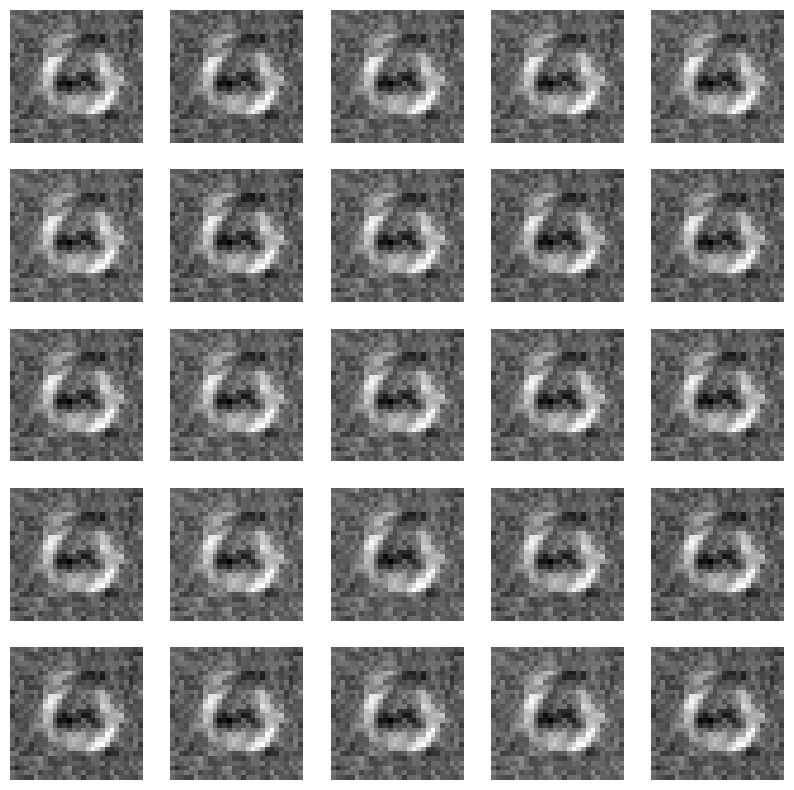

In [ ]:
import matplotlib.pyplot as plt

# Function to plot generated images
def plot_generated_images(generator, noise_dim, grid_size=5):
    num_images = grid_size * grid_size
    generator.eval()  # Set the generator to evaluation mode
    with torch.no_grad():
        noise = torch.randn(num_images, noise_dim).to(device)  # Generate random noise
        generated_images = generator(noise)  # Generate images from noise
        generated_images = generated_images.view(num_images, 1, 28, 28).cpu()  # Reshape and move to CPU

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    idx = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axes[i, j].imshow(generated_images[idx].squeeze(), cmap='gray')
            axes[i, j].axis('off')
            idx += 1
    plt.show()

# Example usage:
# Assuming `gen` is your generator and `noise_dim` is the dimension of the noise vector
plot_generated_images(gen, noise_dim=40, grid_size=5)


In [ ]:
import matplotlib.pyplot as plt

# Function to plot generated images
def plot_generated_images(generator, noise_dim, grid_size=5):
    num_images = grid_size * grid_size
    generator.eval()  # Set the generator to evaluation mode
    with torch.no_grad():
        noise = torch.randn(num_images, noise_dim).to(device)  # Generate random noise
        generated_images = generator(noise)  # Generate images from noise
        generated_images = generated_images.view(num_images, 1, 28, 28).cpu()  # Reshape and move to CPU

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    idx = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axes[i, j].imshow(generated_images[idx].squeeze(), cmap='gray')
            axes[i, j].axis('off')
            idx += 1
    plt.show()

# Example usage:
# Assuming `gen` is your generator and `noise_dim` is the dimension of the noise vector
plot_generated_images(gen, noise_dim=40, grid_size=5)
